In [1]:
from Networks import *

Function Description:
1. plotRandomCommunity(G, community, title = None)
2. get_community_dict(communities)
3. get_communities(community_dict)
4. run_louvain(G)
5. metrics(ground_truth, predicted)
6. plot_metrics_sparse(G, ground_truth, sparseFunctions, k_values)

Sampling Methods:
1. edge_betweenness_sparsification(G, k)
2. edge_random_sparsification(G, k)
3. edge_jaccard_sparsification(G, k)
4. edge_L_Spar_sparsification(G, r)



ORIGINAL GRAPH: G_DBLP, INDUCED SUBGRAPH: G_ind_DBLP, COMMUNITIES: communitiesDBLP
Number of nodes:  317080
Number of edges:  1049866
Number of communities:  150
Number of nodes in induced subgraph:  1420
Number of edges in induced subgraph:  4609

ORIGINAL GRAPH: G_Amz, INDUCED SUBGRAPH: G_ind_Amz, COMMUNITIES: communitiesAmazon
Number of nodes:  334863
Number of edges:  925872
Number of communities:  300
Number of nodes in induced subgraph:  2008
Number of edges in induced subgraph:  5960

ORIGINAL GRAPH: G_YT, INDUCED SUBGRAPH: G_ind_YT, COMMUNITIES: comm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# **DBLP**

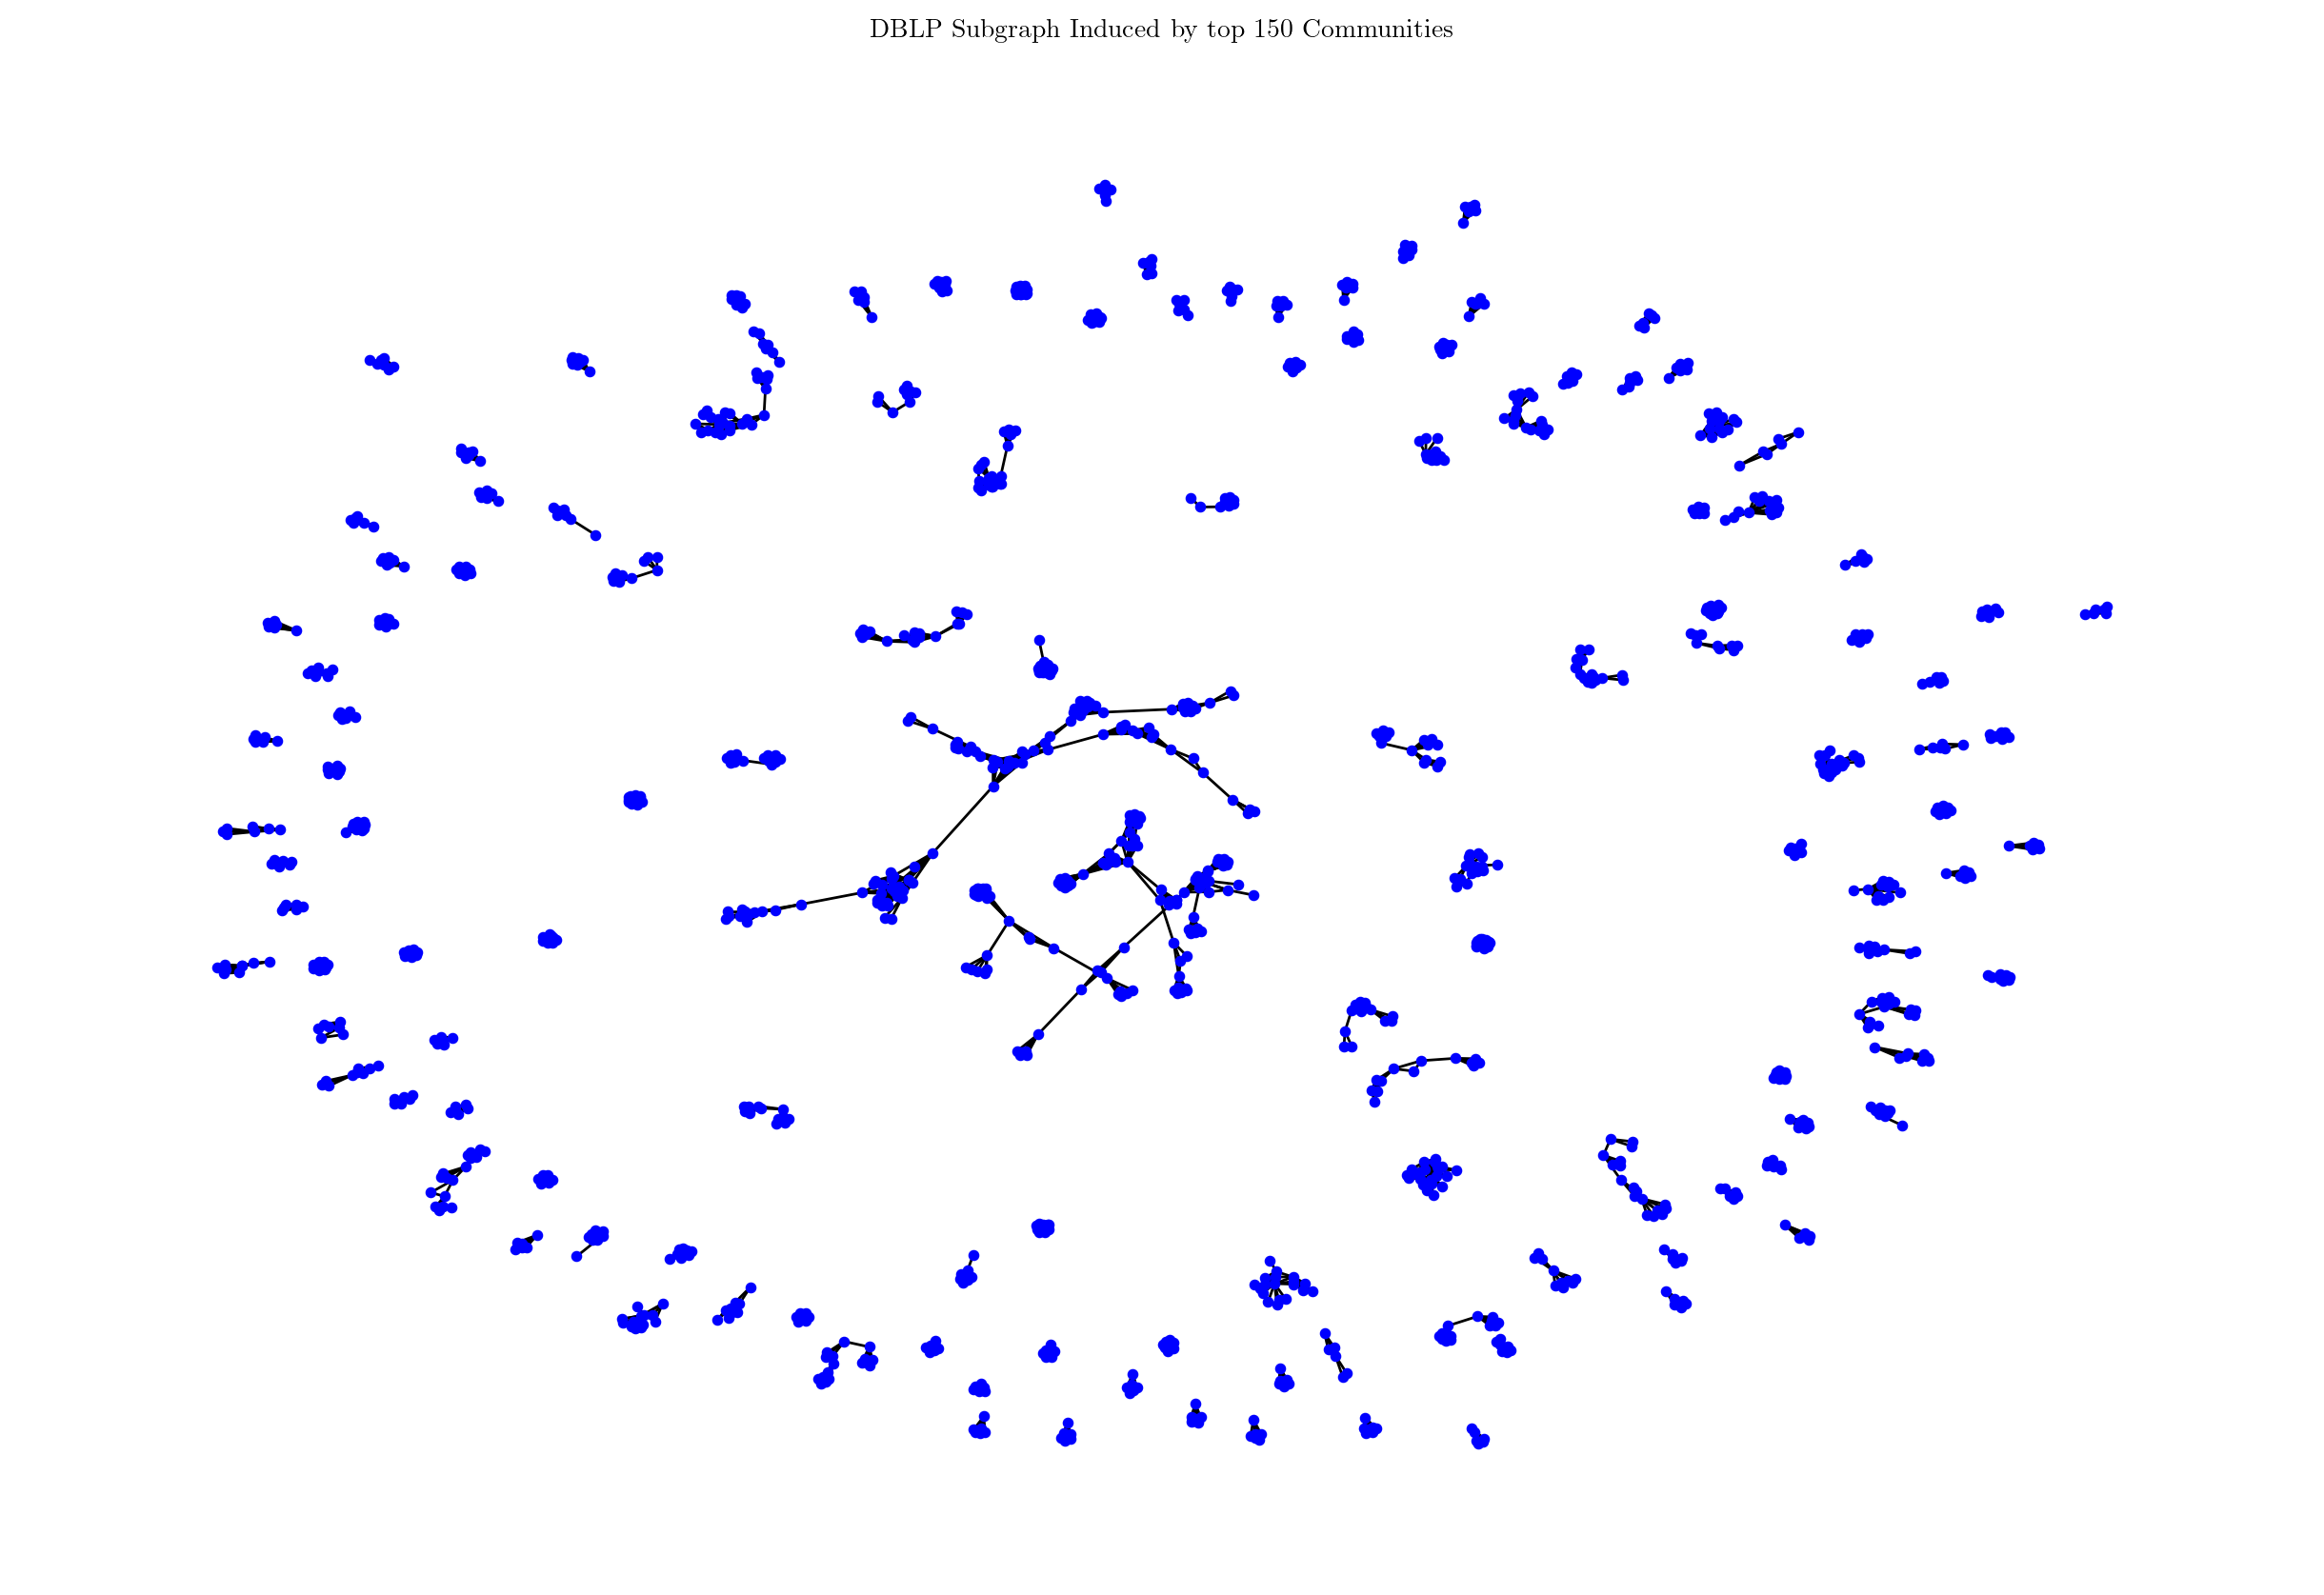

In [5]:
plt.figure(figsize = (12, 8))
nx.draw(G_ind_DBLP, with_labels = False, node_size = 10, node_color = "blue", edge_color = "black", pos = nx.spring_layout(G_ind_DBLP, scale = 4))
plt.title("DBLP Subgraph Induced by top 150 Communities")
plt.show()

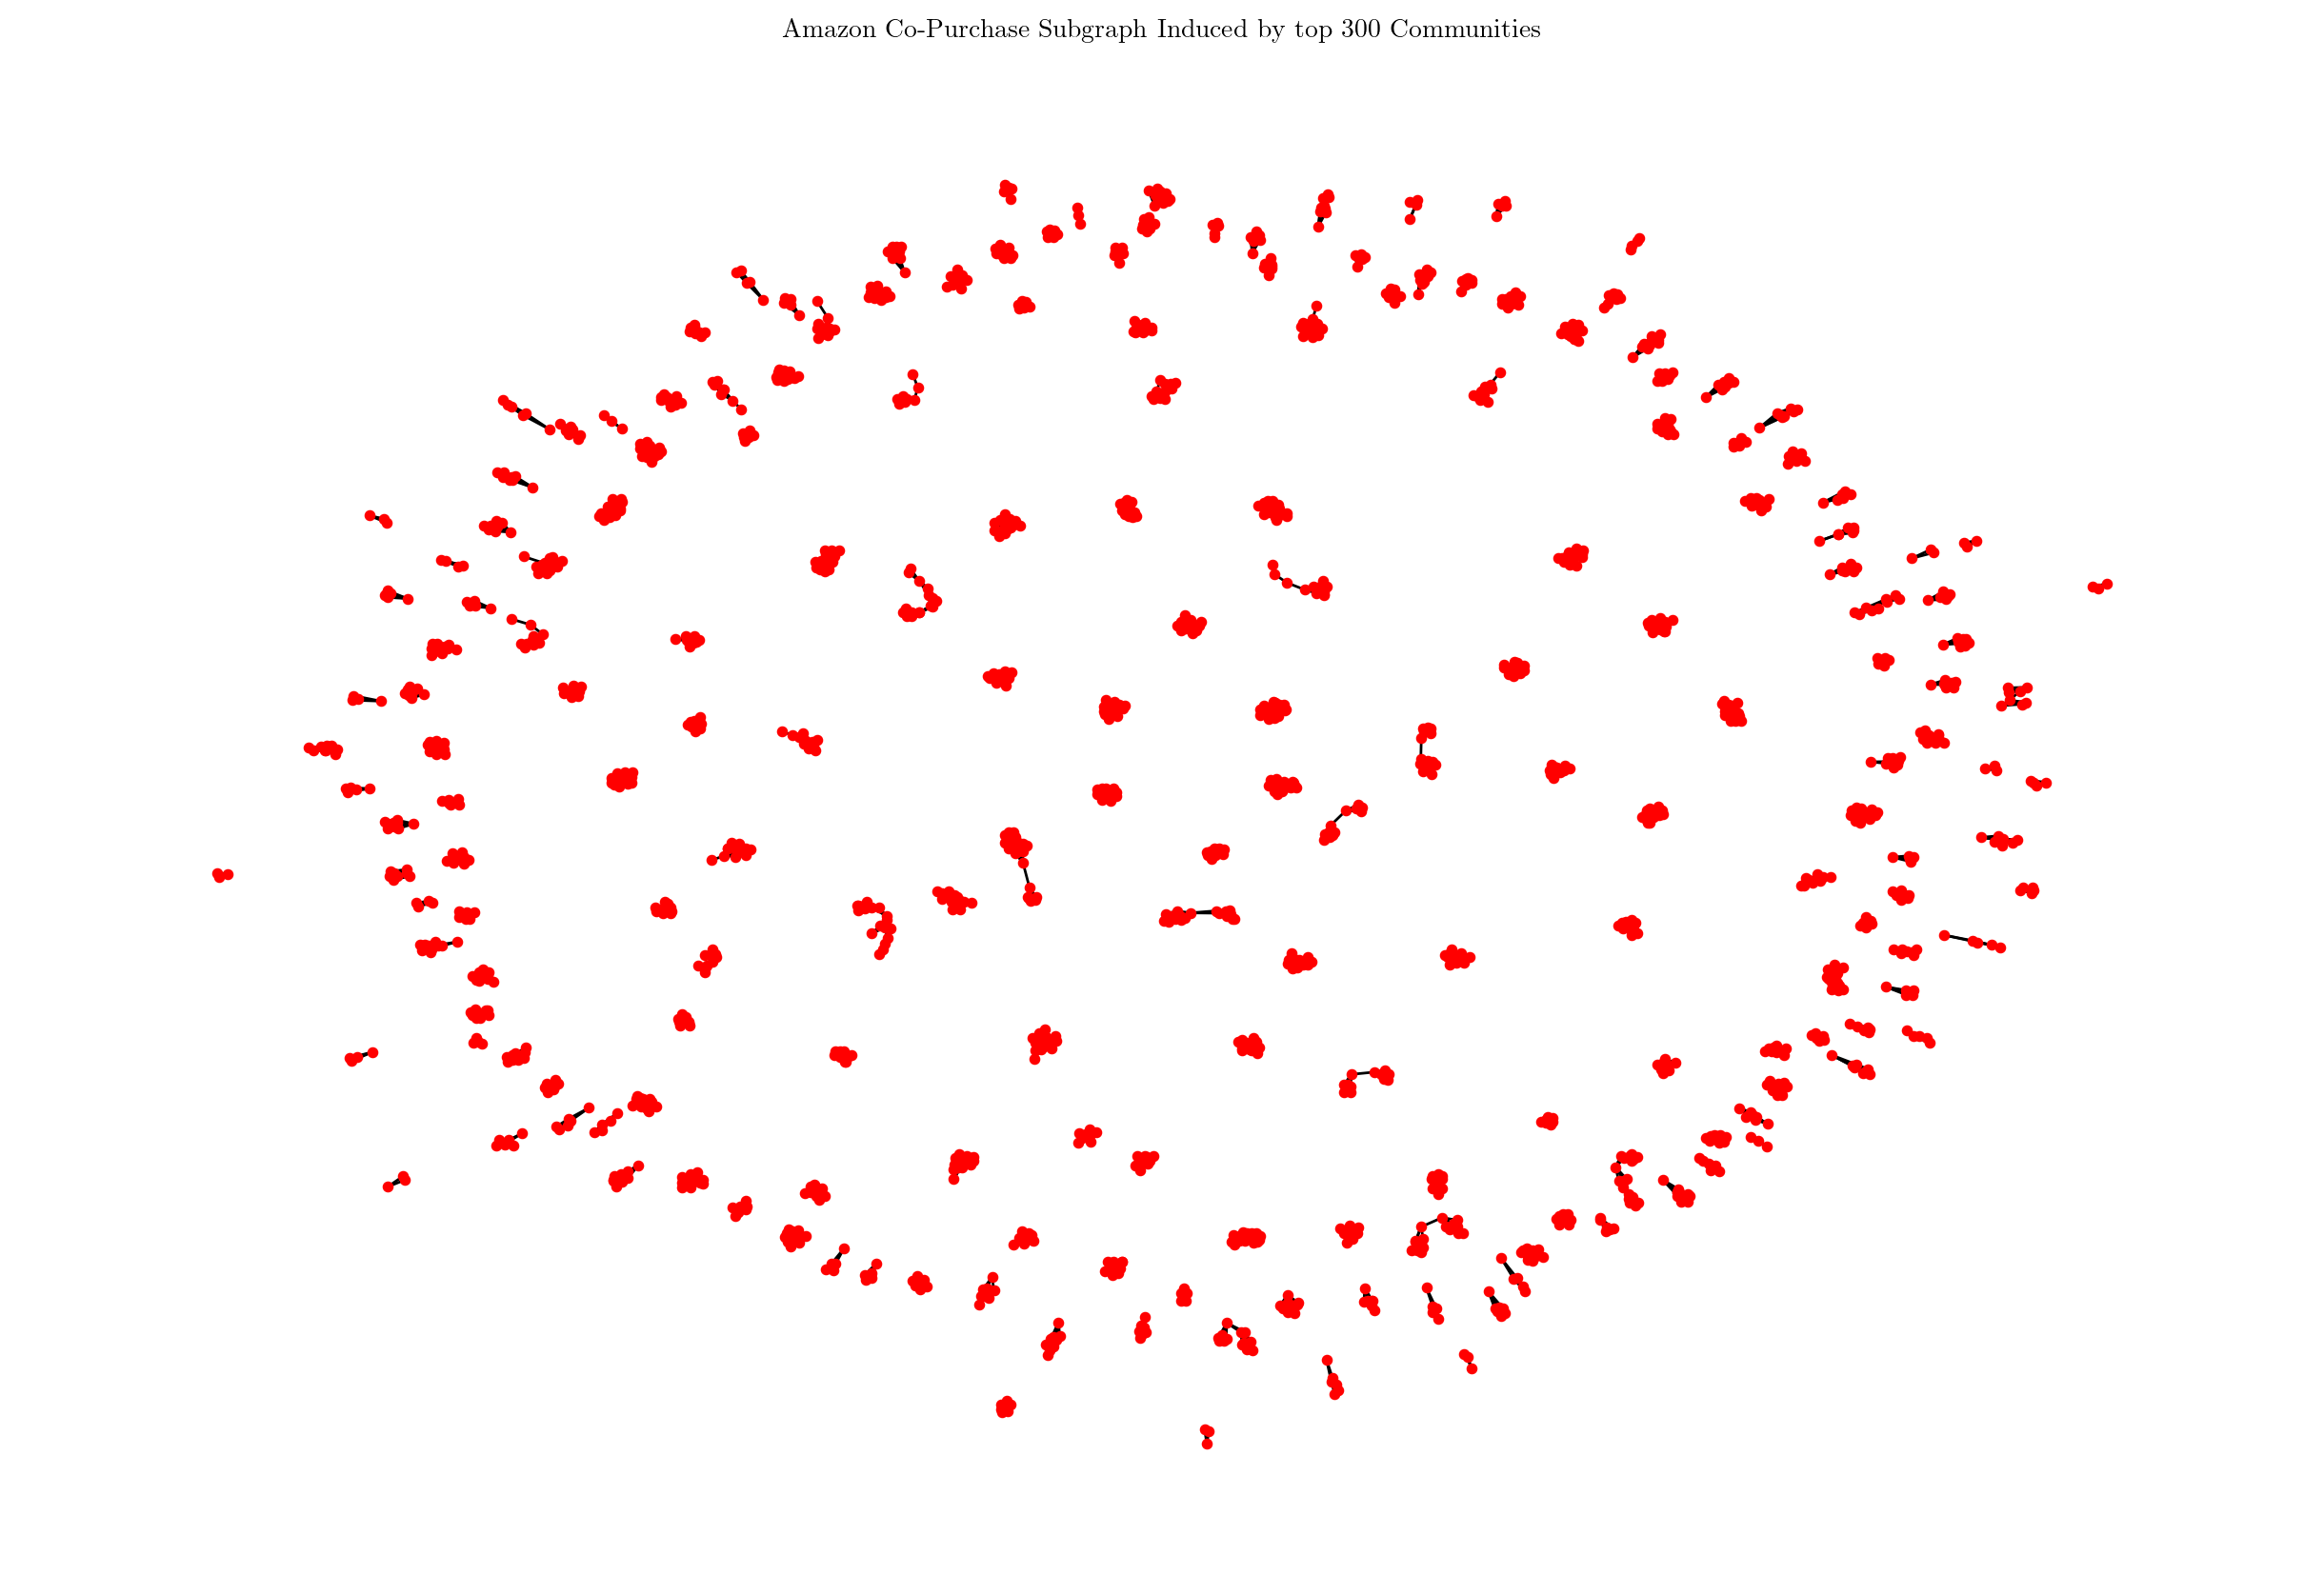

In [6]:
plt.figure(figsize = (12, 8))
nx.draw(G_ind_Amz, with_labels = False, node_size = 10, node_color = "red", edge_color = "black", pos = nx.spring_layout(G_ind_Amz, scale = 4))
plt.title("Amazon Co-Purchase Subgraph Induced by top 300 Communities")
plt.show()

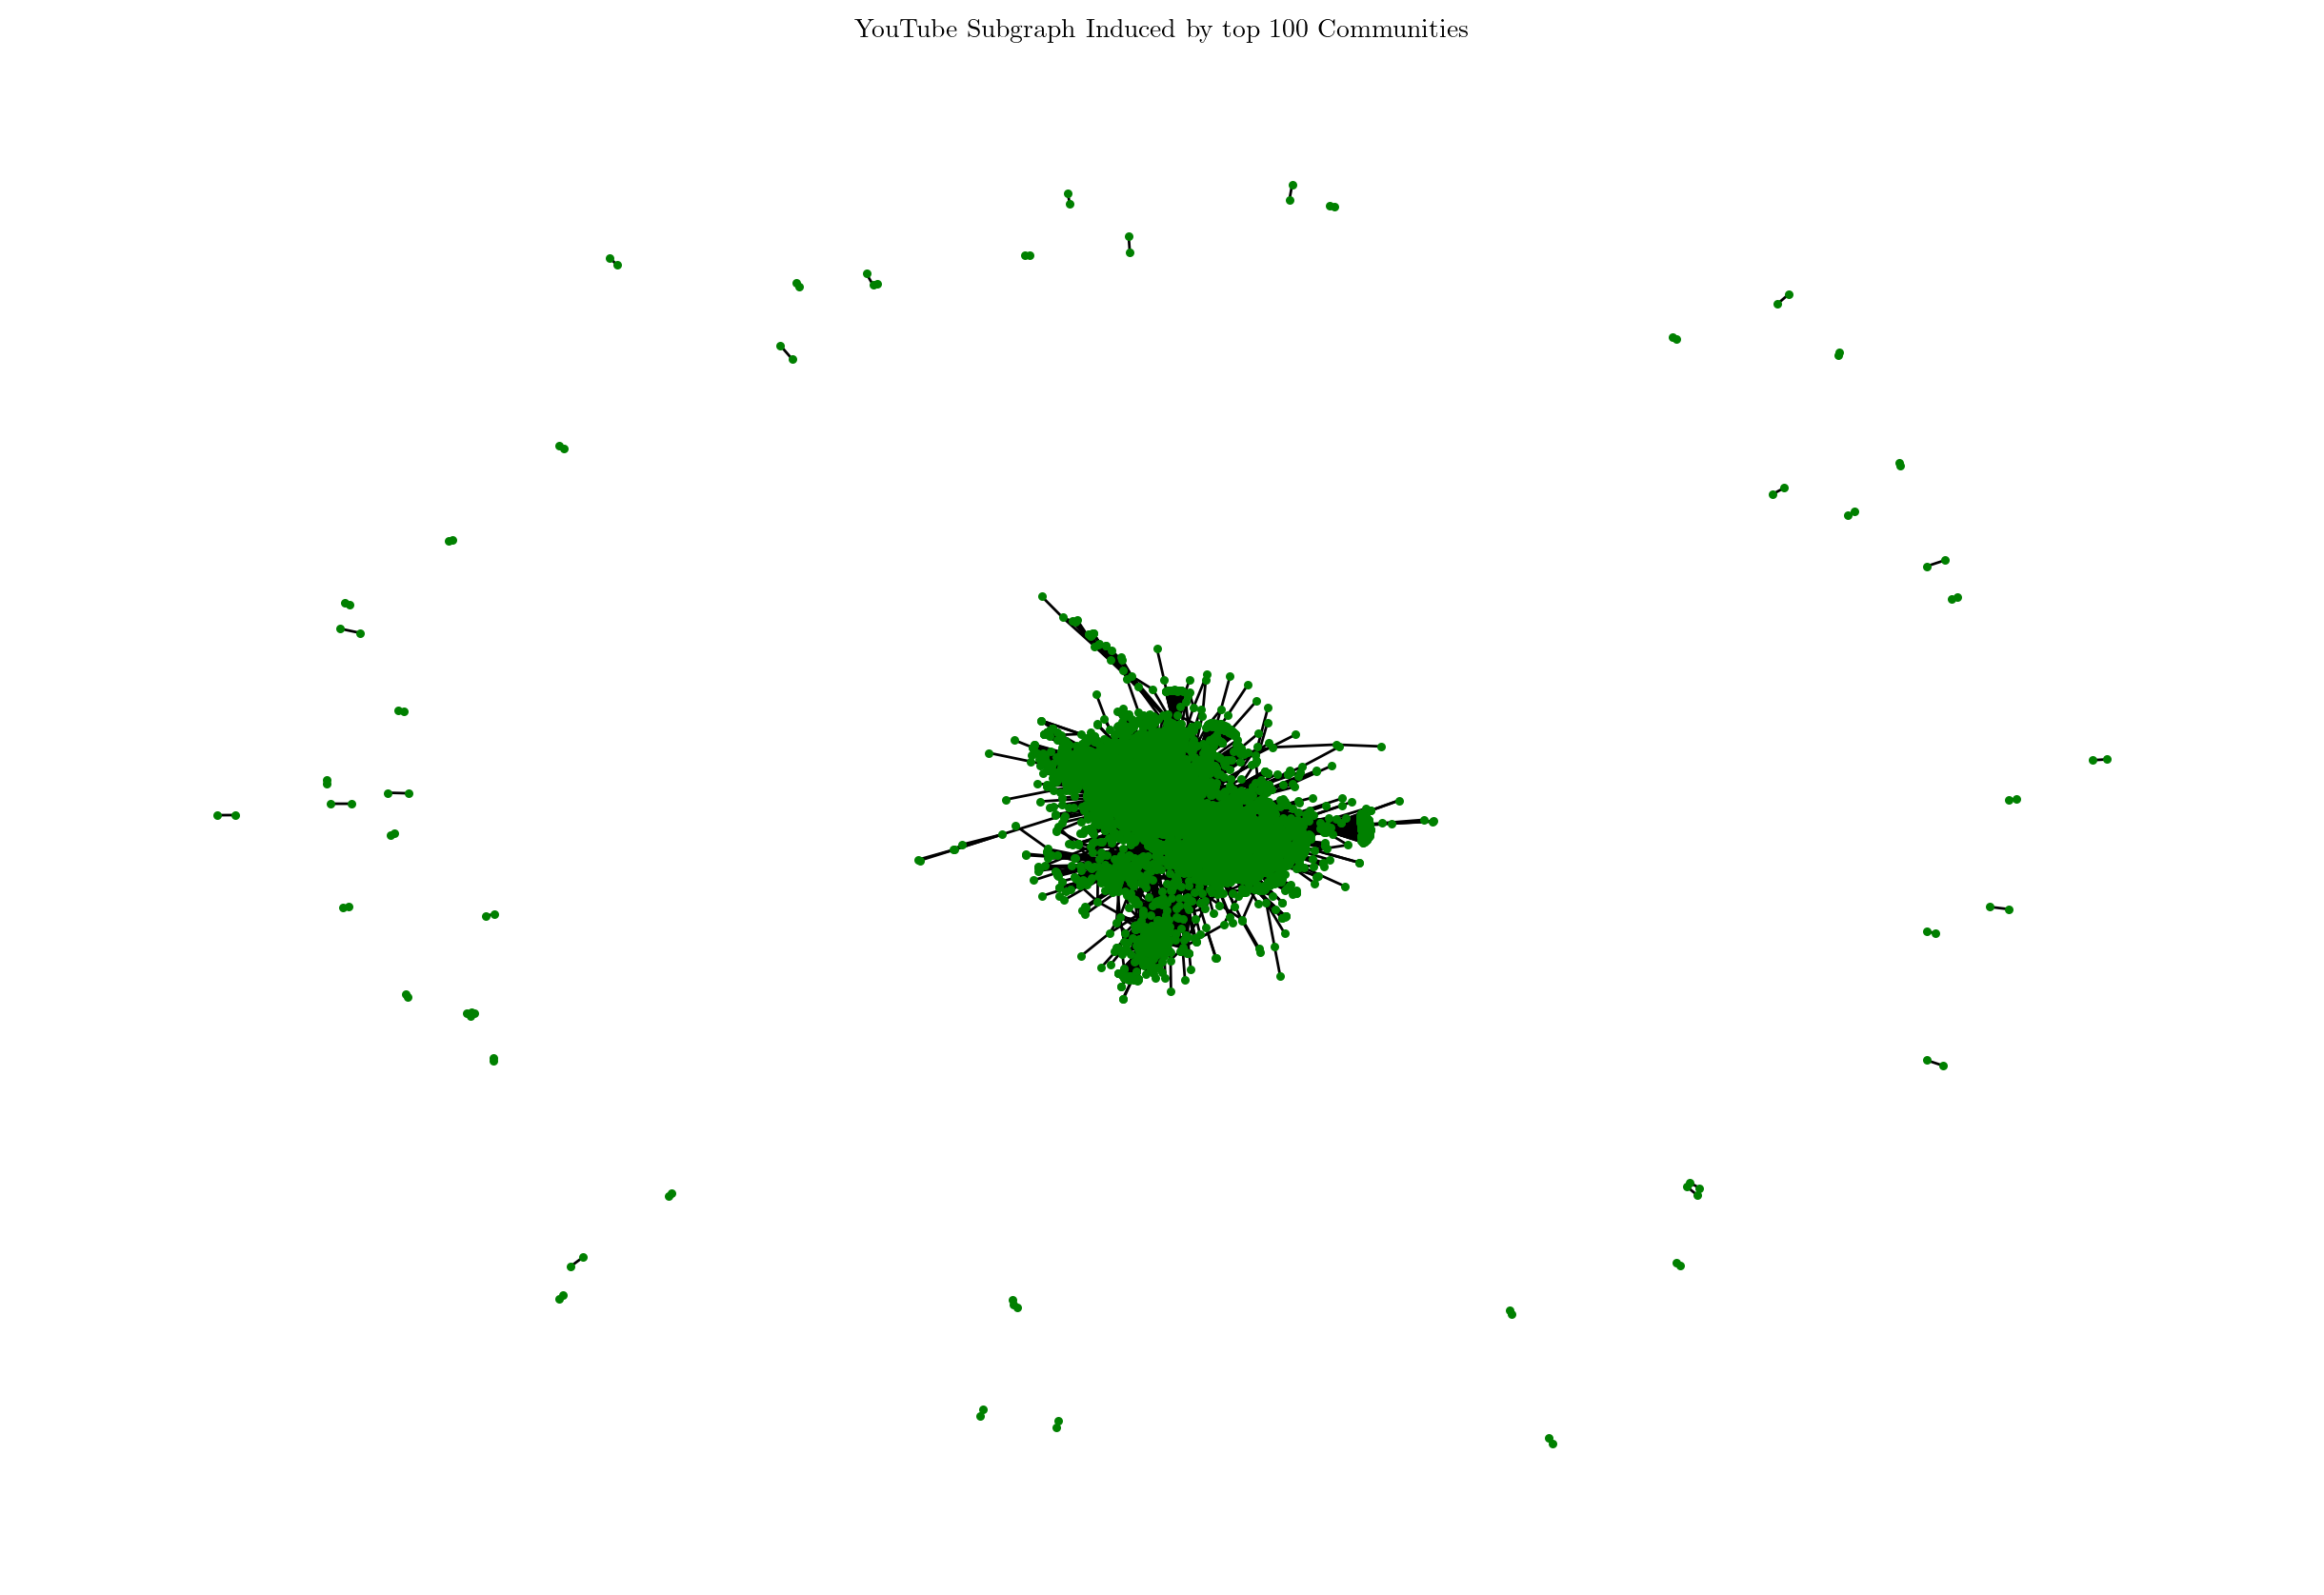

In [7]:
plt.figure(figsize = (12, 8))
nx.draw(G_ind_YT, with_labels = False, node_size = 5, node_color = "green", edge_color = "black", pos = nx.spring_layout(G_ind_YT, scale = 4))
plt.title("YouTube Subgraph Induced by top 100 Communities")
plt.show()

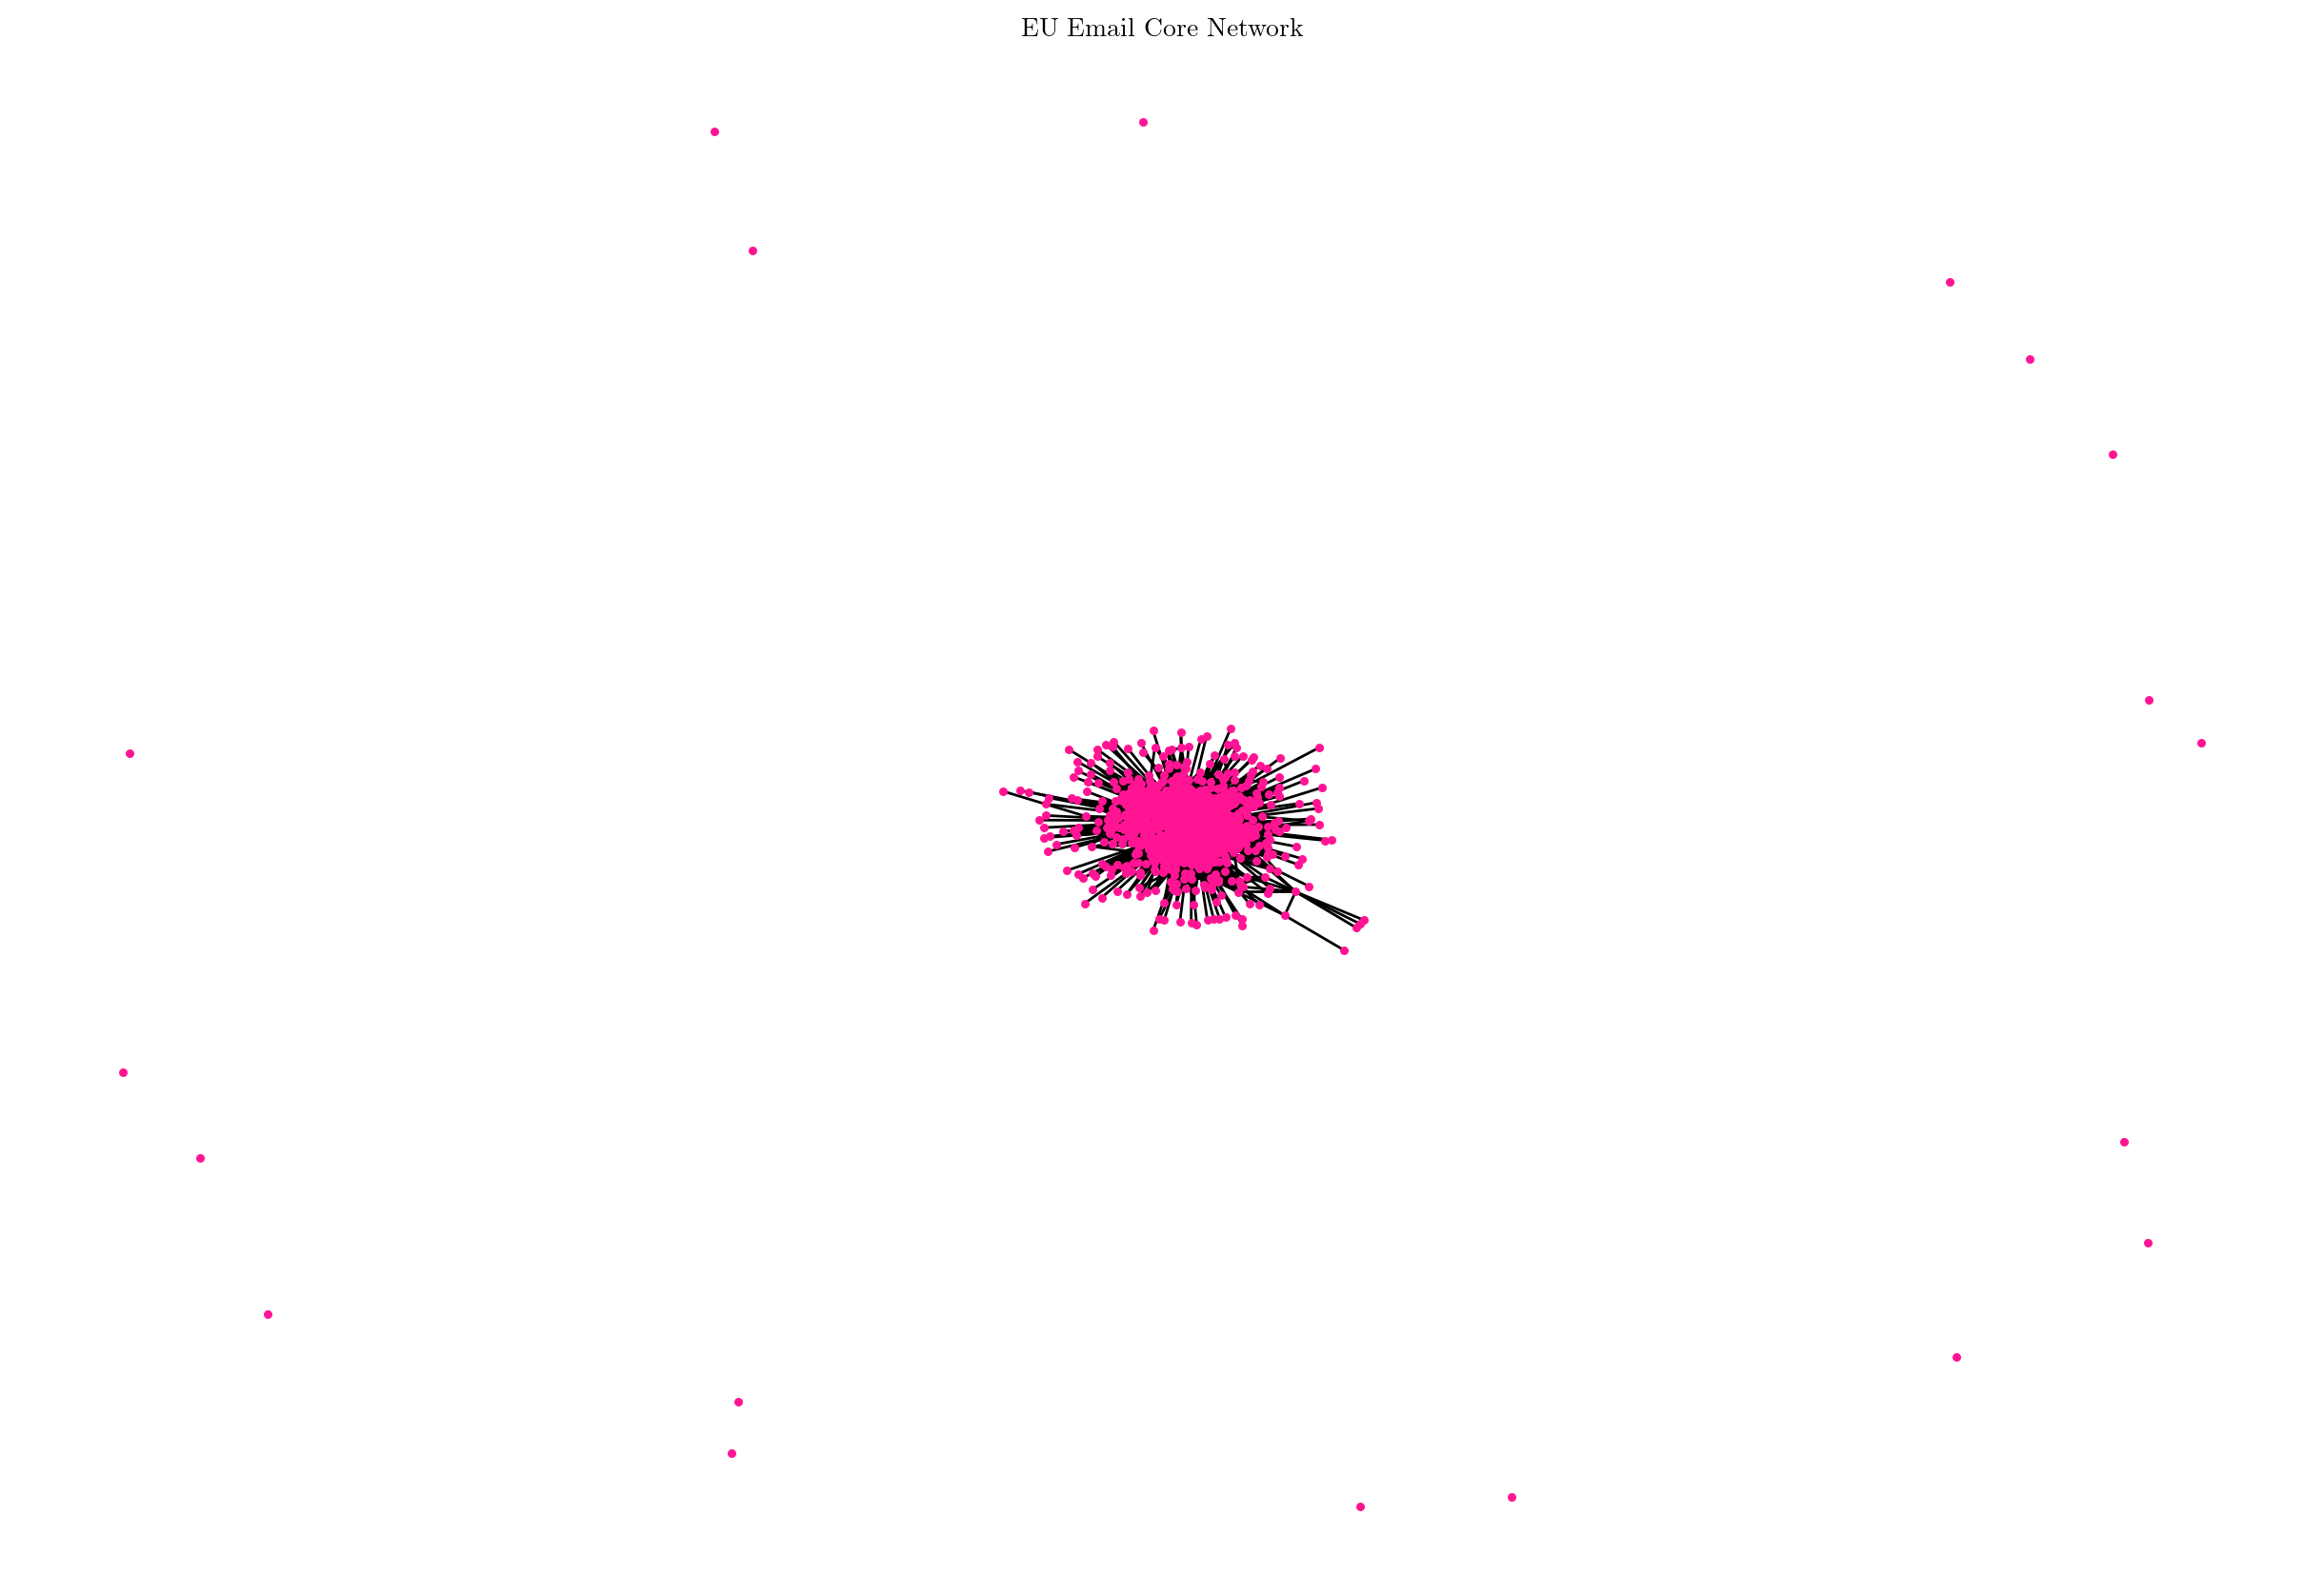

In [8]:
plt.figure(figsize = (12, 8))
nx.draw(G_eu, with_labels = False, node_size = 5, node_color = "deeppink", edge_color = "black", pos = nx.spring_layout(G_eu, scale = 4))
plt.title("EU Email Core Network")
plt.show()

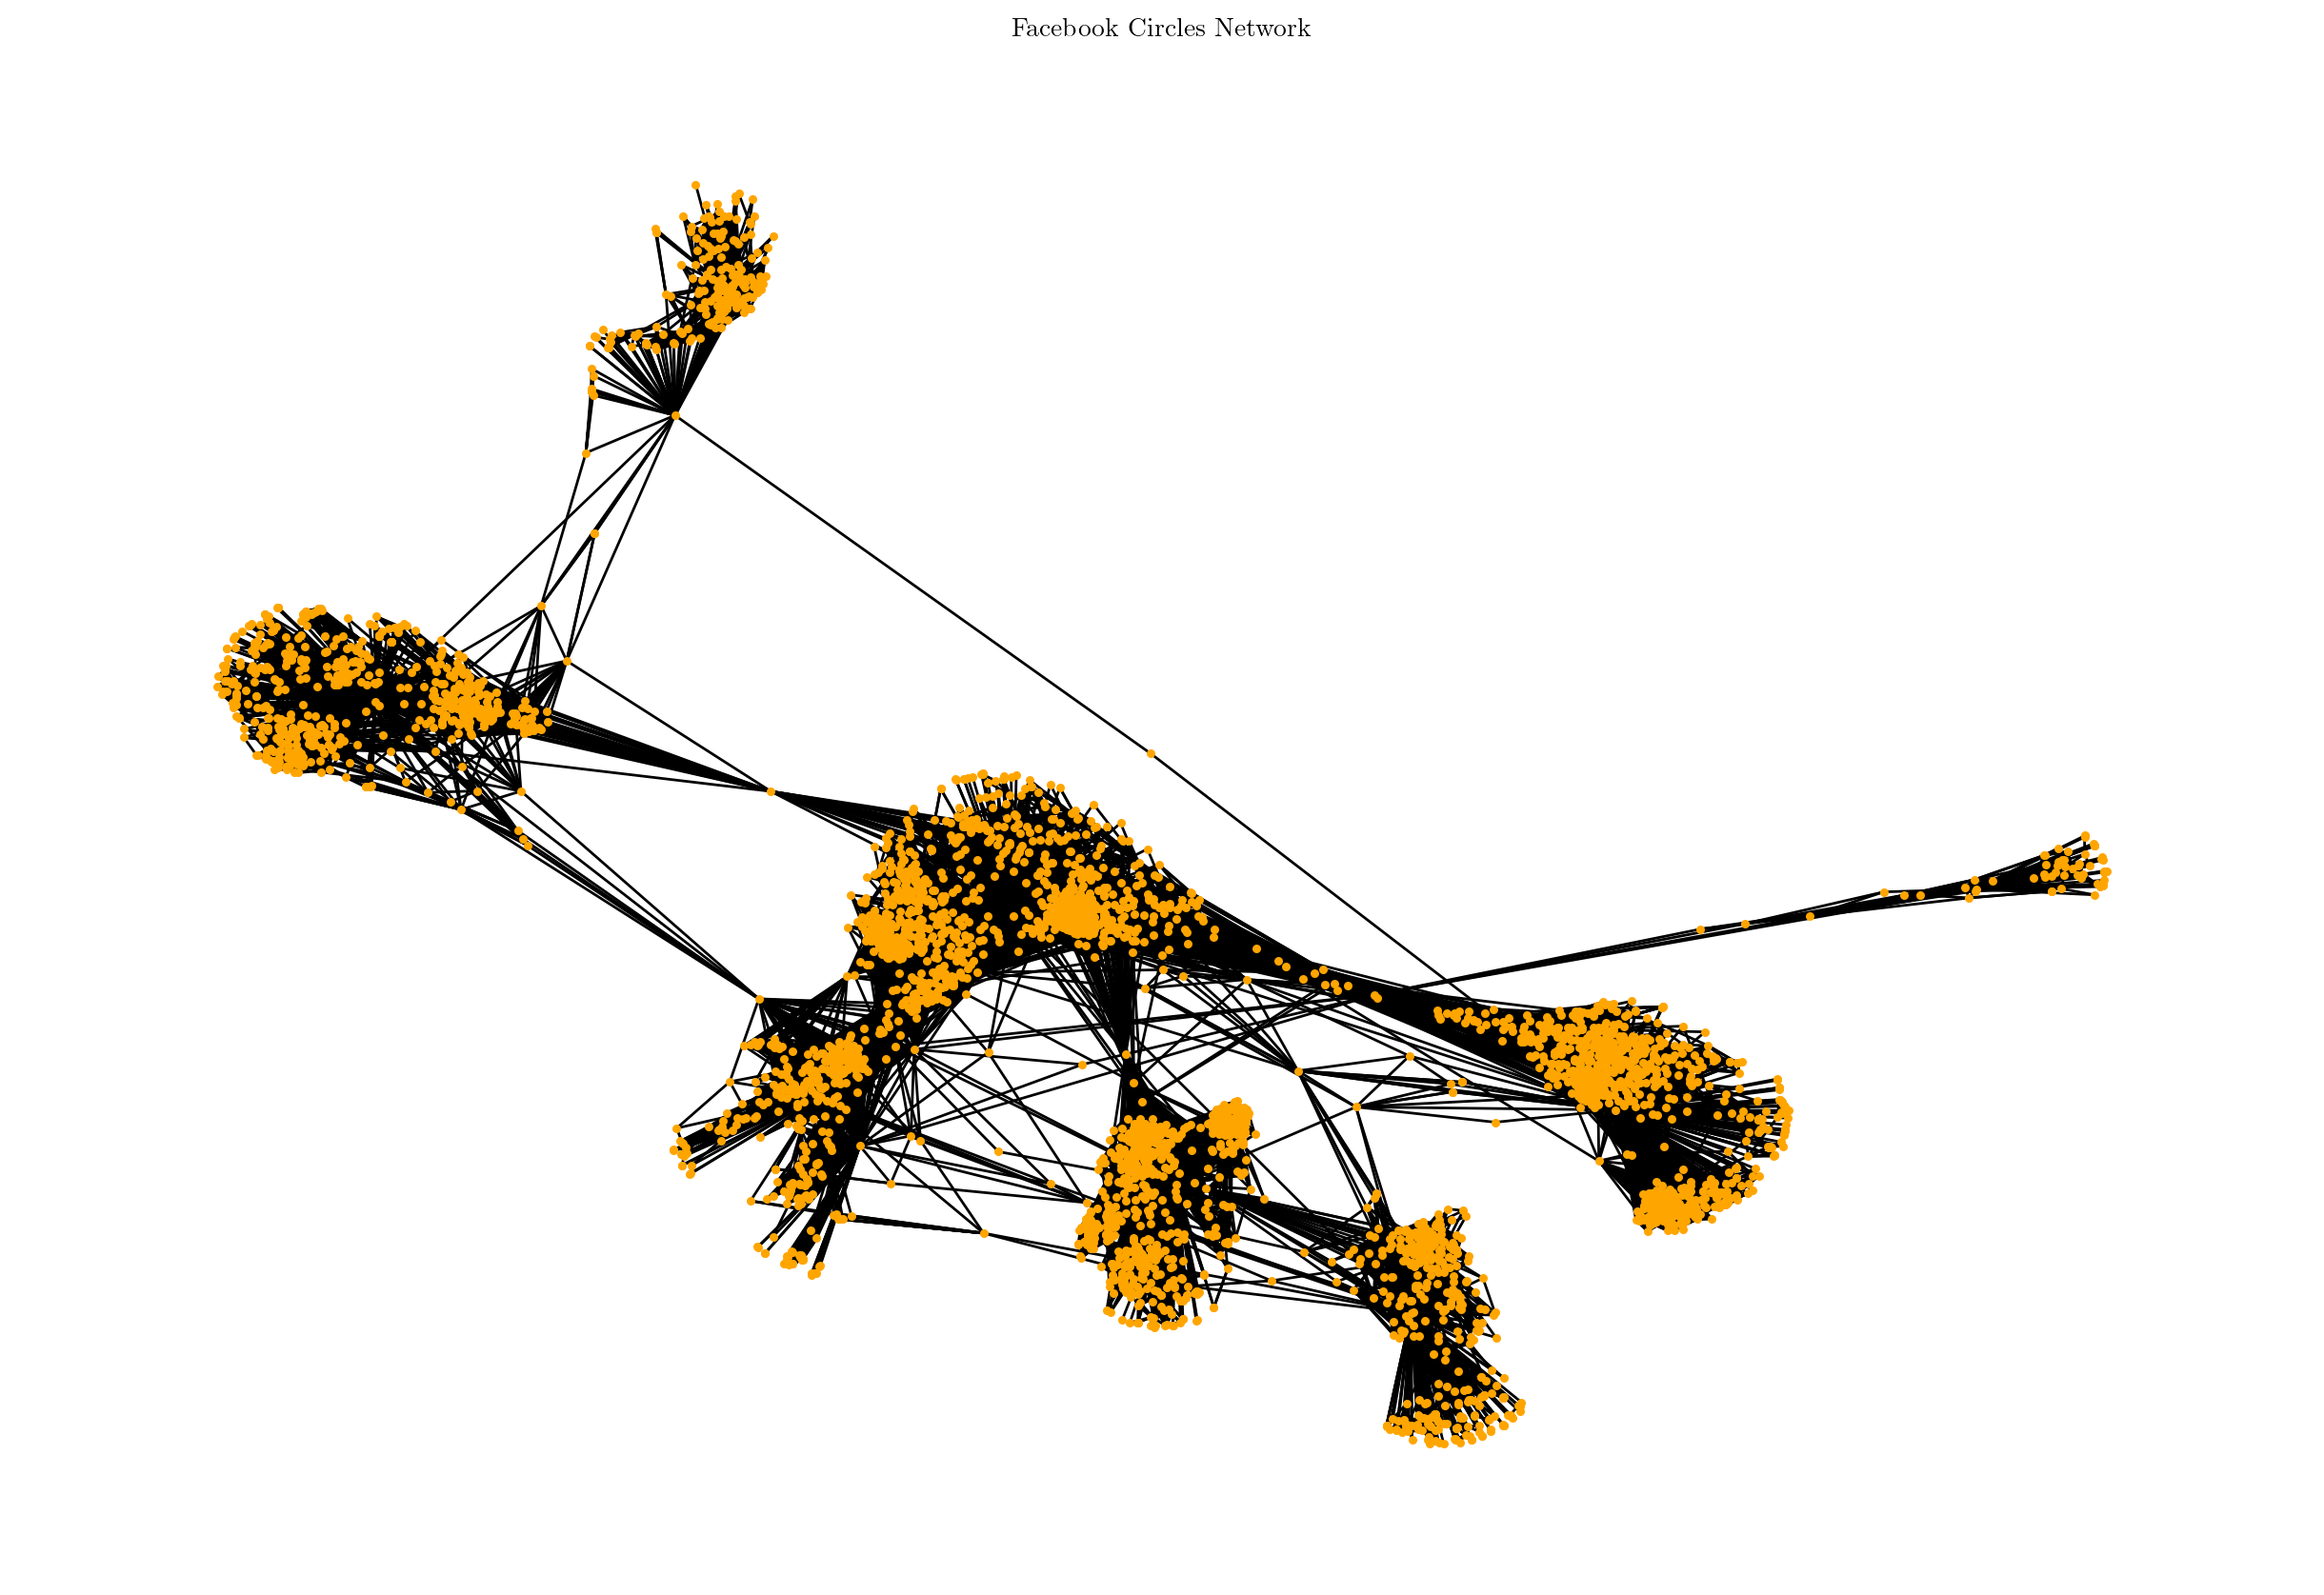

In [9]:
plt.figure(figsize = (12, 8))
nx.draw(G_FB, with_labels = False, node_size = 5, node_color = "orange", edge_color = "black", pos = nx.spring_layout(G_FB, scale = 4))
plt.title("Facebook Circles Network")
plt.show()

In [5]:
def edge_betweenness_sparsification(G, k):
    edge_betweenness = nx.edge_betweenness_centrality(G)
    edges_to_remove = sorted(edge_betweenness, key = edge_betweenness.get)[:int((1 - k) * G.number_of_edges())]
    H = G.copy()
    for edge in edges_to_remove:
        H.remove_edge(*edge)
    return H

In [4]:
def edge_random_sparsification(G, k):
    edges = list(G.edges())
    np.random.shuffle(edges)
    H = G.copy()
    for i in range(int((1 - k) * G.number_of_edges())):
        H.remove_edge(*edges[i])
    return H

In [3]:
k_values = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]
sparseFunctions = [("Edge Betweenness", edge_betweenness_sparsification), ("Random", edge_random_sparsification)]

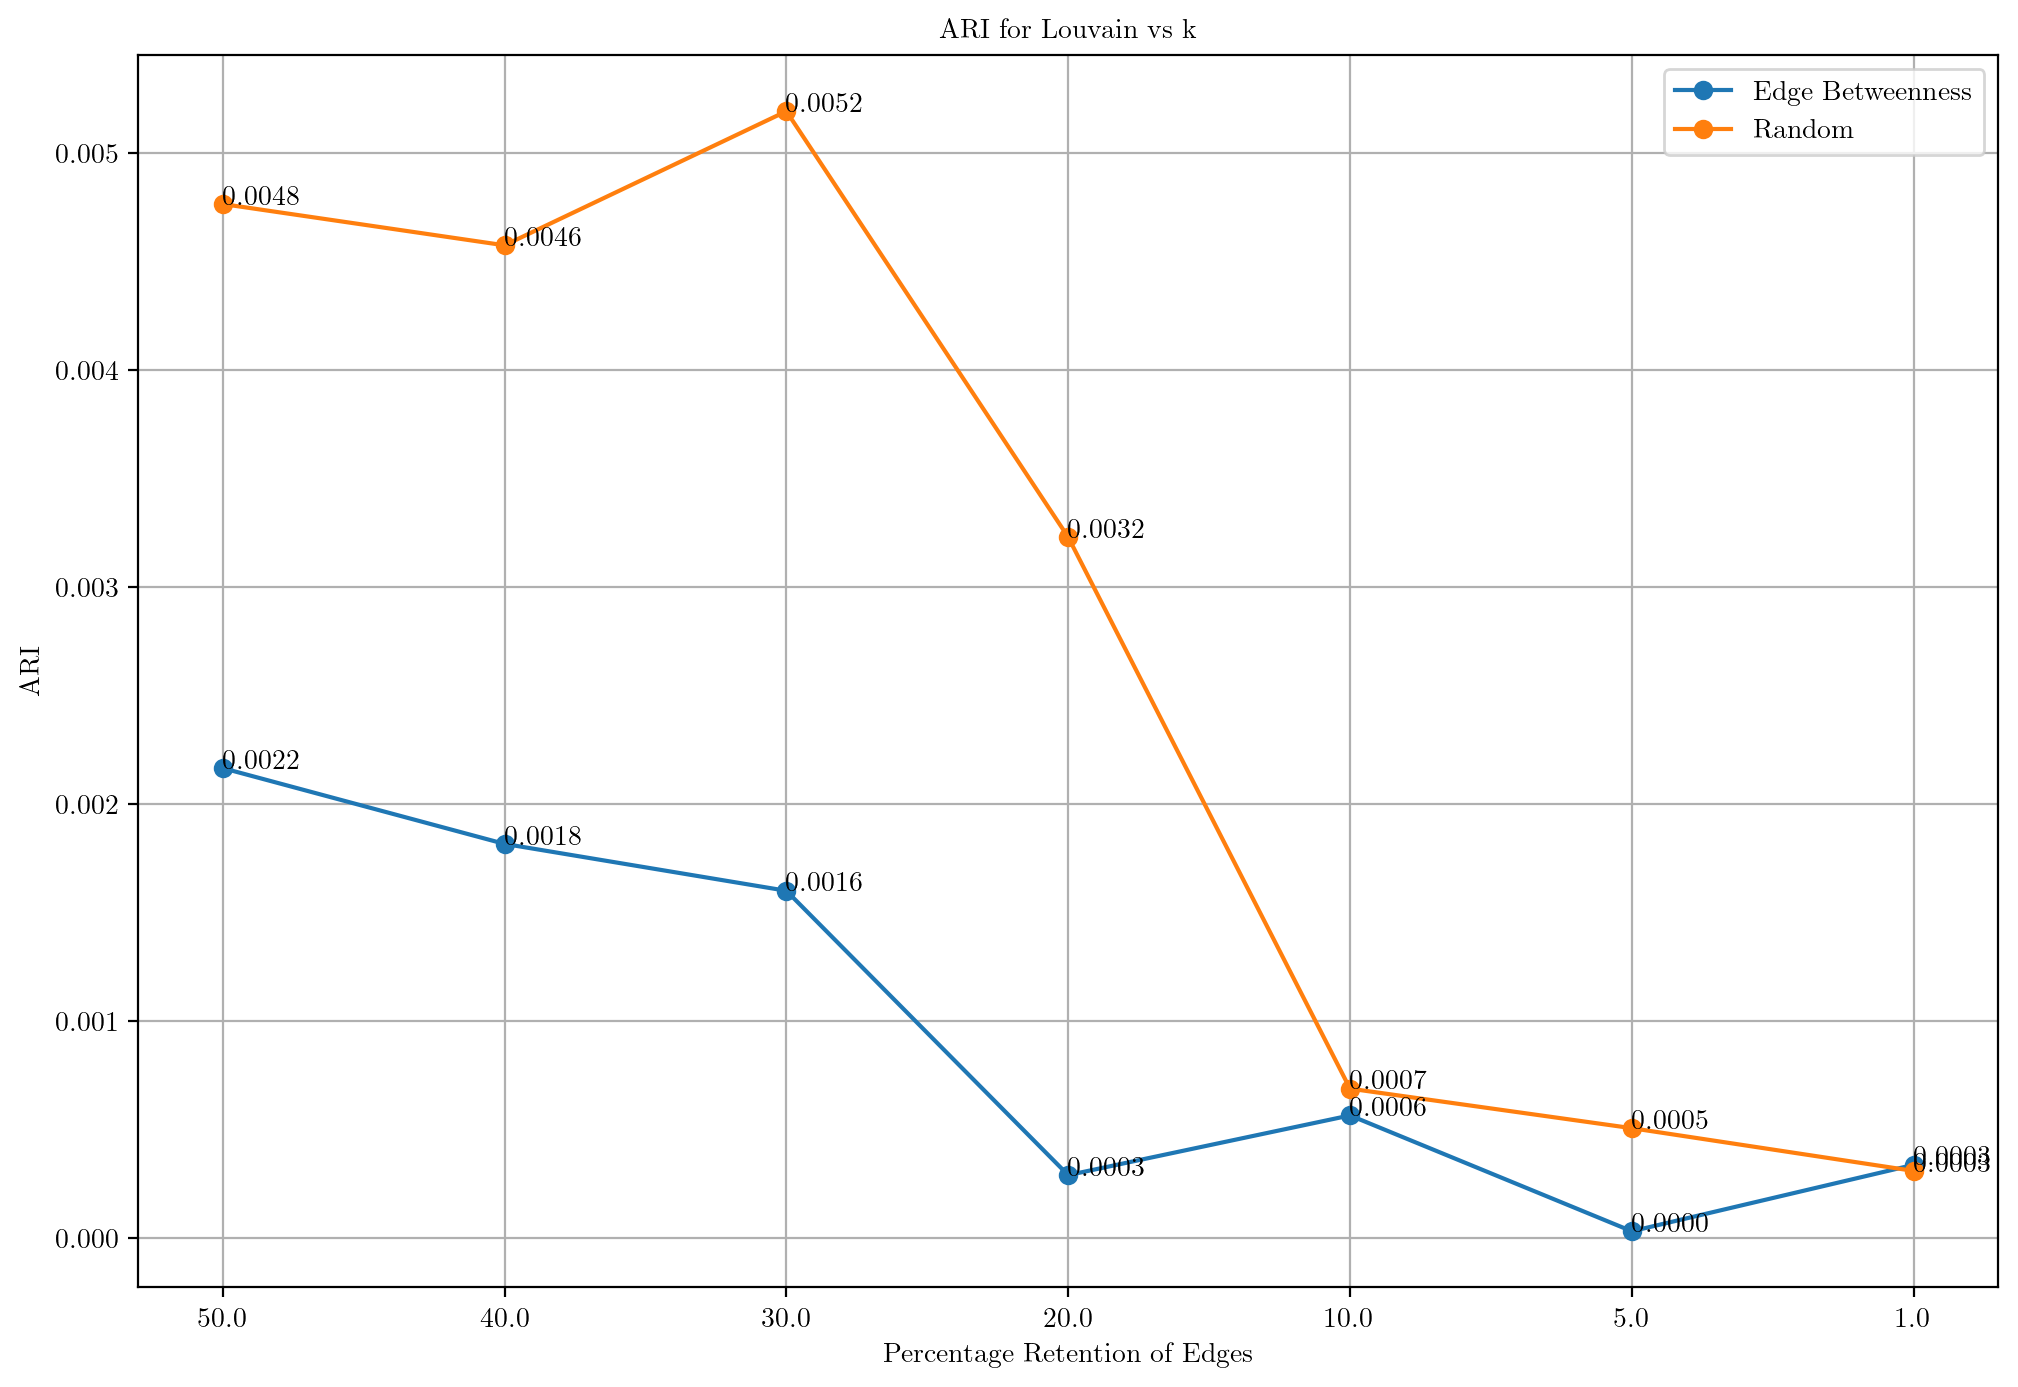

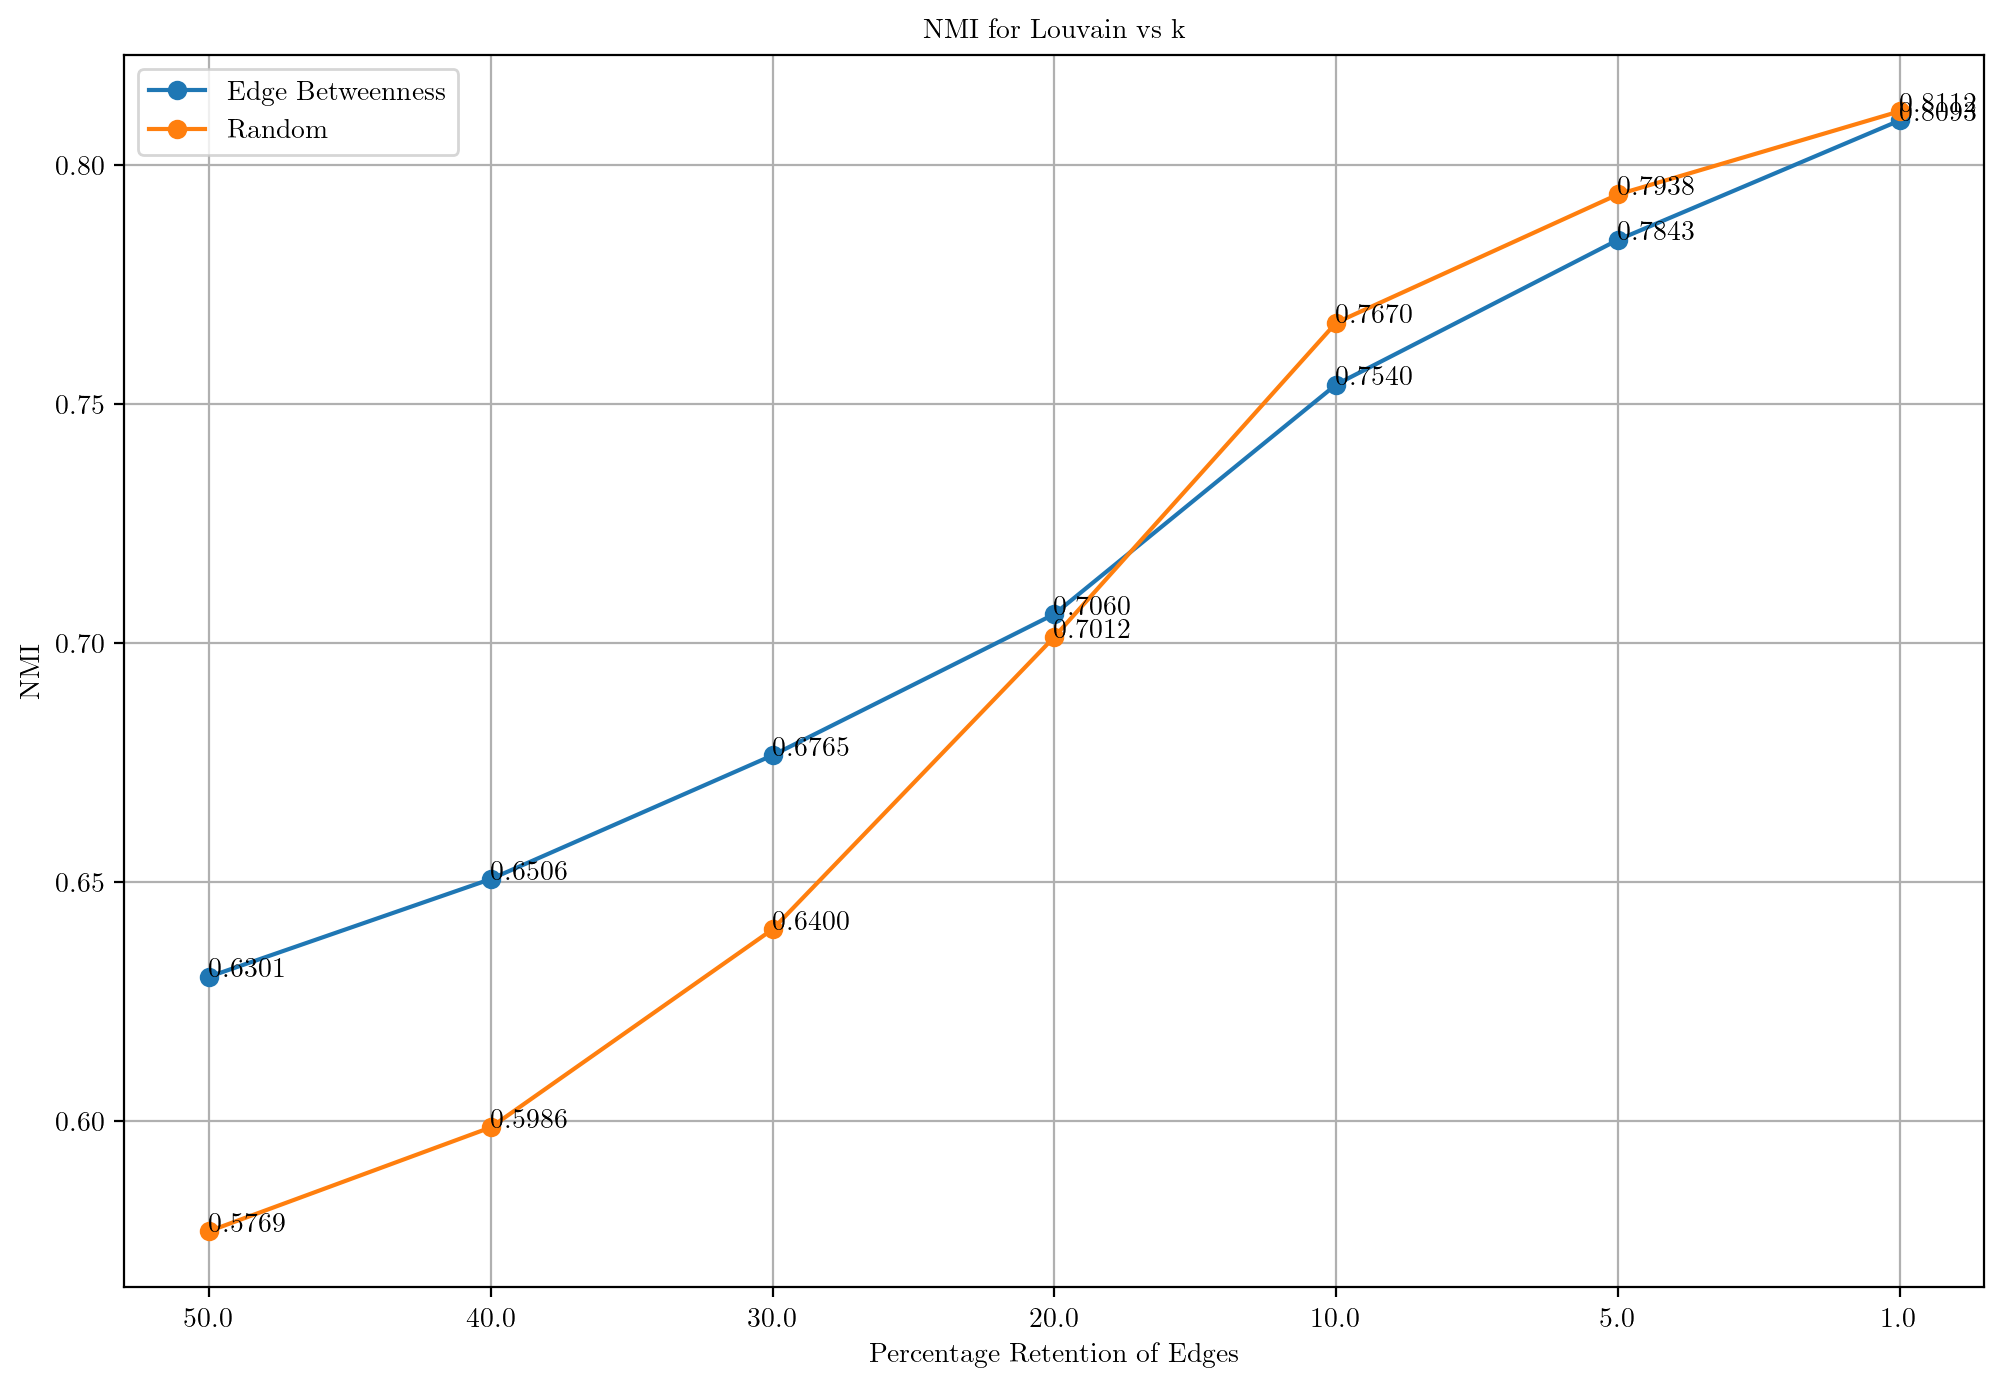

In [13]:
sparseAmzGraphs = plot_metrics_sparse(G_ind_Amz, get_community_dict(list(communitiesAmazon.values())), sparseFunctions, k_values)

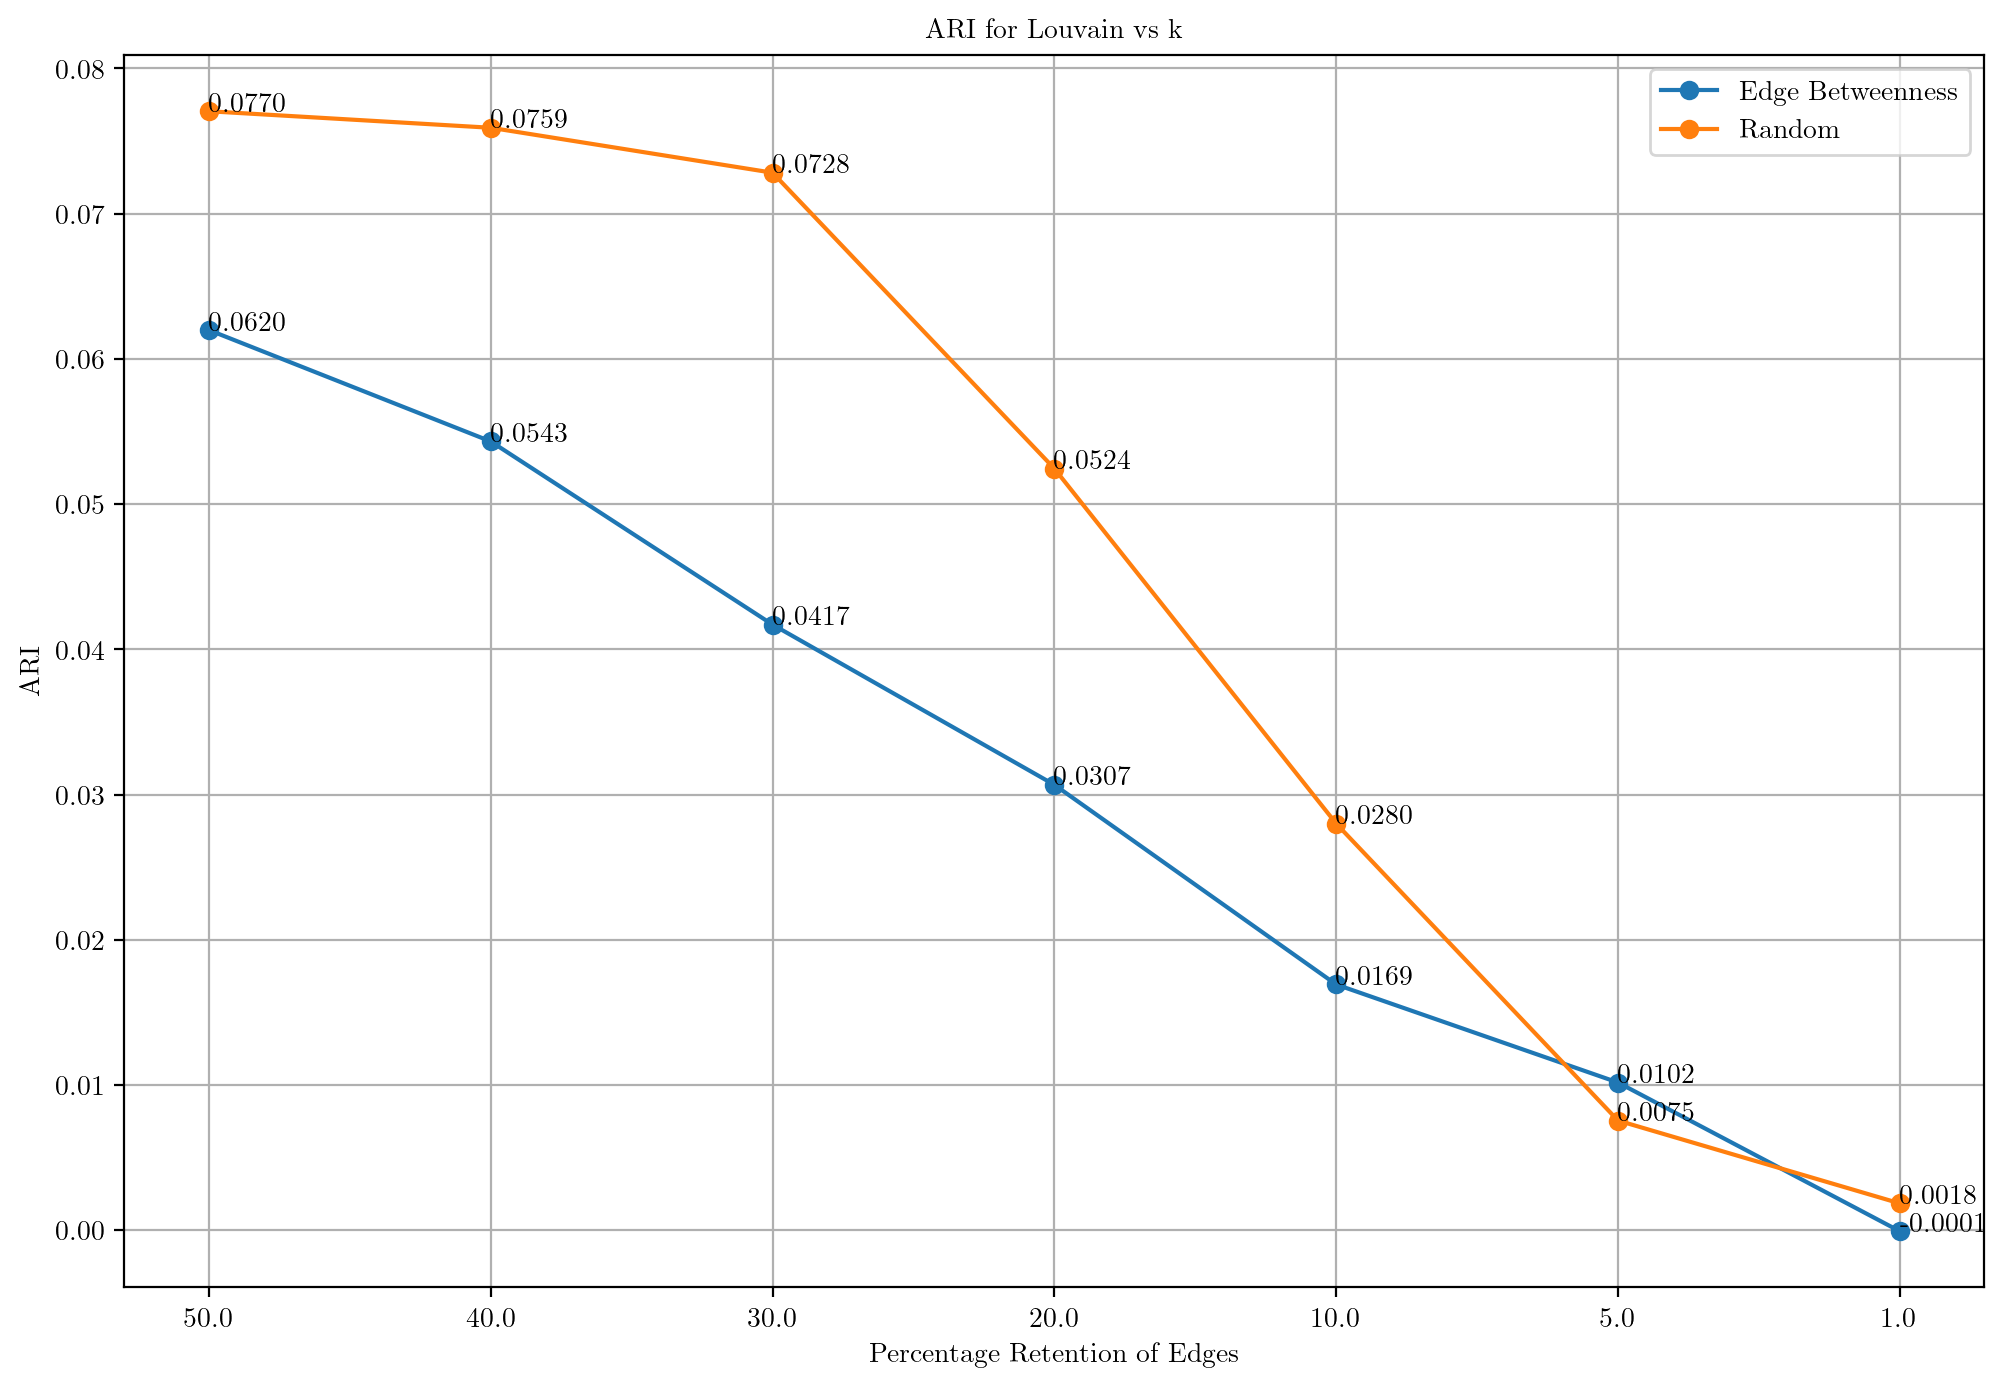

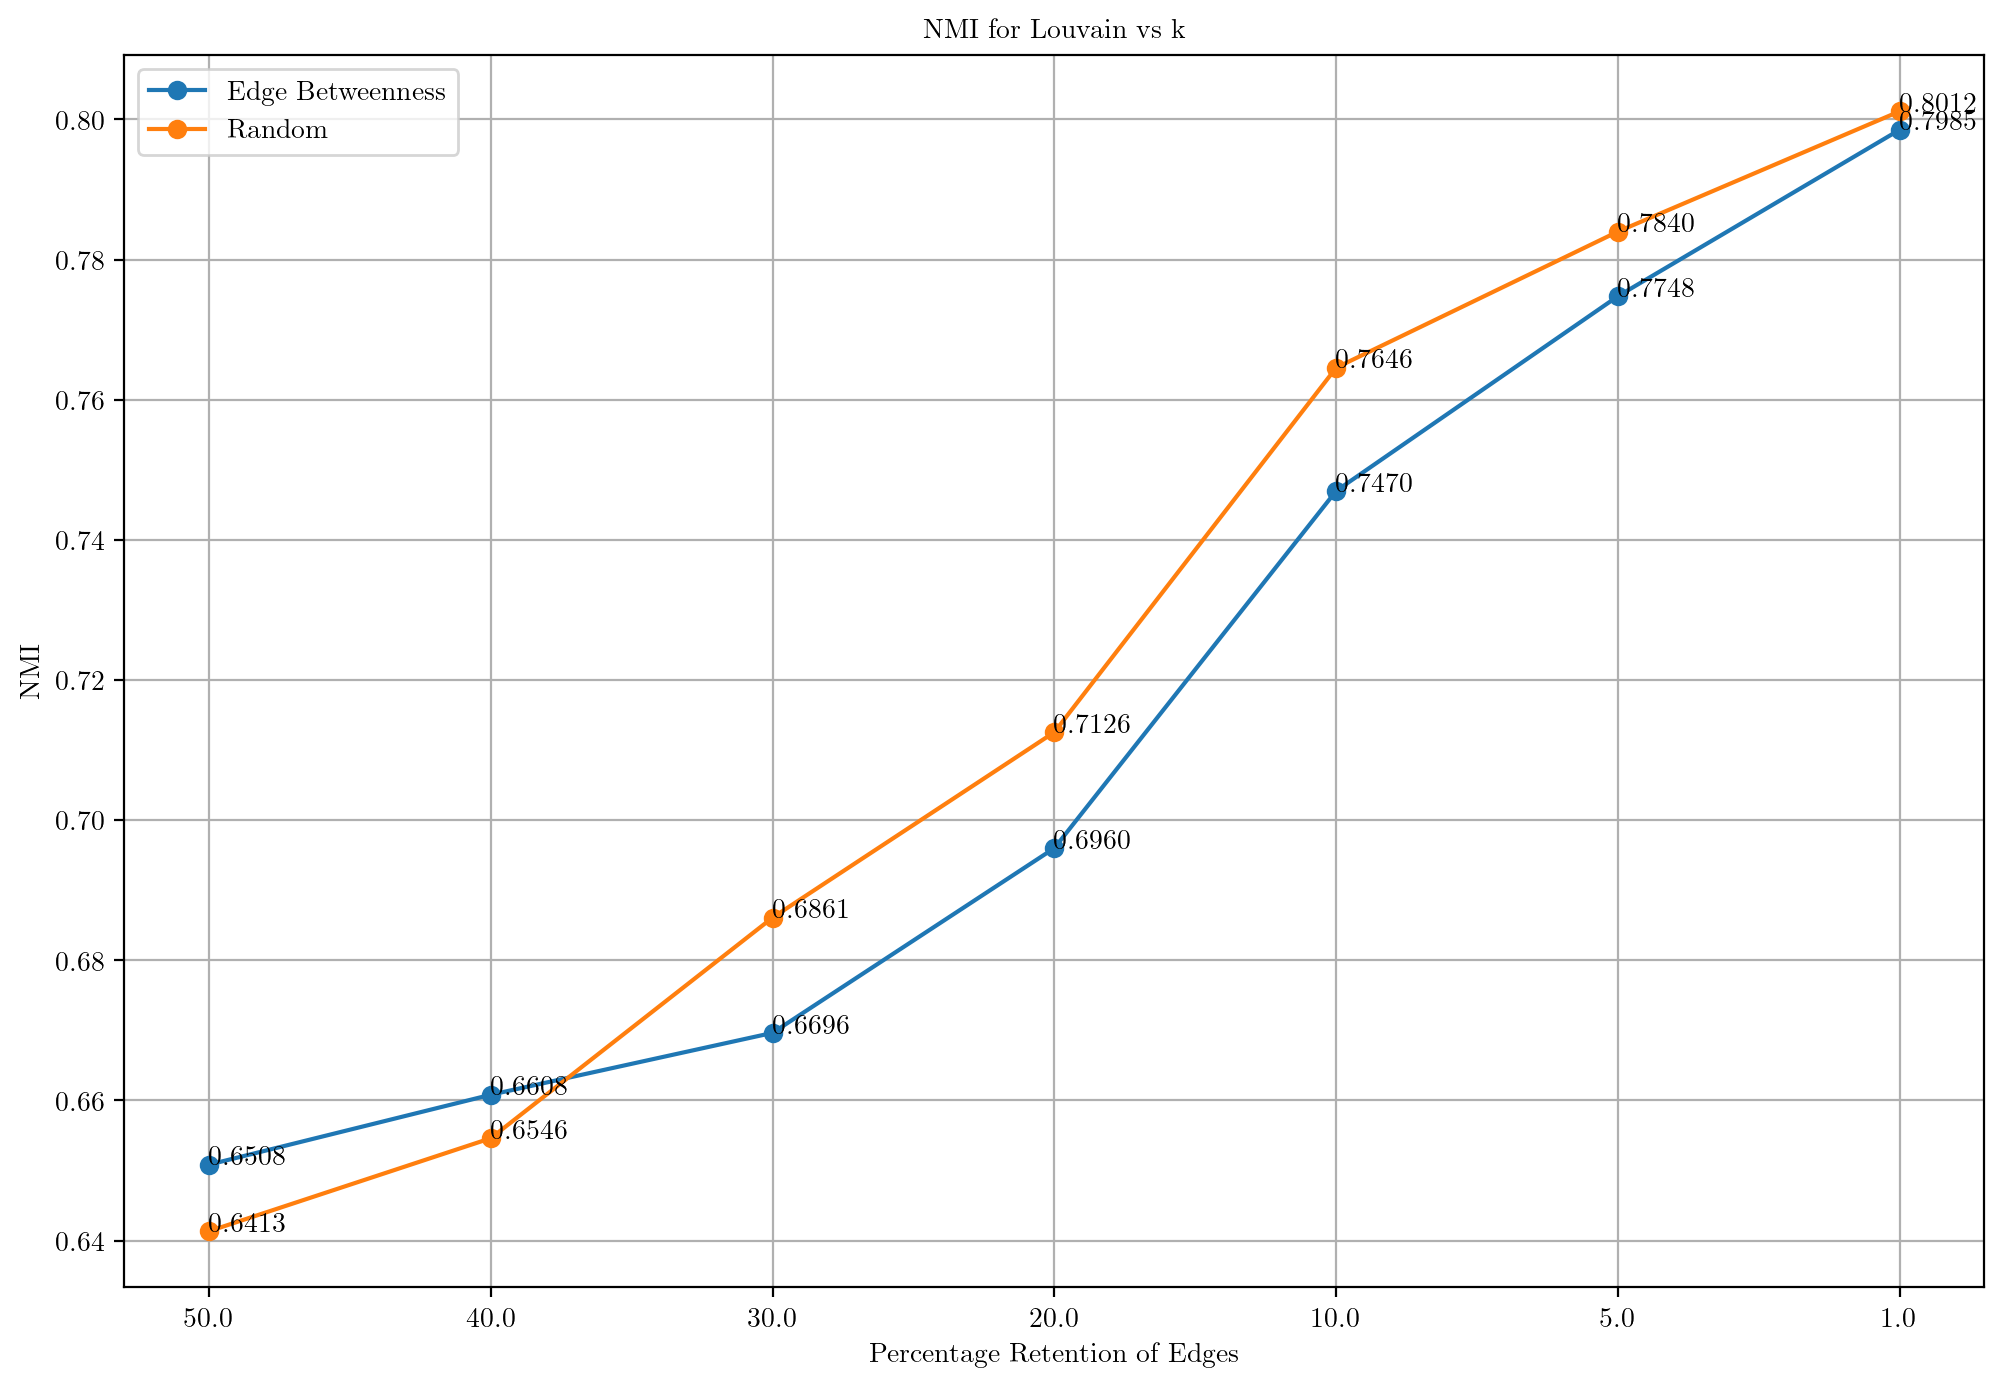

In [14]:
sparseDBLPGraphs = plot_metrics_sparse(G_ind_DBLP, get_community_dict(list(communitiesDBLP.values())), sparseFunctions, k_values)

In [4]:
from cdlib import algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool'}


In [15]:
def edge_jaccard_sparsification(G, k):
    edge_jaccard = nx.jaccard_coefficient(G)
    edges = list(edge_jaccard)
    edges = sorted(edges, key = lambda x: x[2], reverse = True)
    G_sparse = set()
    H = nx.Graph()
    for edge in edges[:int(k * G.number_of_edges())]:
        G_sparse.add(edge[:2])
    
    for node in G.nodes():
        H.add_node(node)
    
    for edge in G_sparse:
        H.add_edge(edge[0], edge[1])
    return H


def edge_L_Spar_sparsification(G, r):
    G_sparse = set()
    H = nx.Graph()
    for node in G.nodes():
        edges = list(G.edges(node))
        edge_sim = nx.jaccard_coefficient(G, edges)
        edges = sorted(edge_sim, key = lambda x: x[2], reverse = True)
        for edge in edges[:int(len(edges)**r)]:
            G_sparse.add(edge[:2])
    for node in G.nodes():
        H.add_node(node)
    for edge in G_sparse:
        H.add_edge(edge[0], edge[1])
    return H

In [5]:
sparseFunctions = [("Edge Betweenness", edge_betweenness_sparsification), ("Random", edge_random_sparsification), ("Edge Jaccard JC", edge_jaccard_sparsification), (r"$^*$Edge Local Search L-Spar", edge_L_Spar_sparsification)]

# **Amazon**

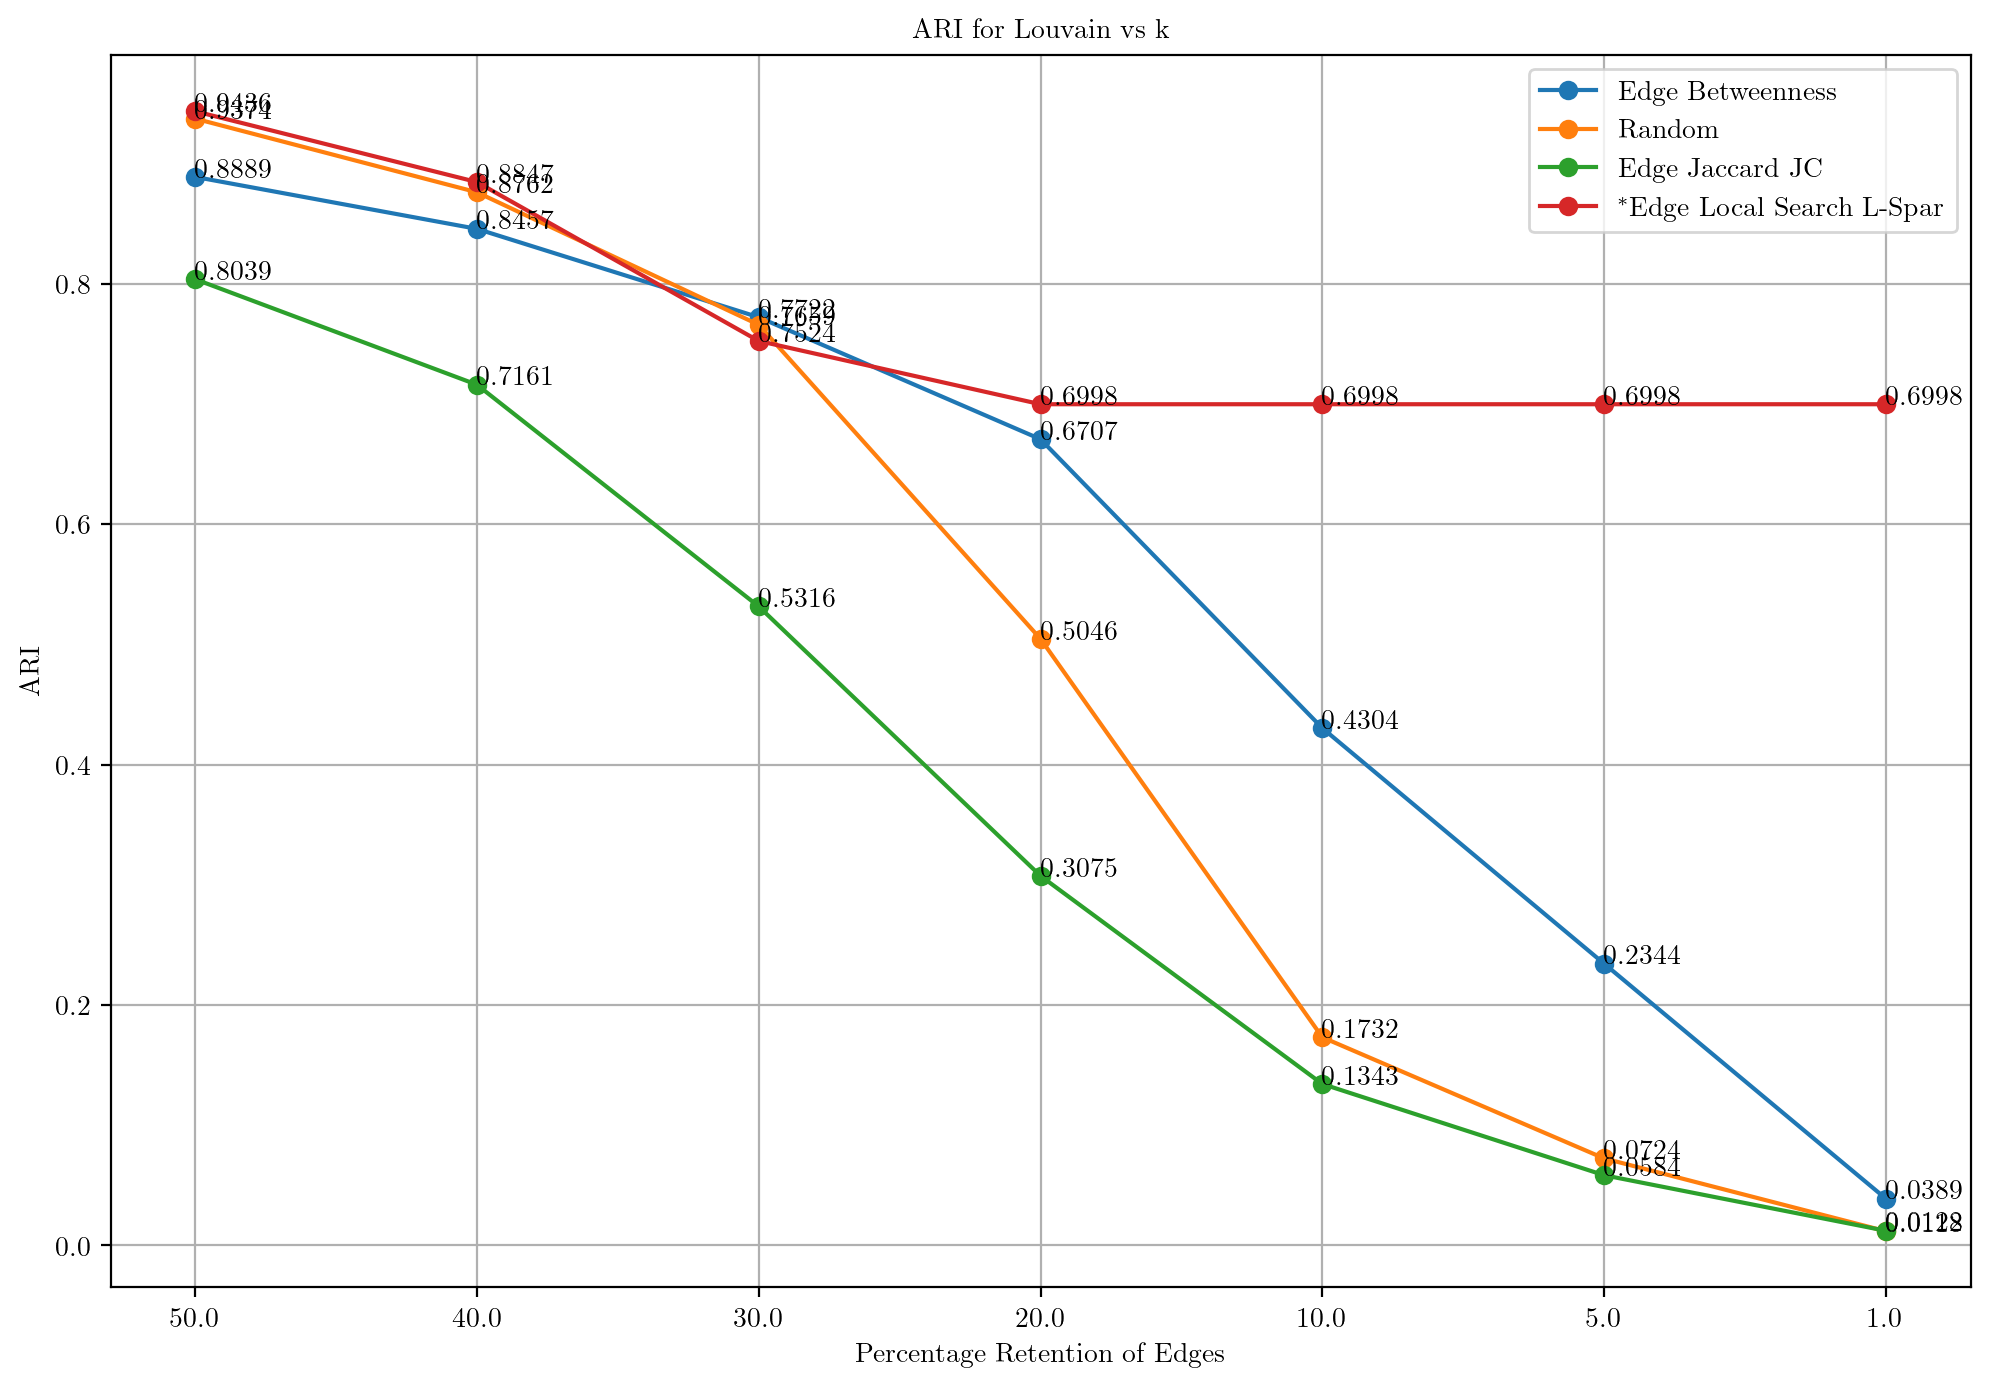

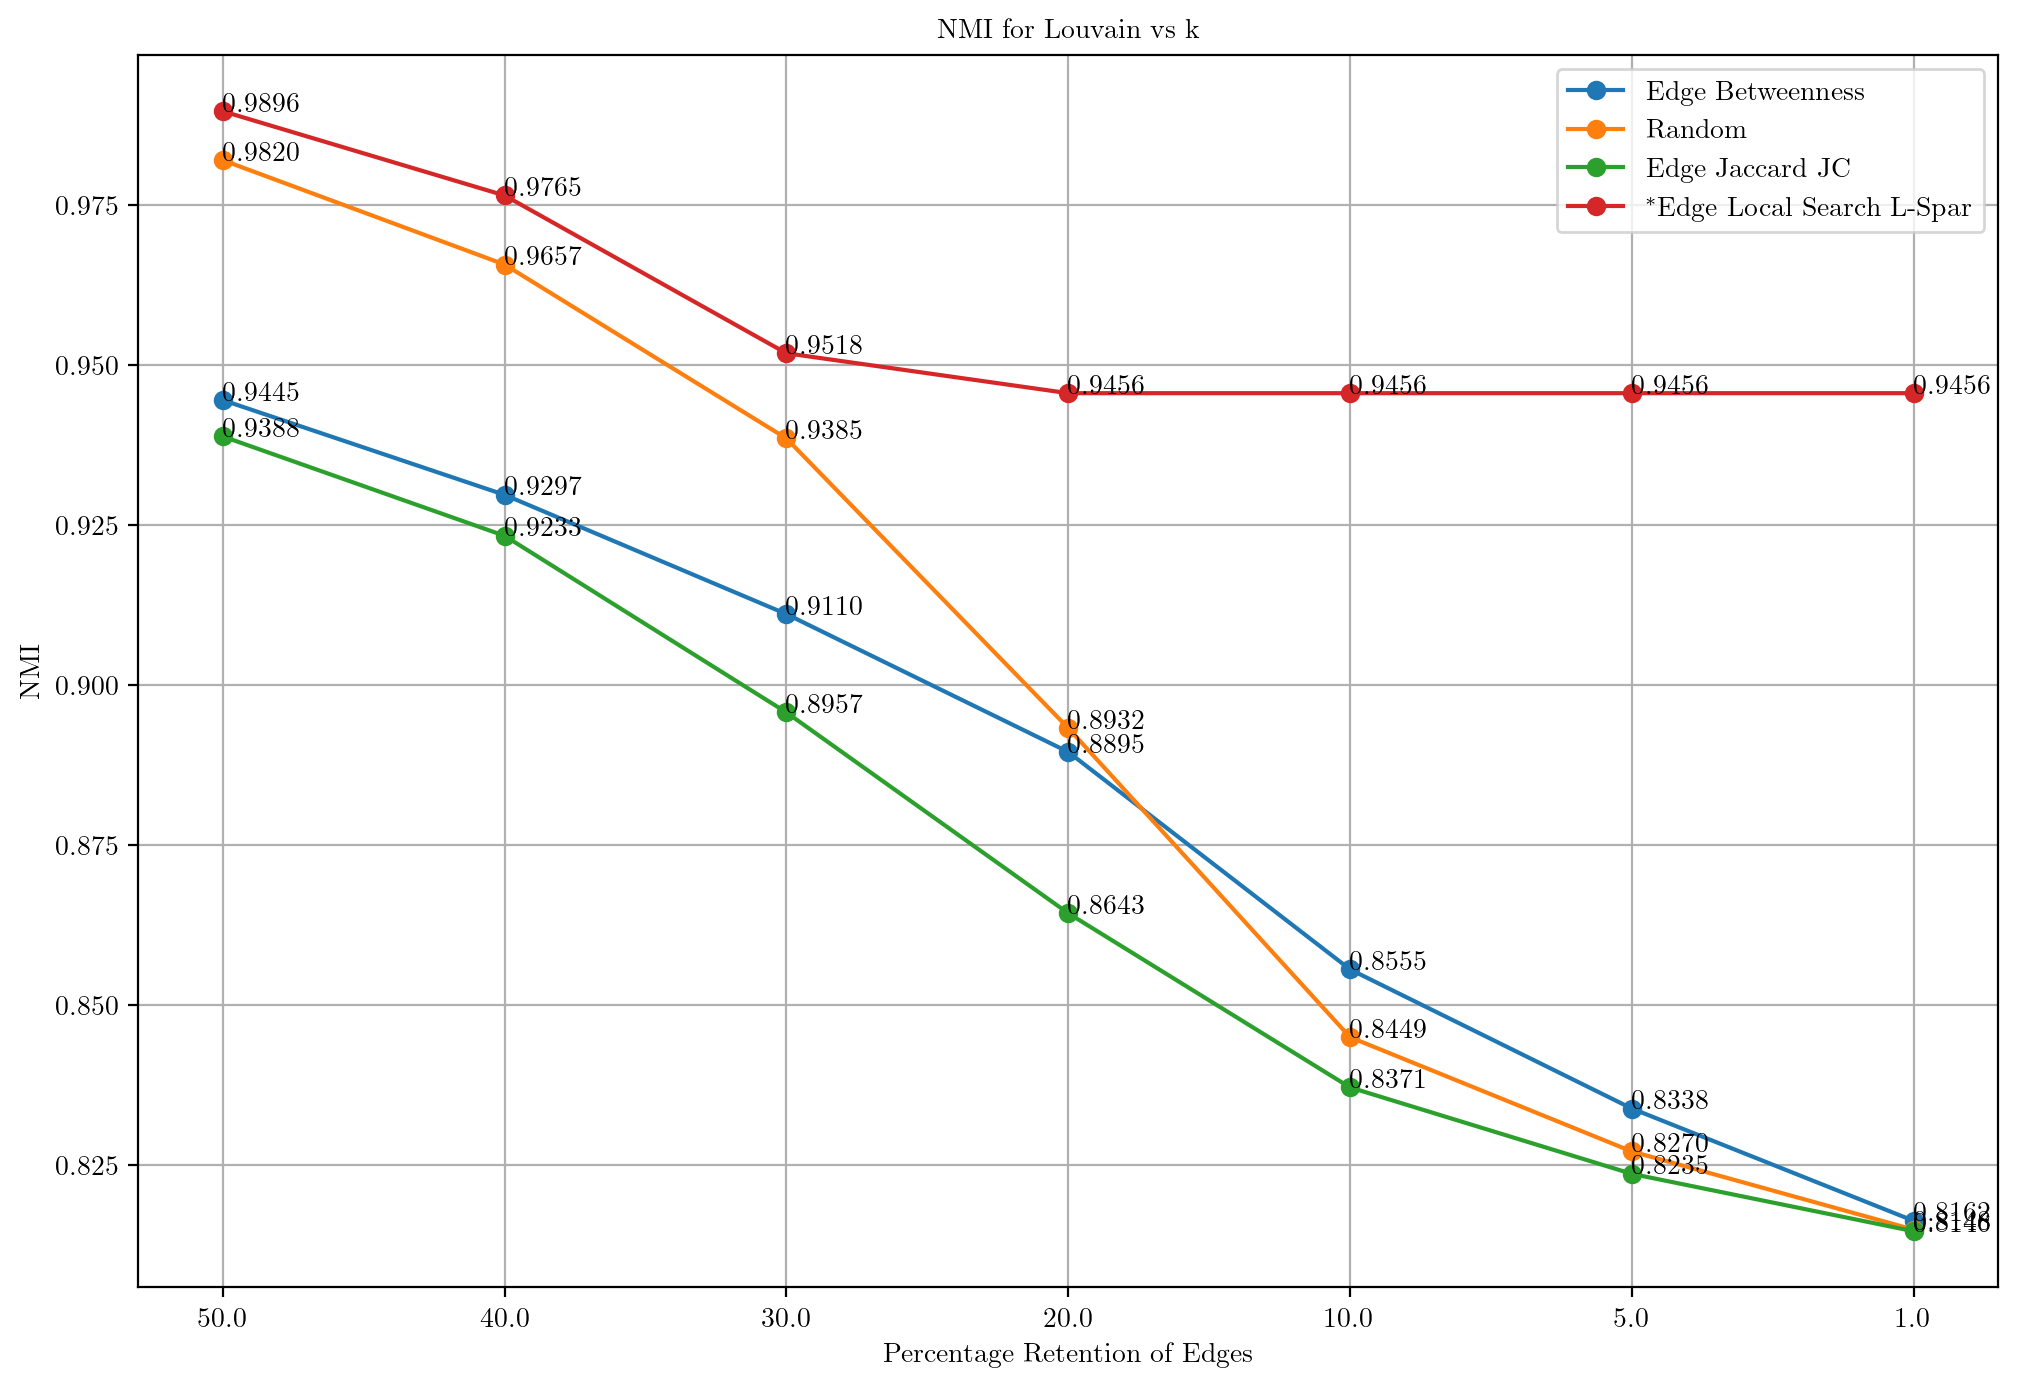

In [23]:
sparseAmzGraphs = plot_metrics_sparse(G_ind_Amz, run_louvain(G_ind_Amz), sparseFunctions, k_values)

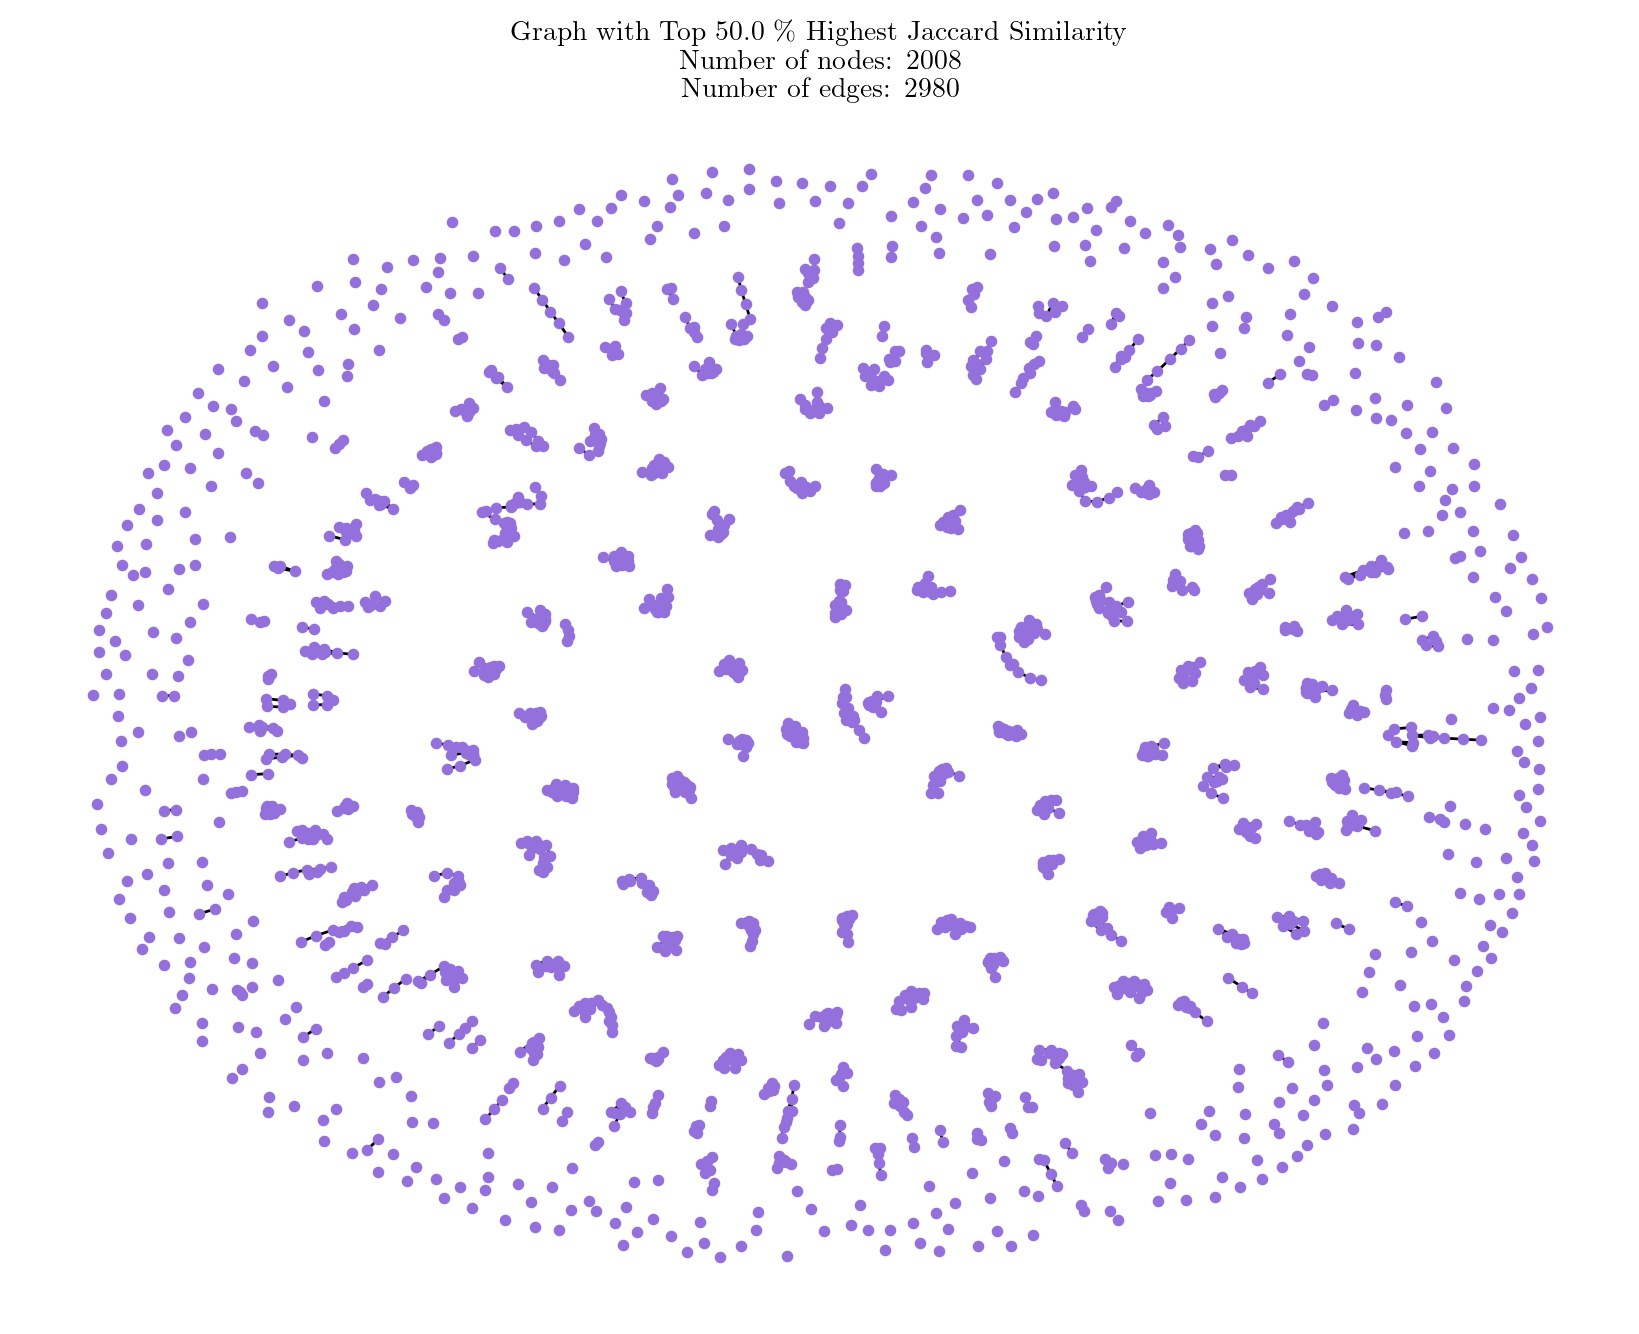

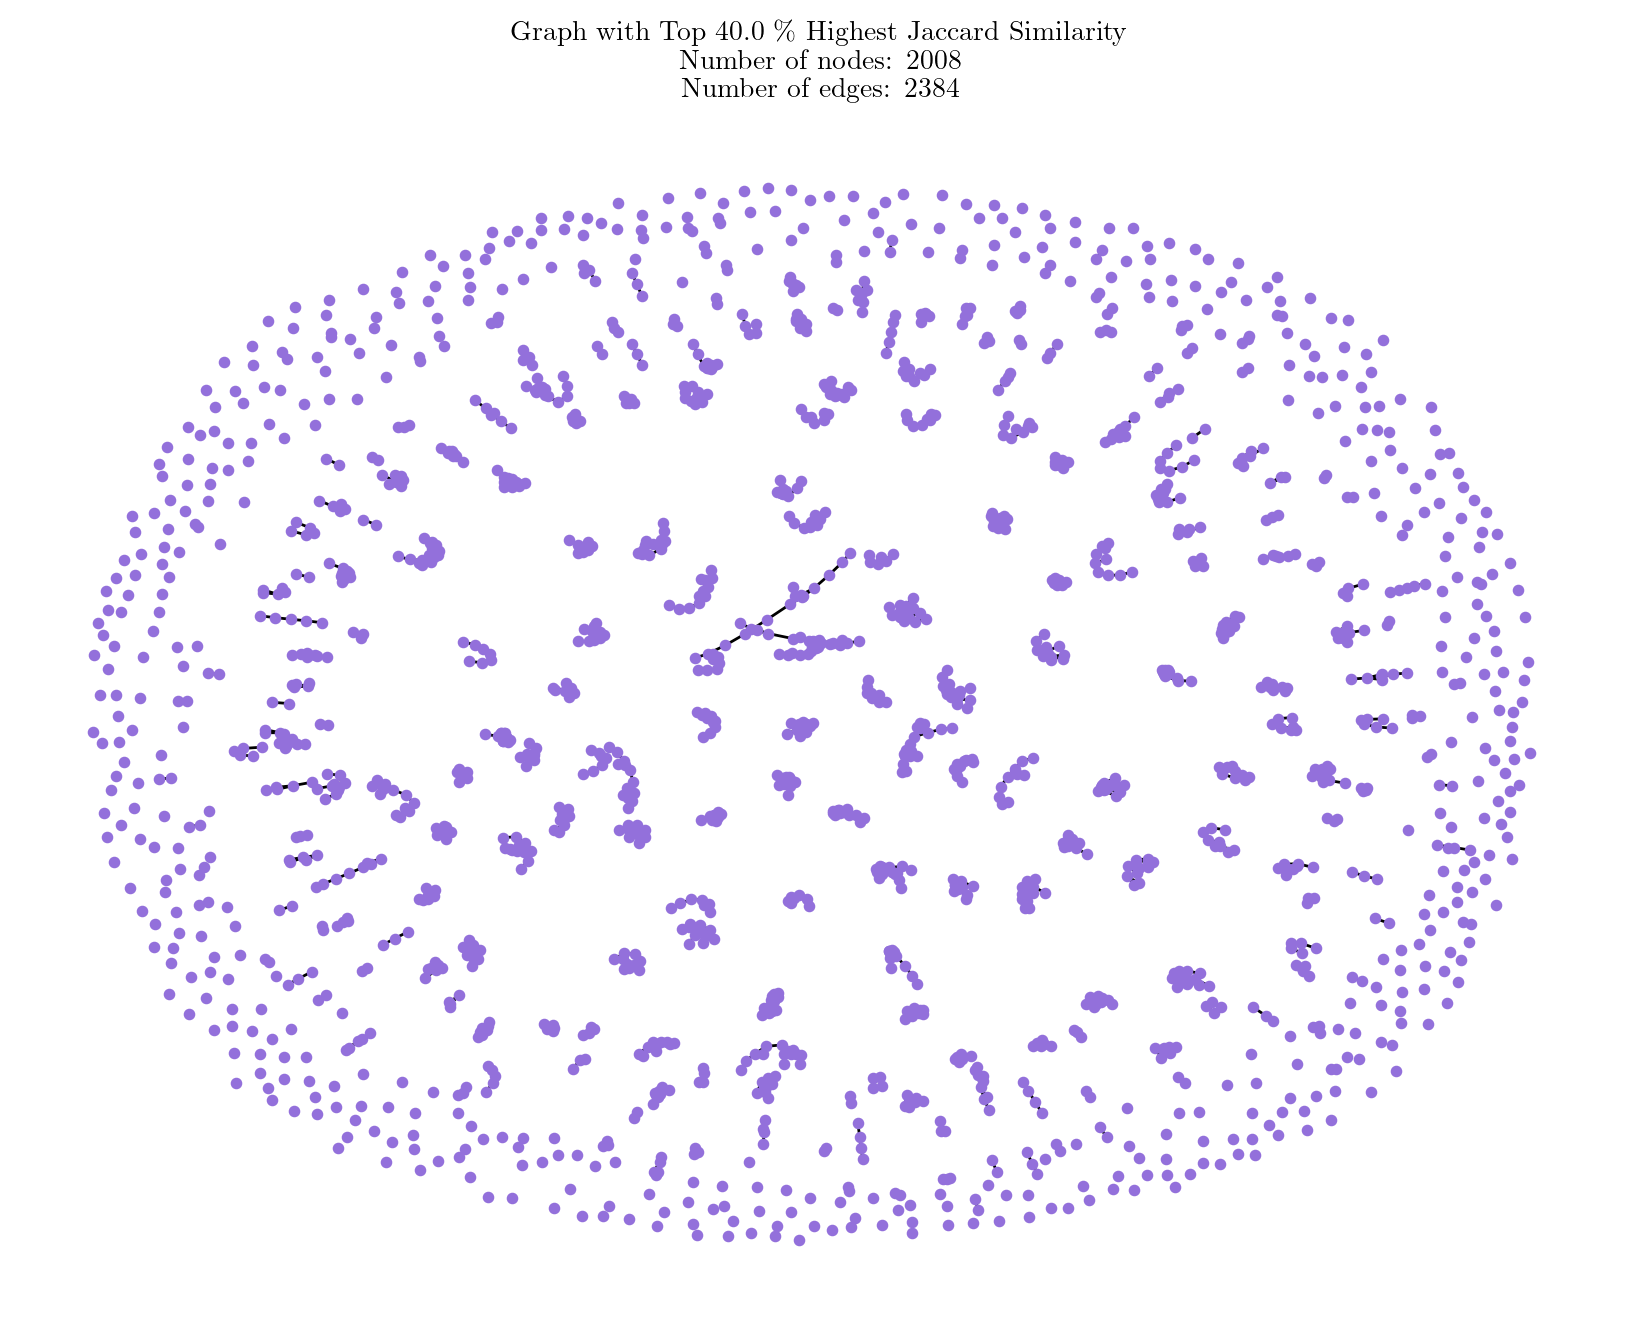

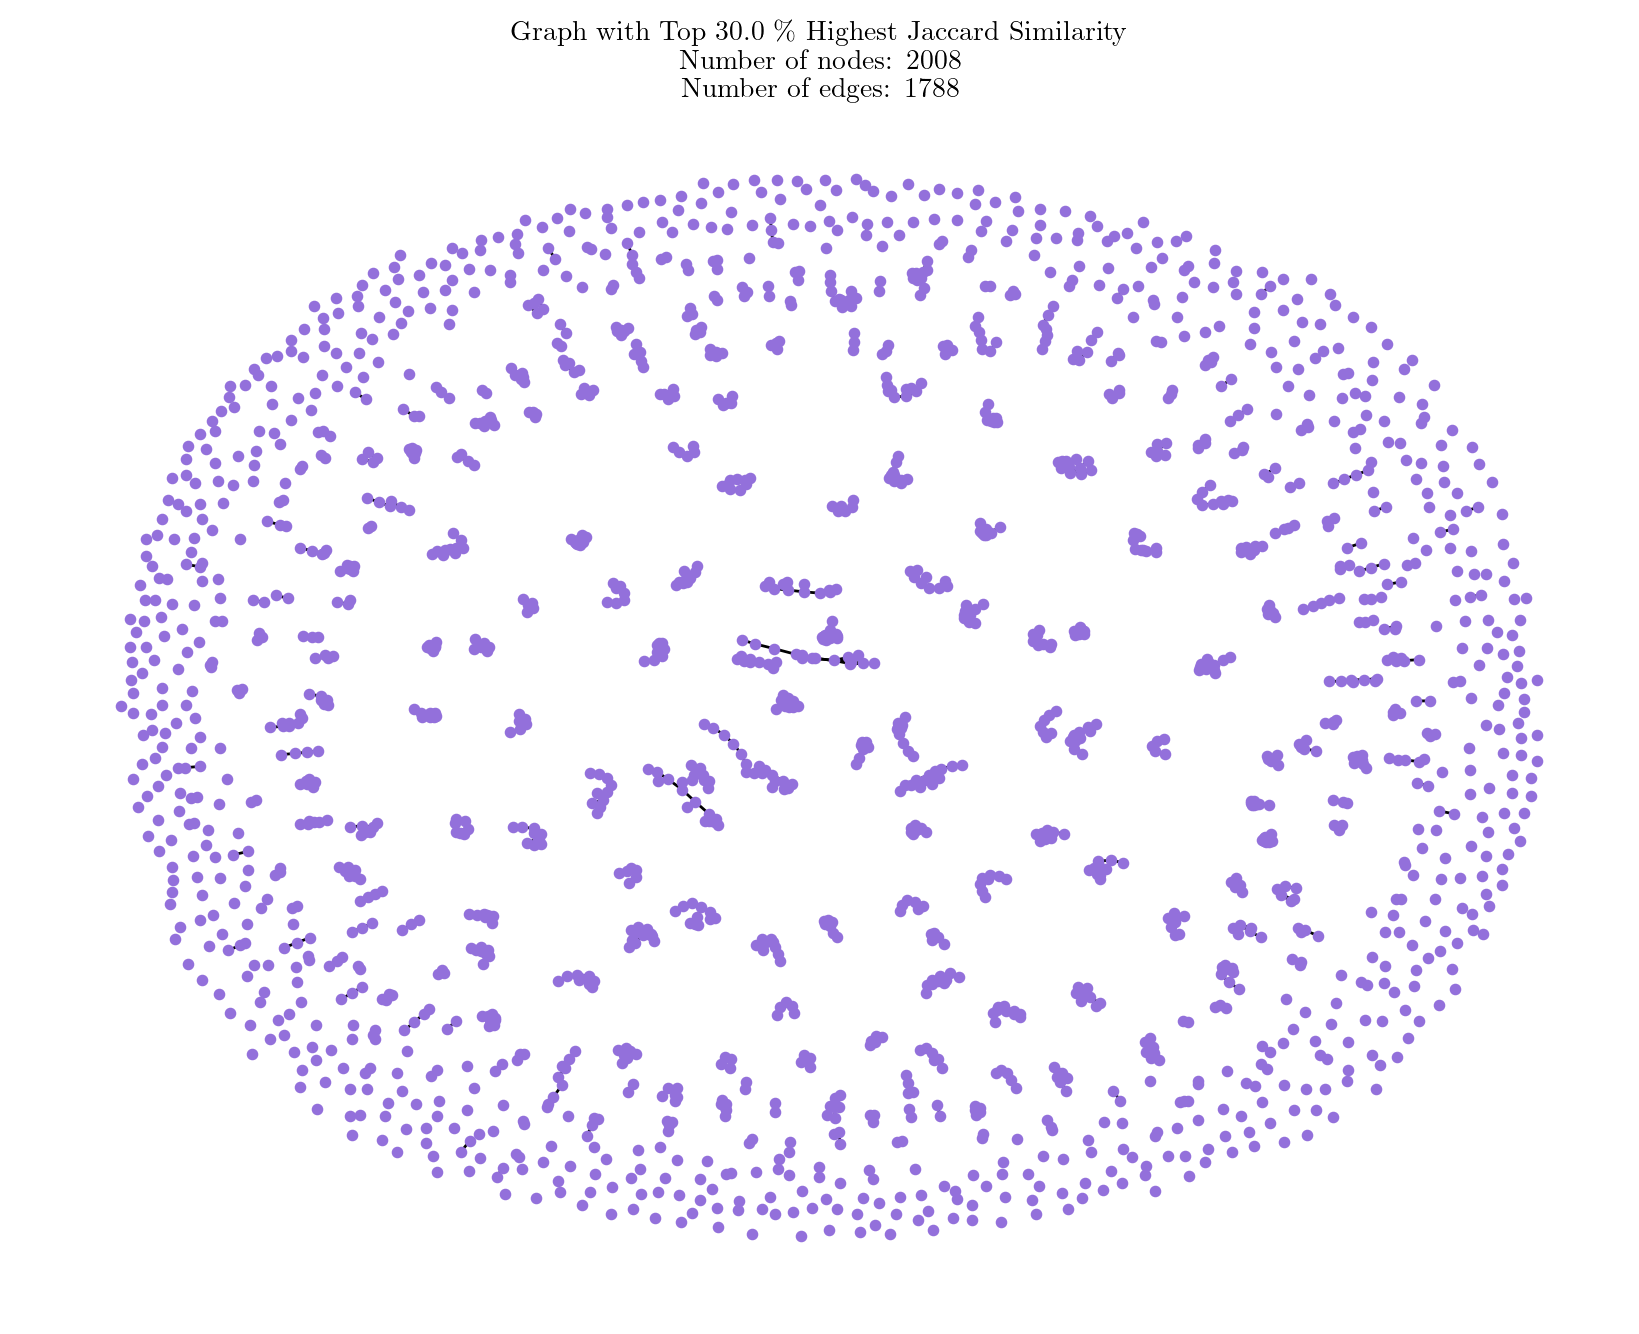

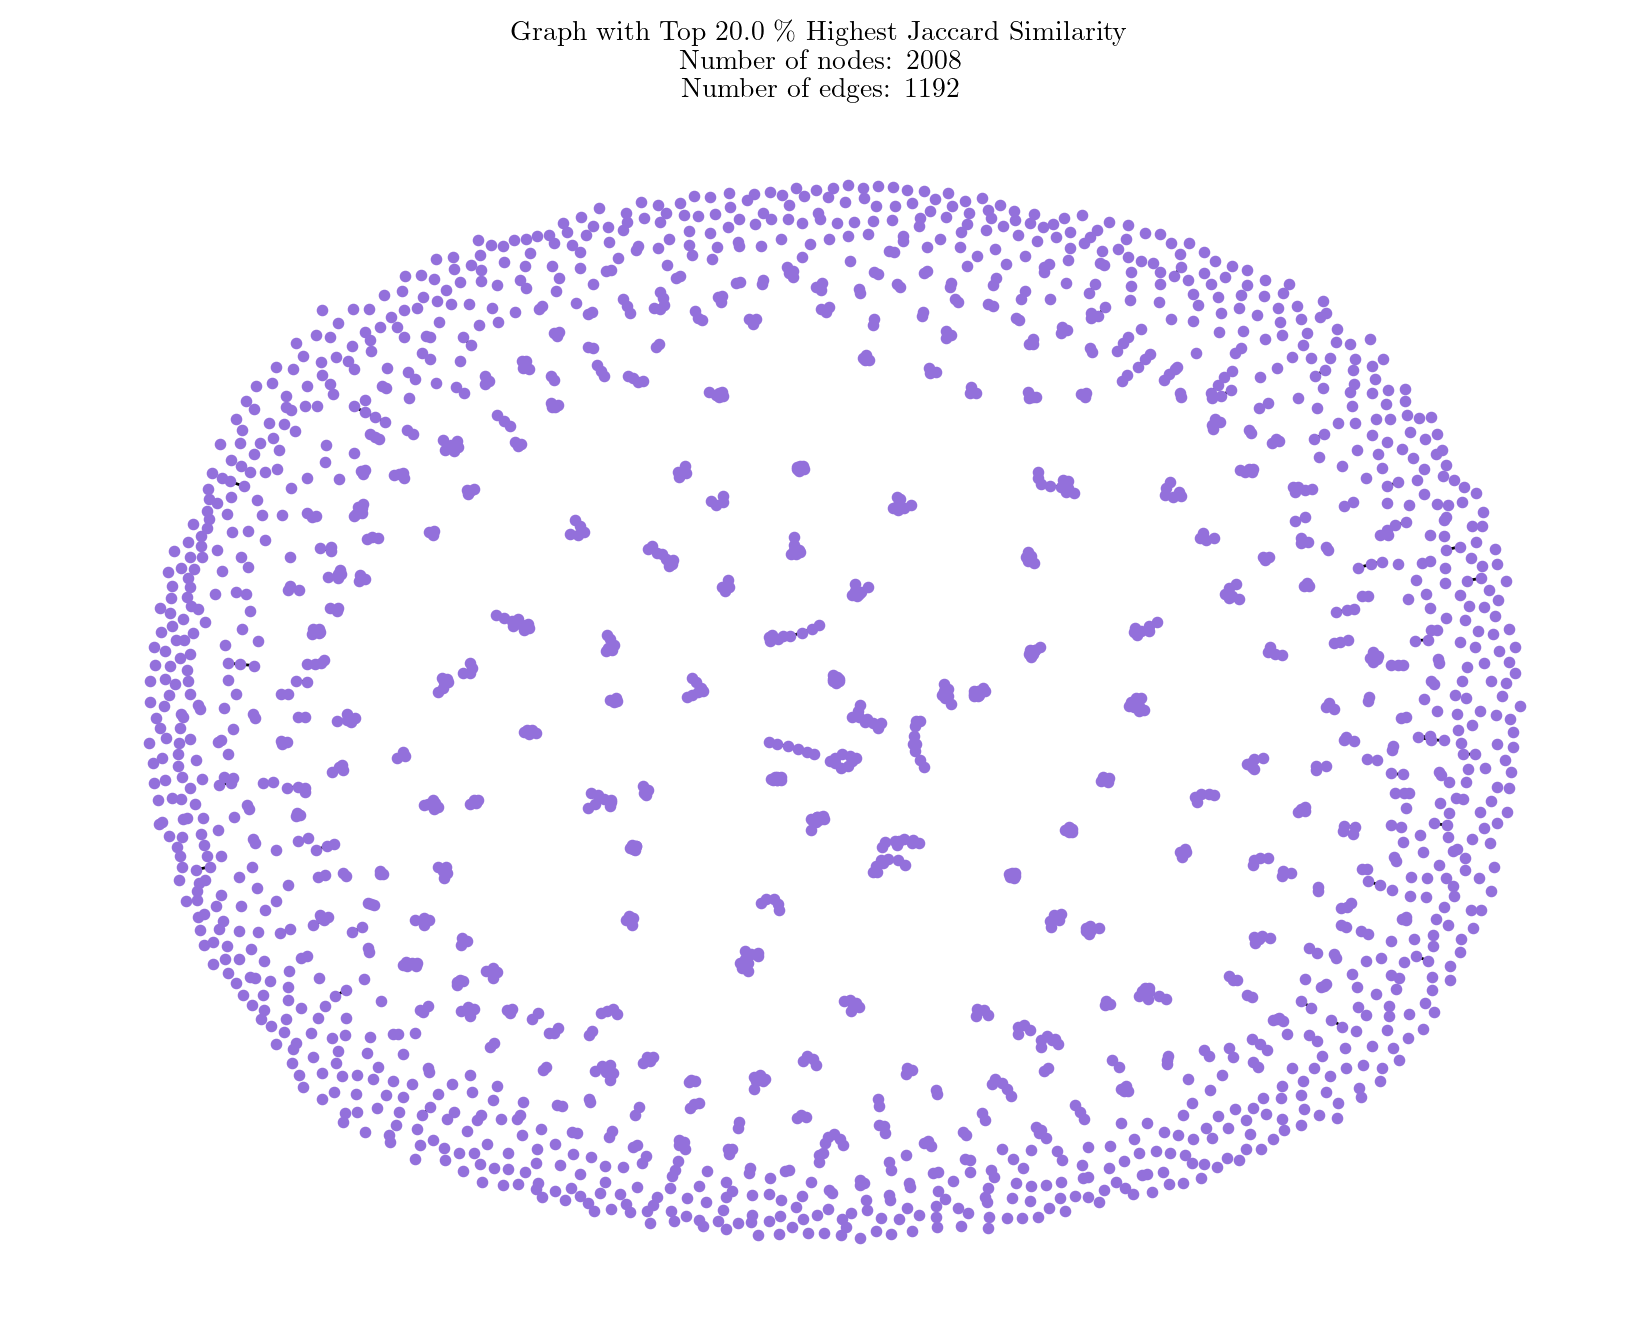

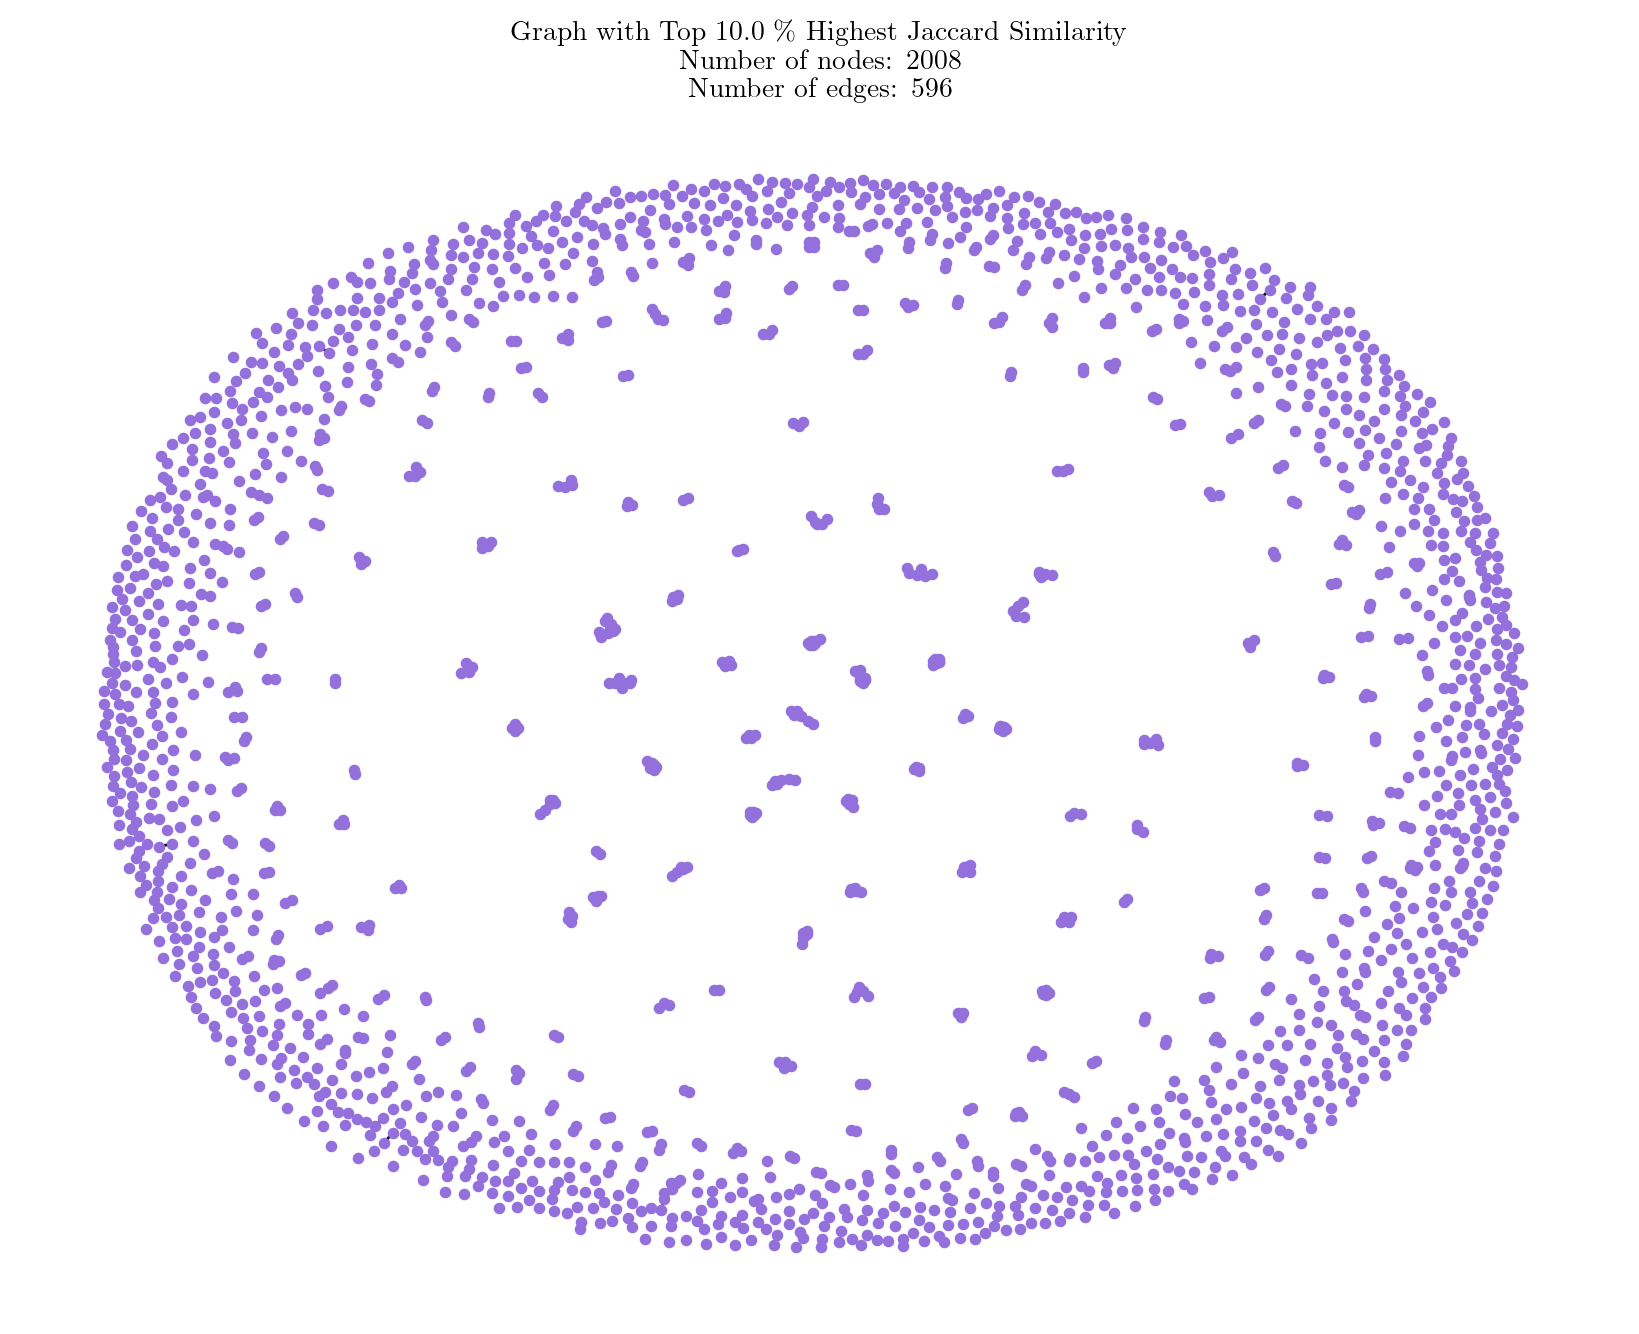

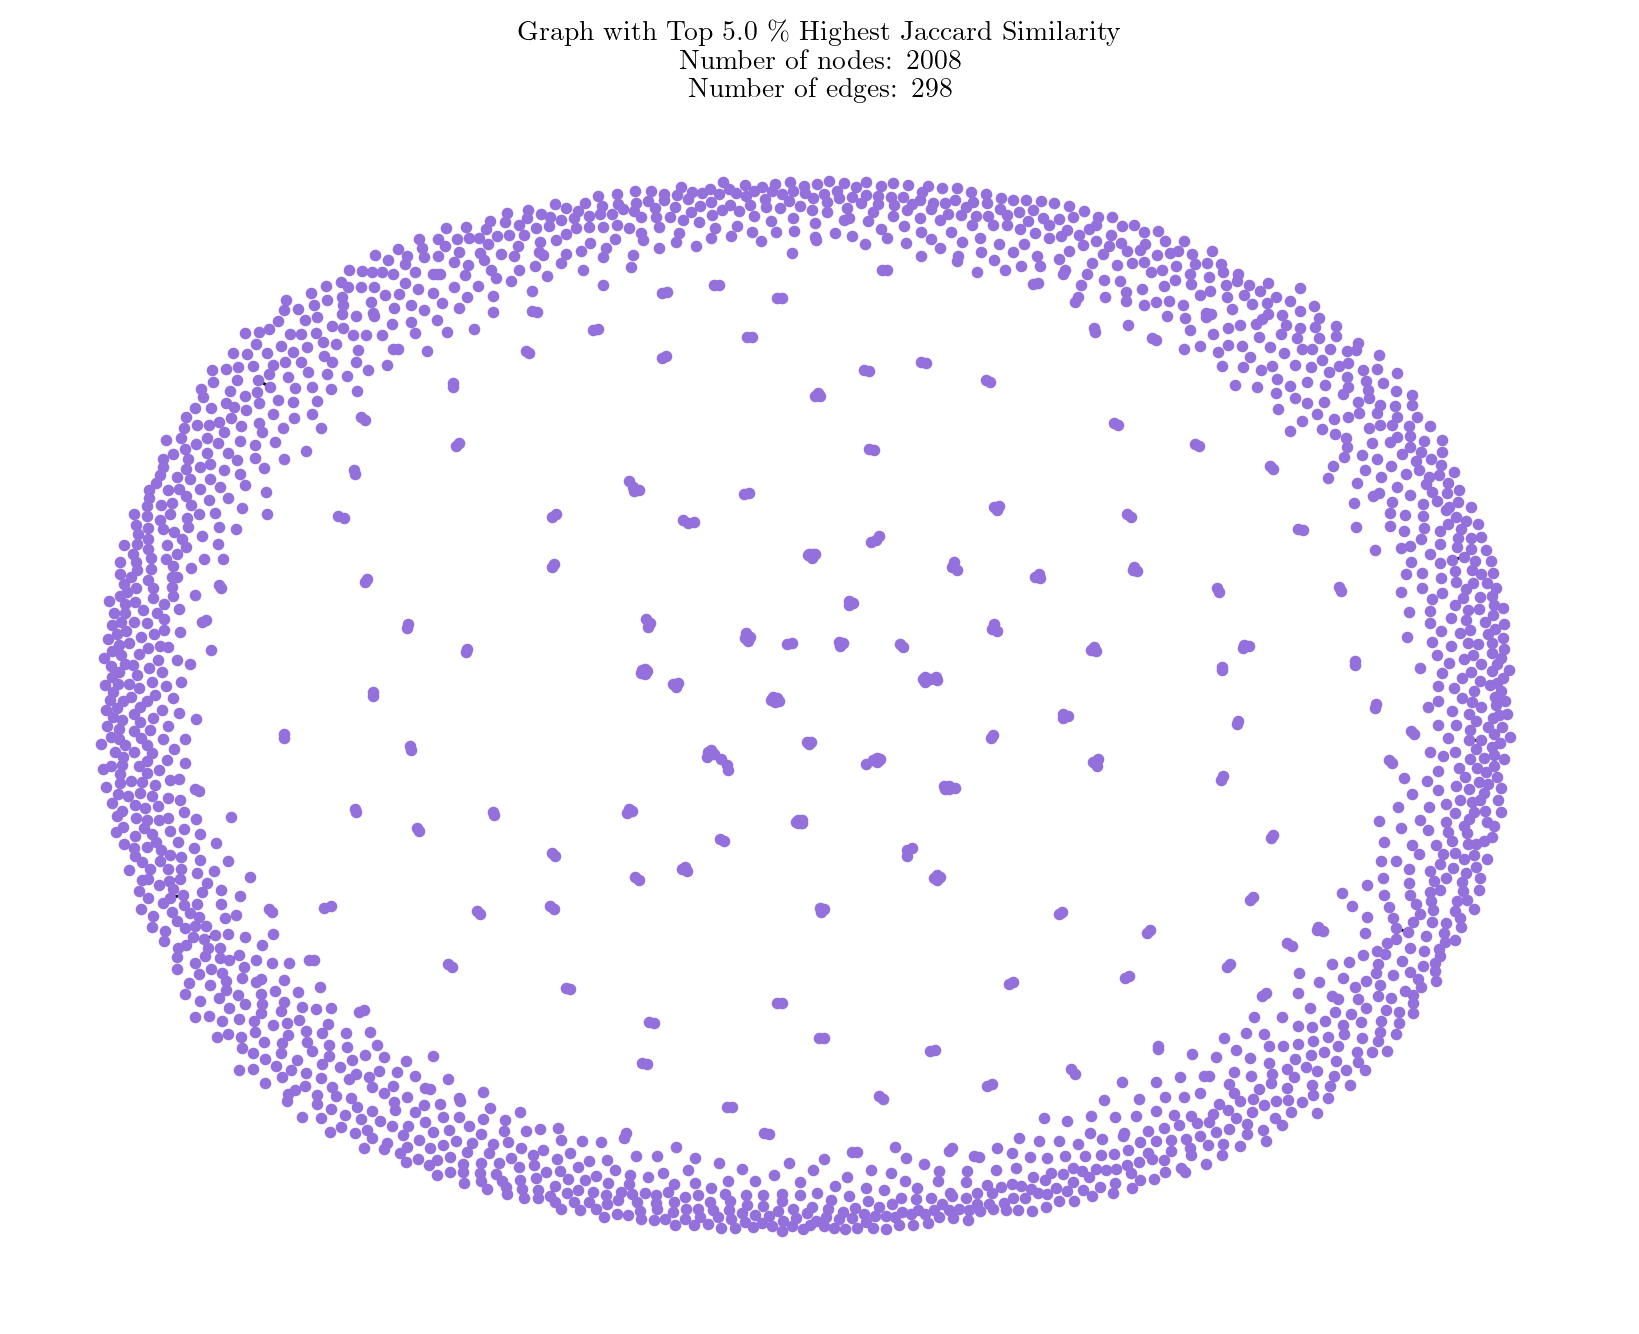

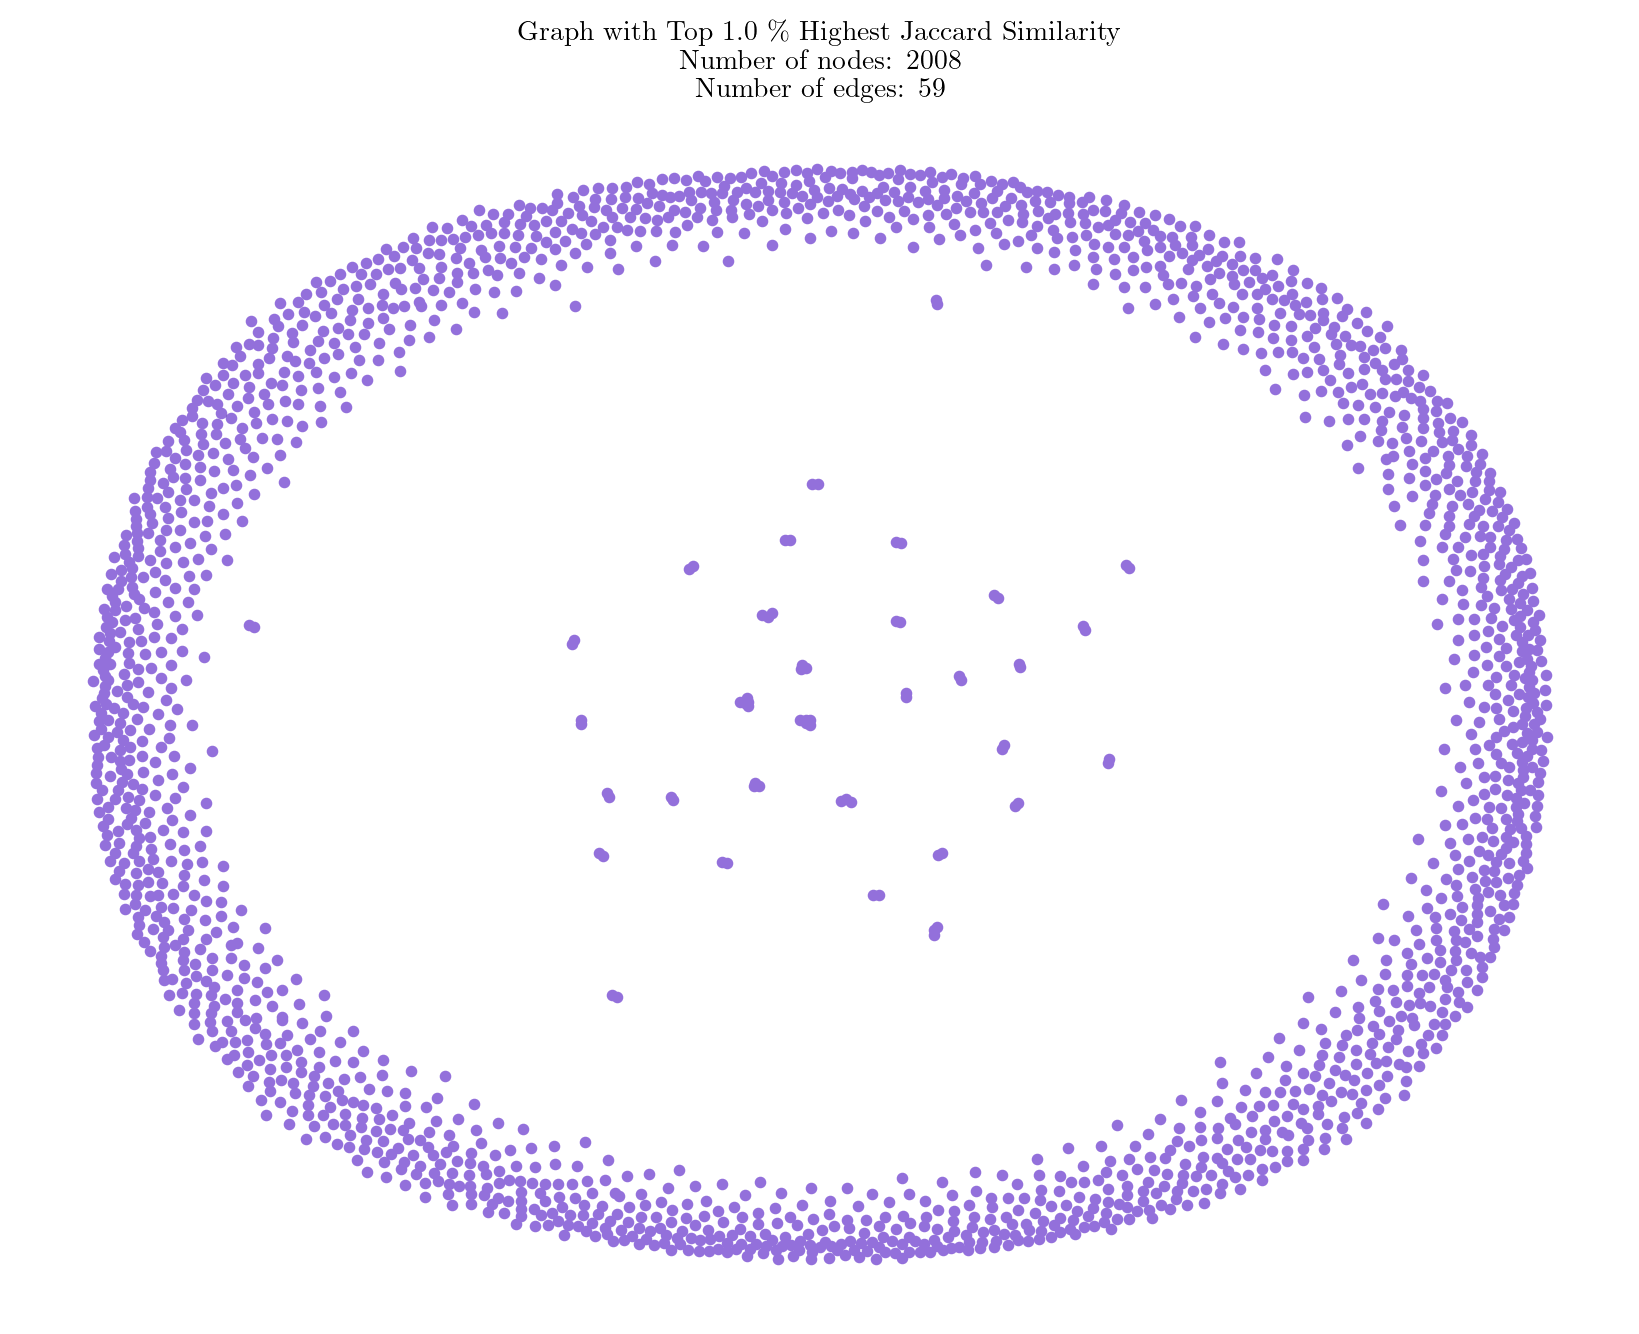

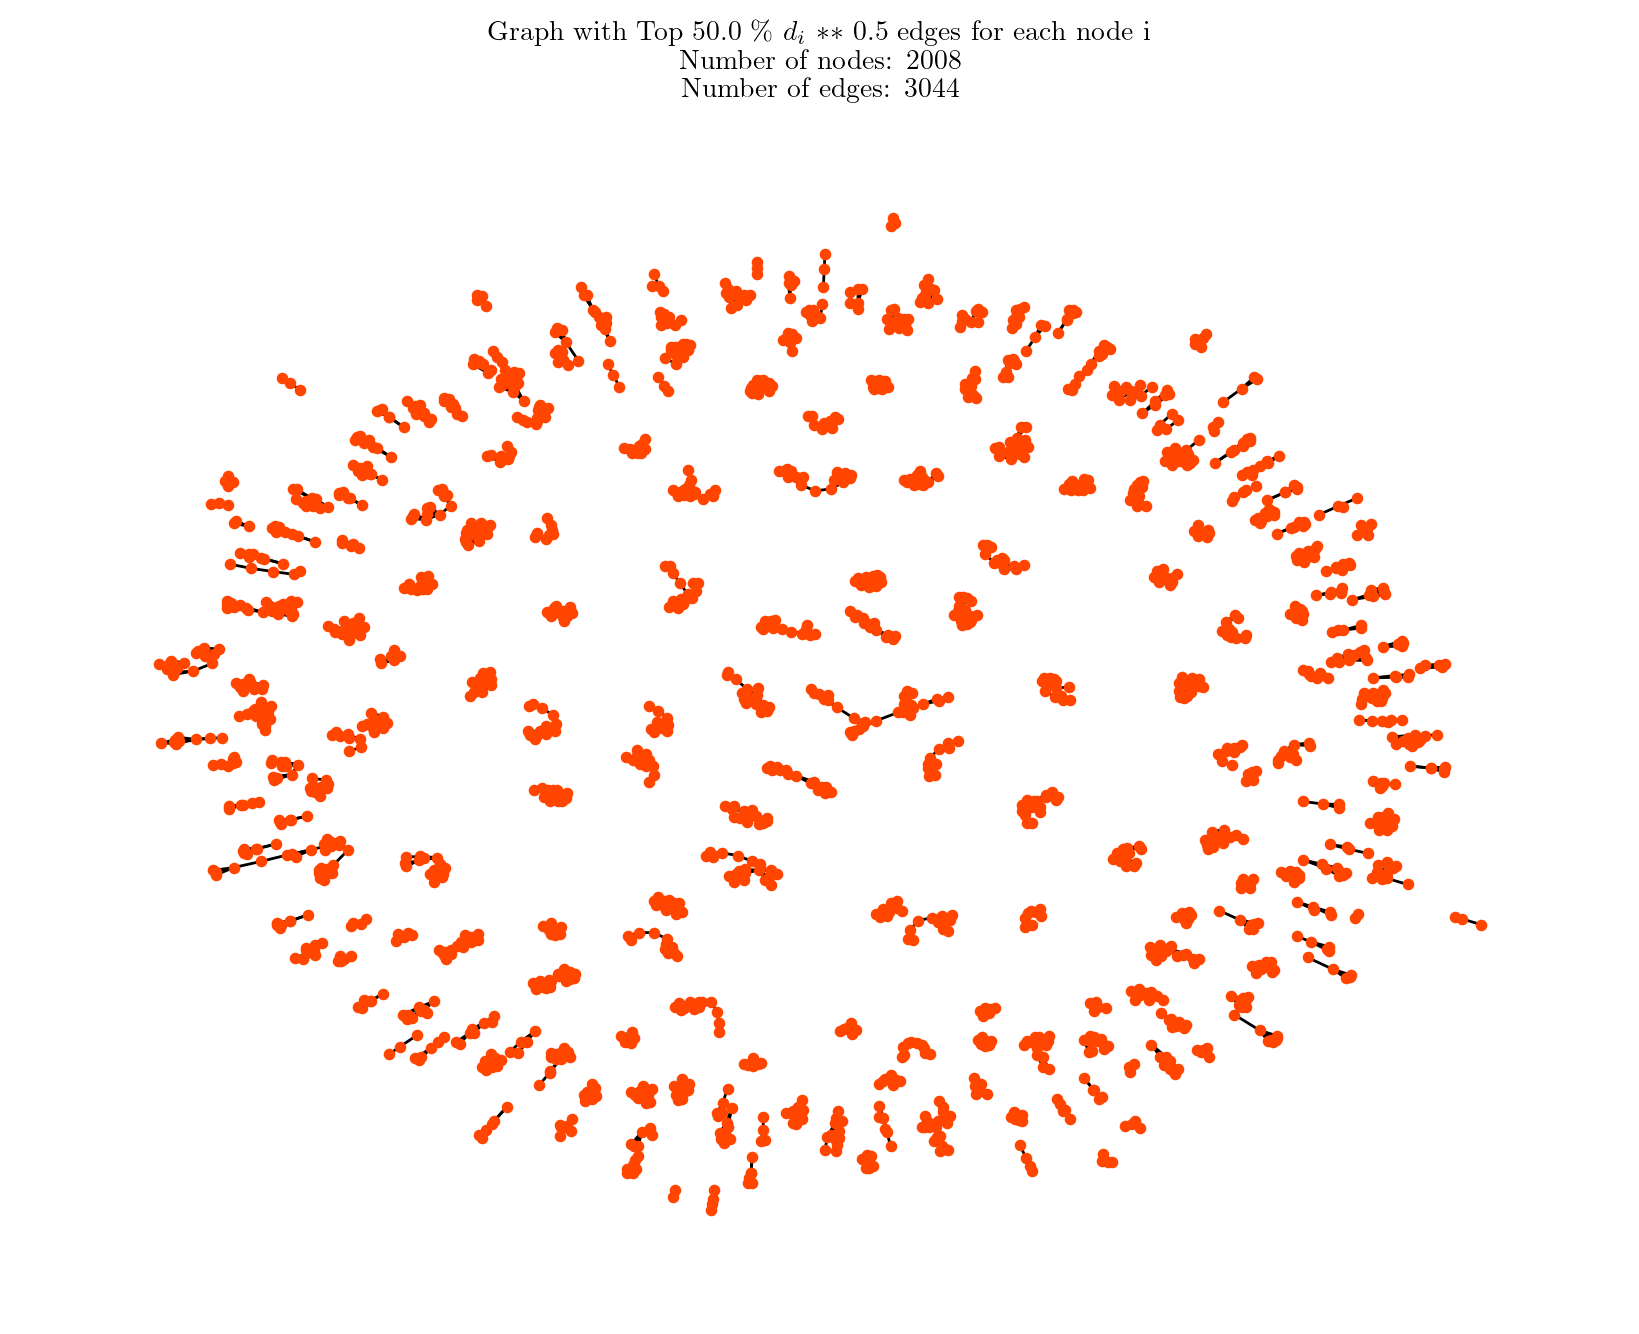

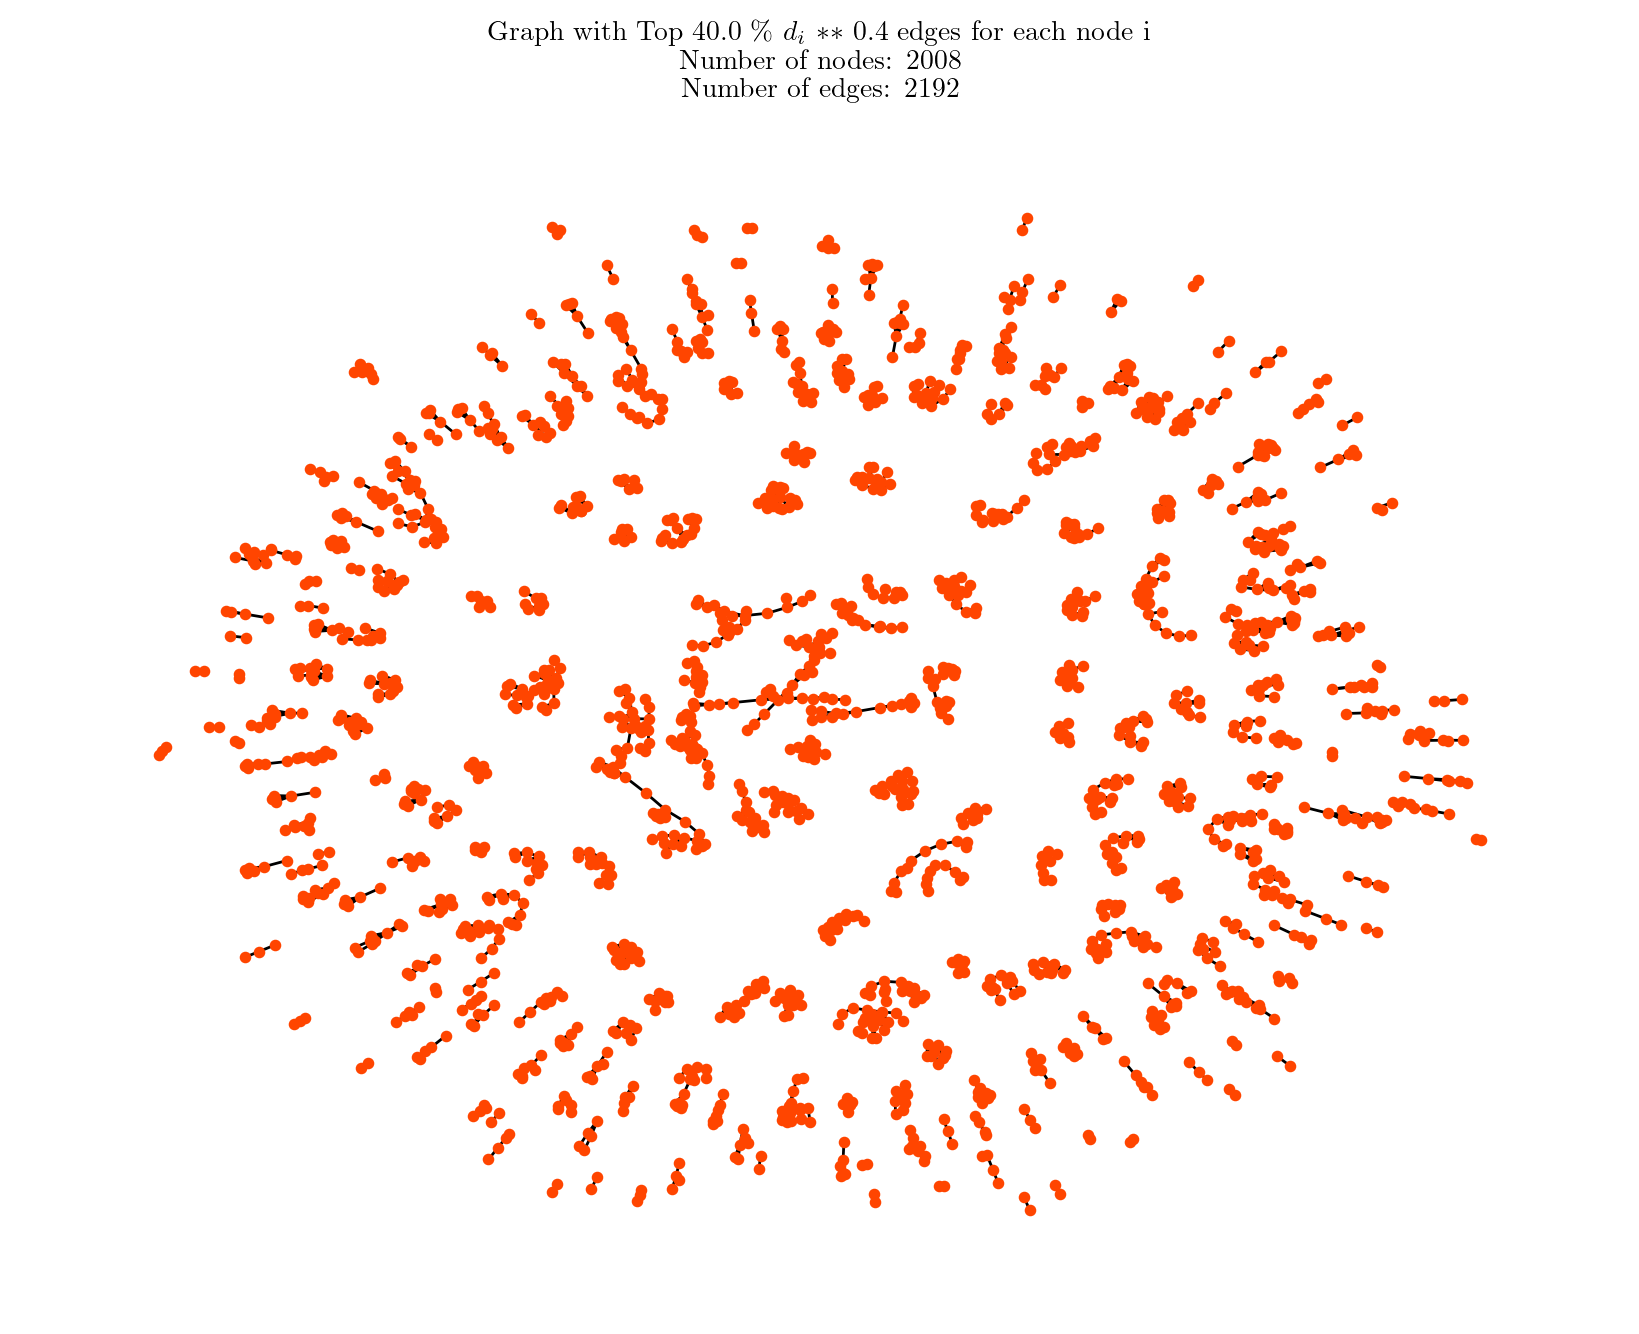

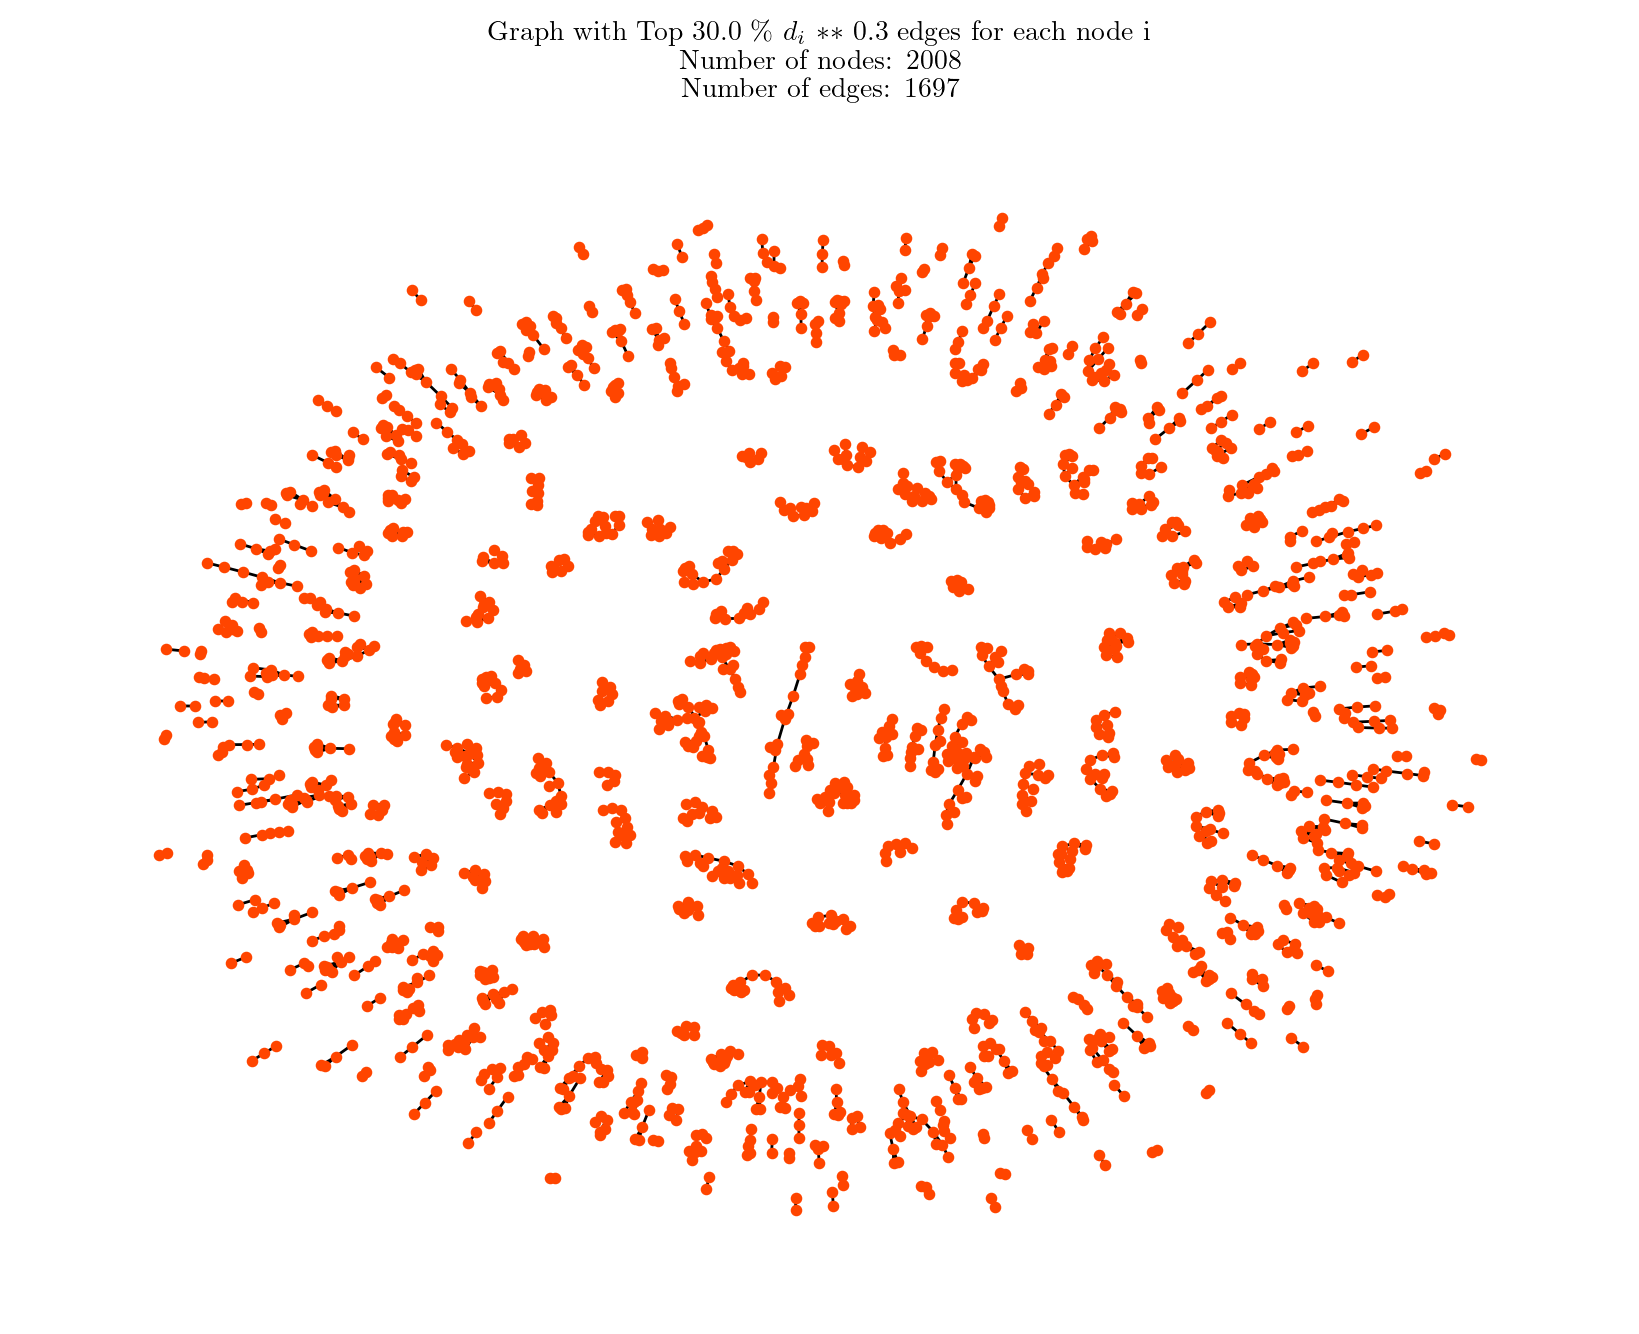

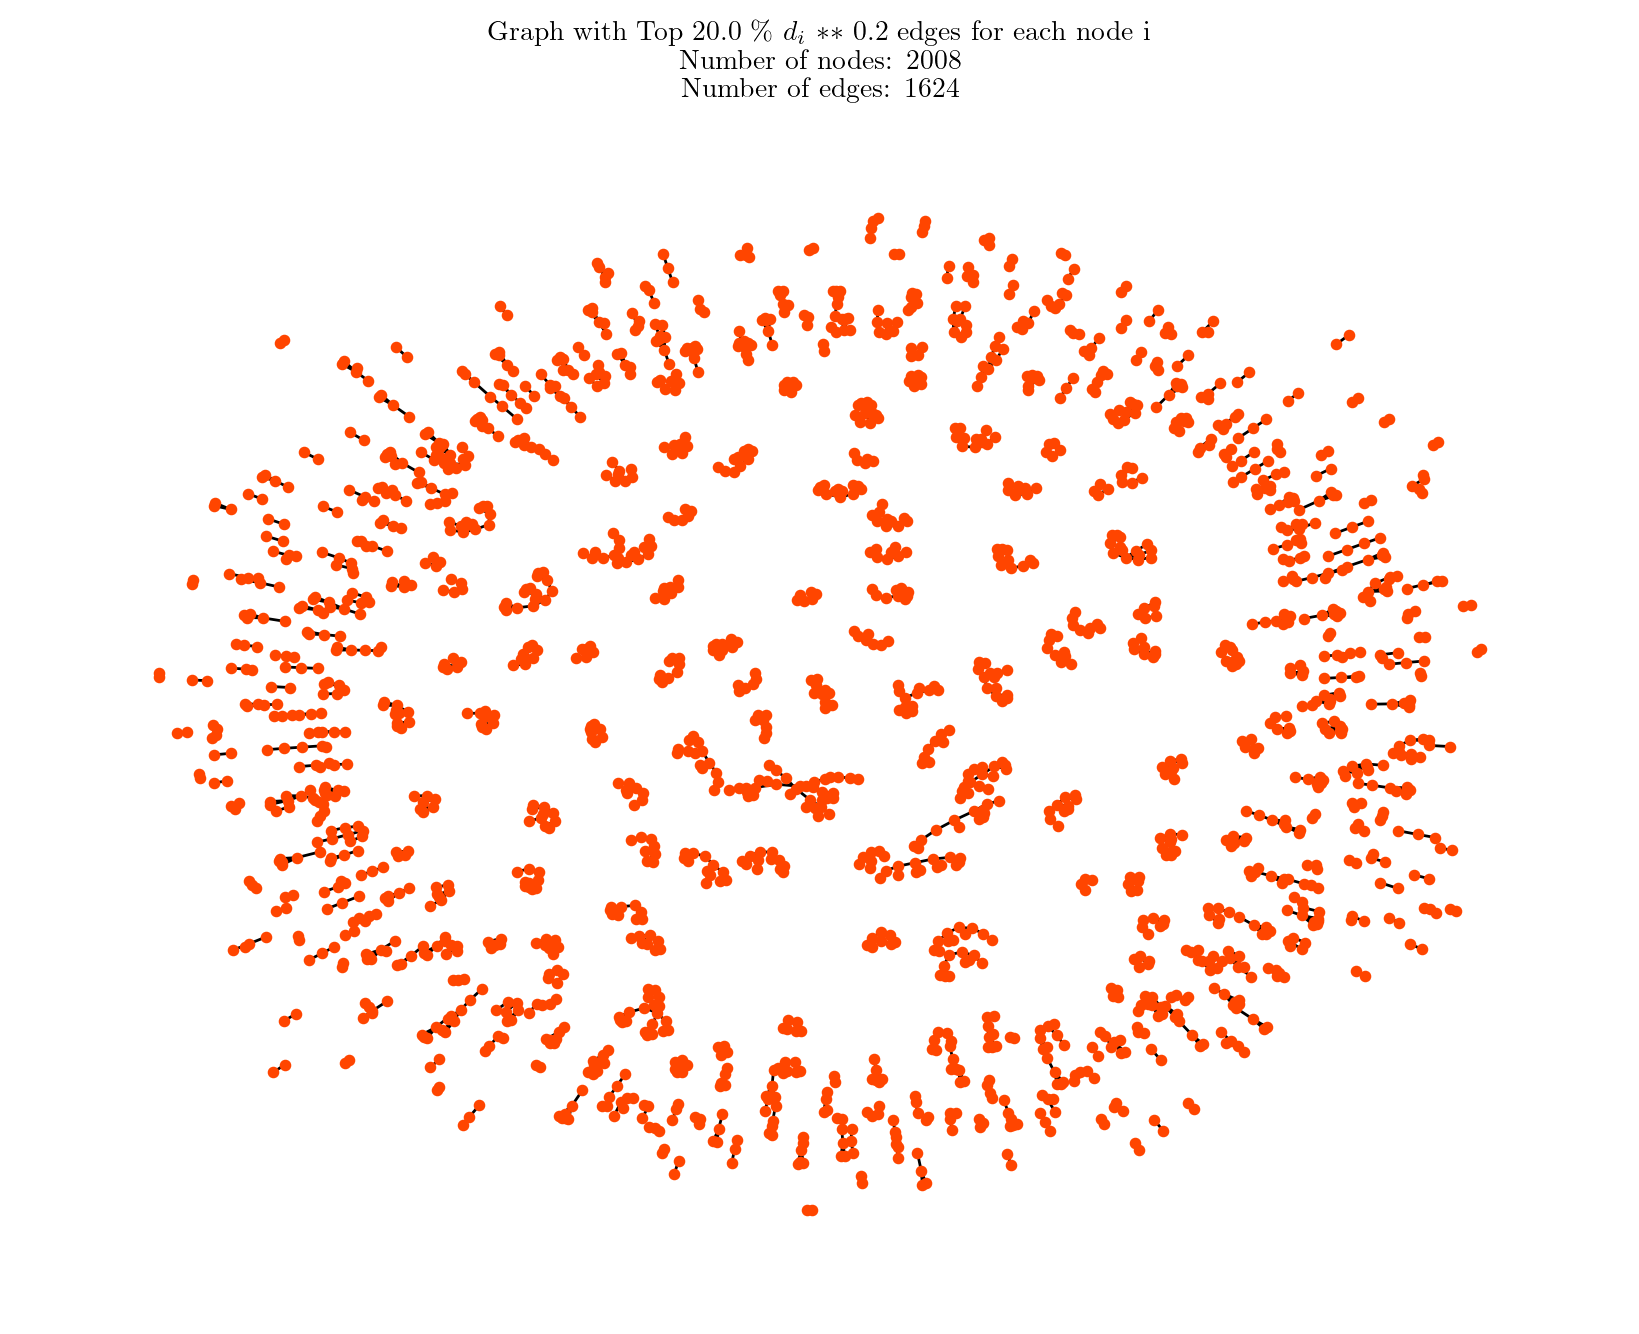

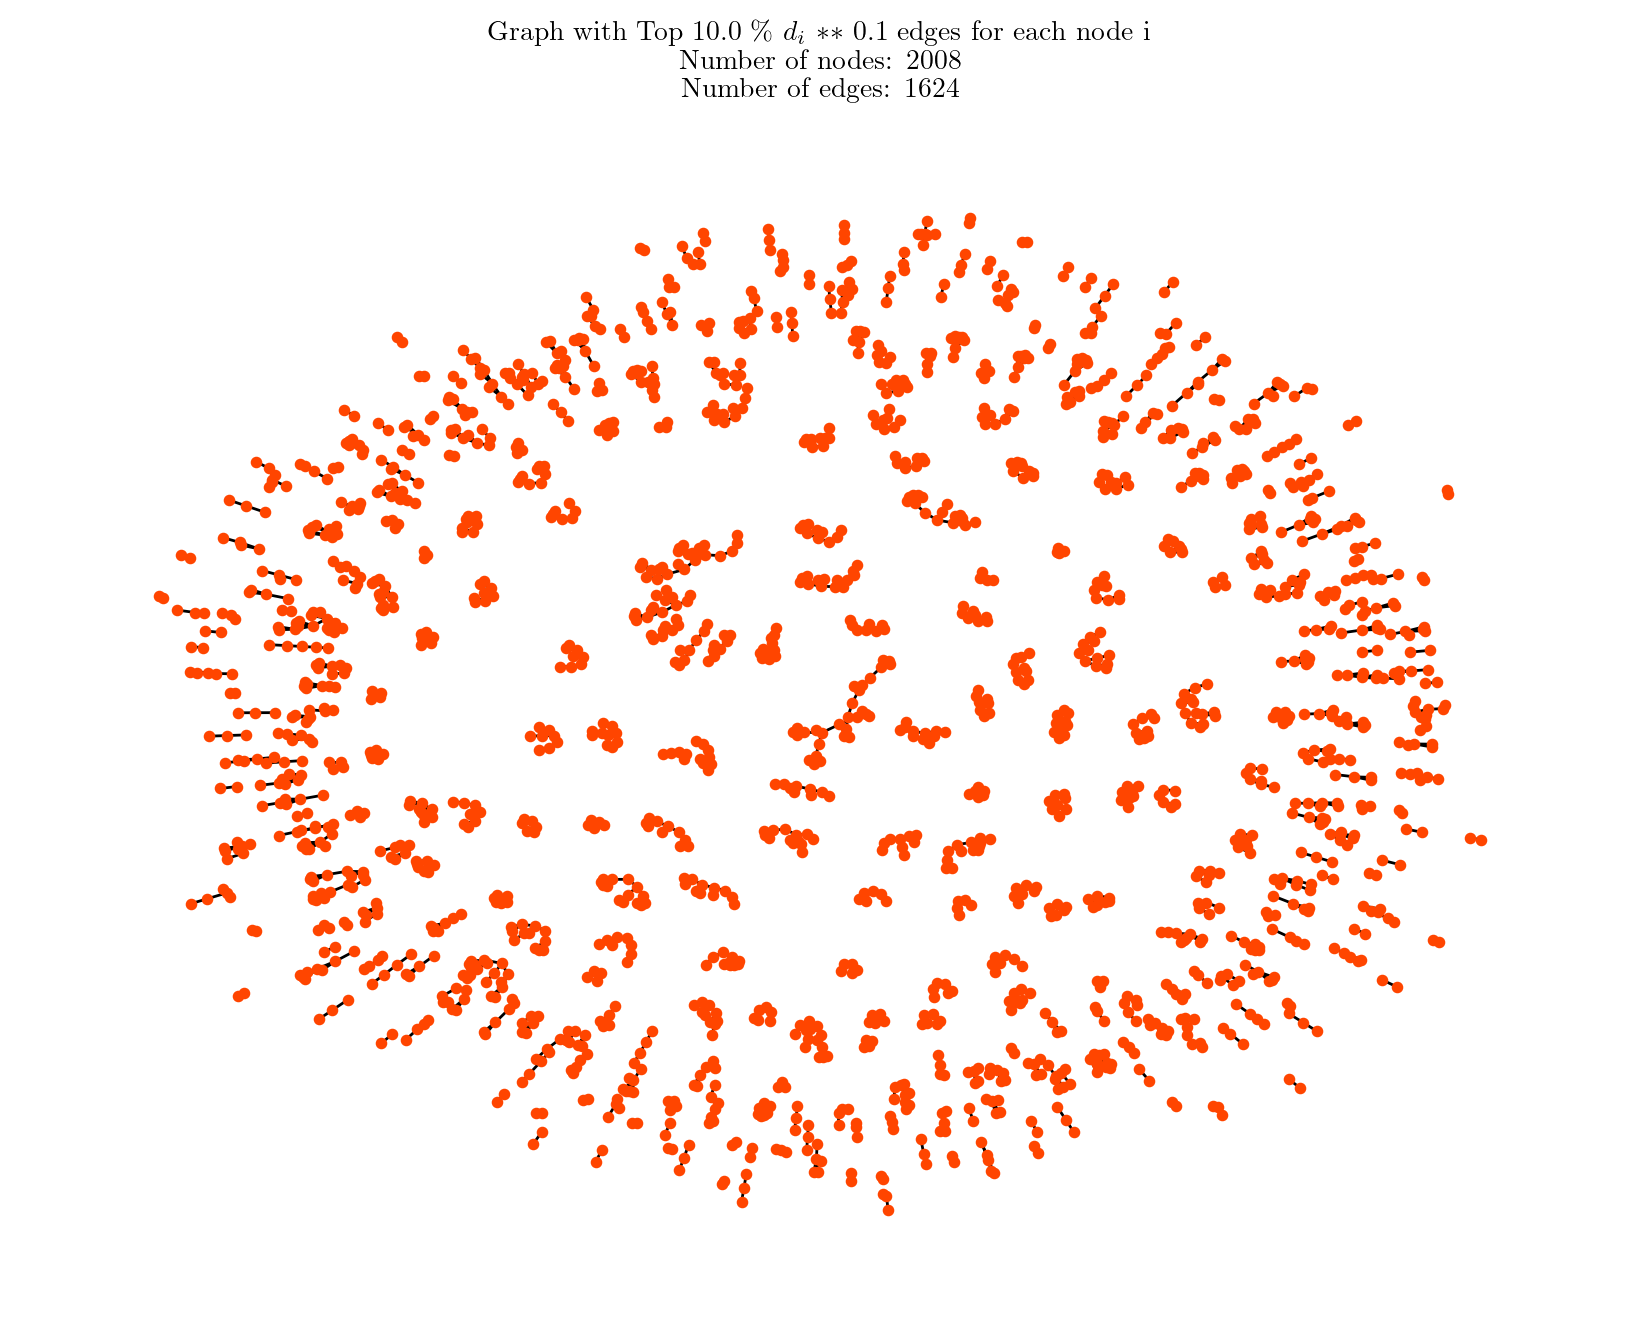

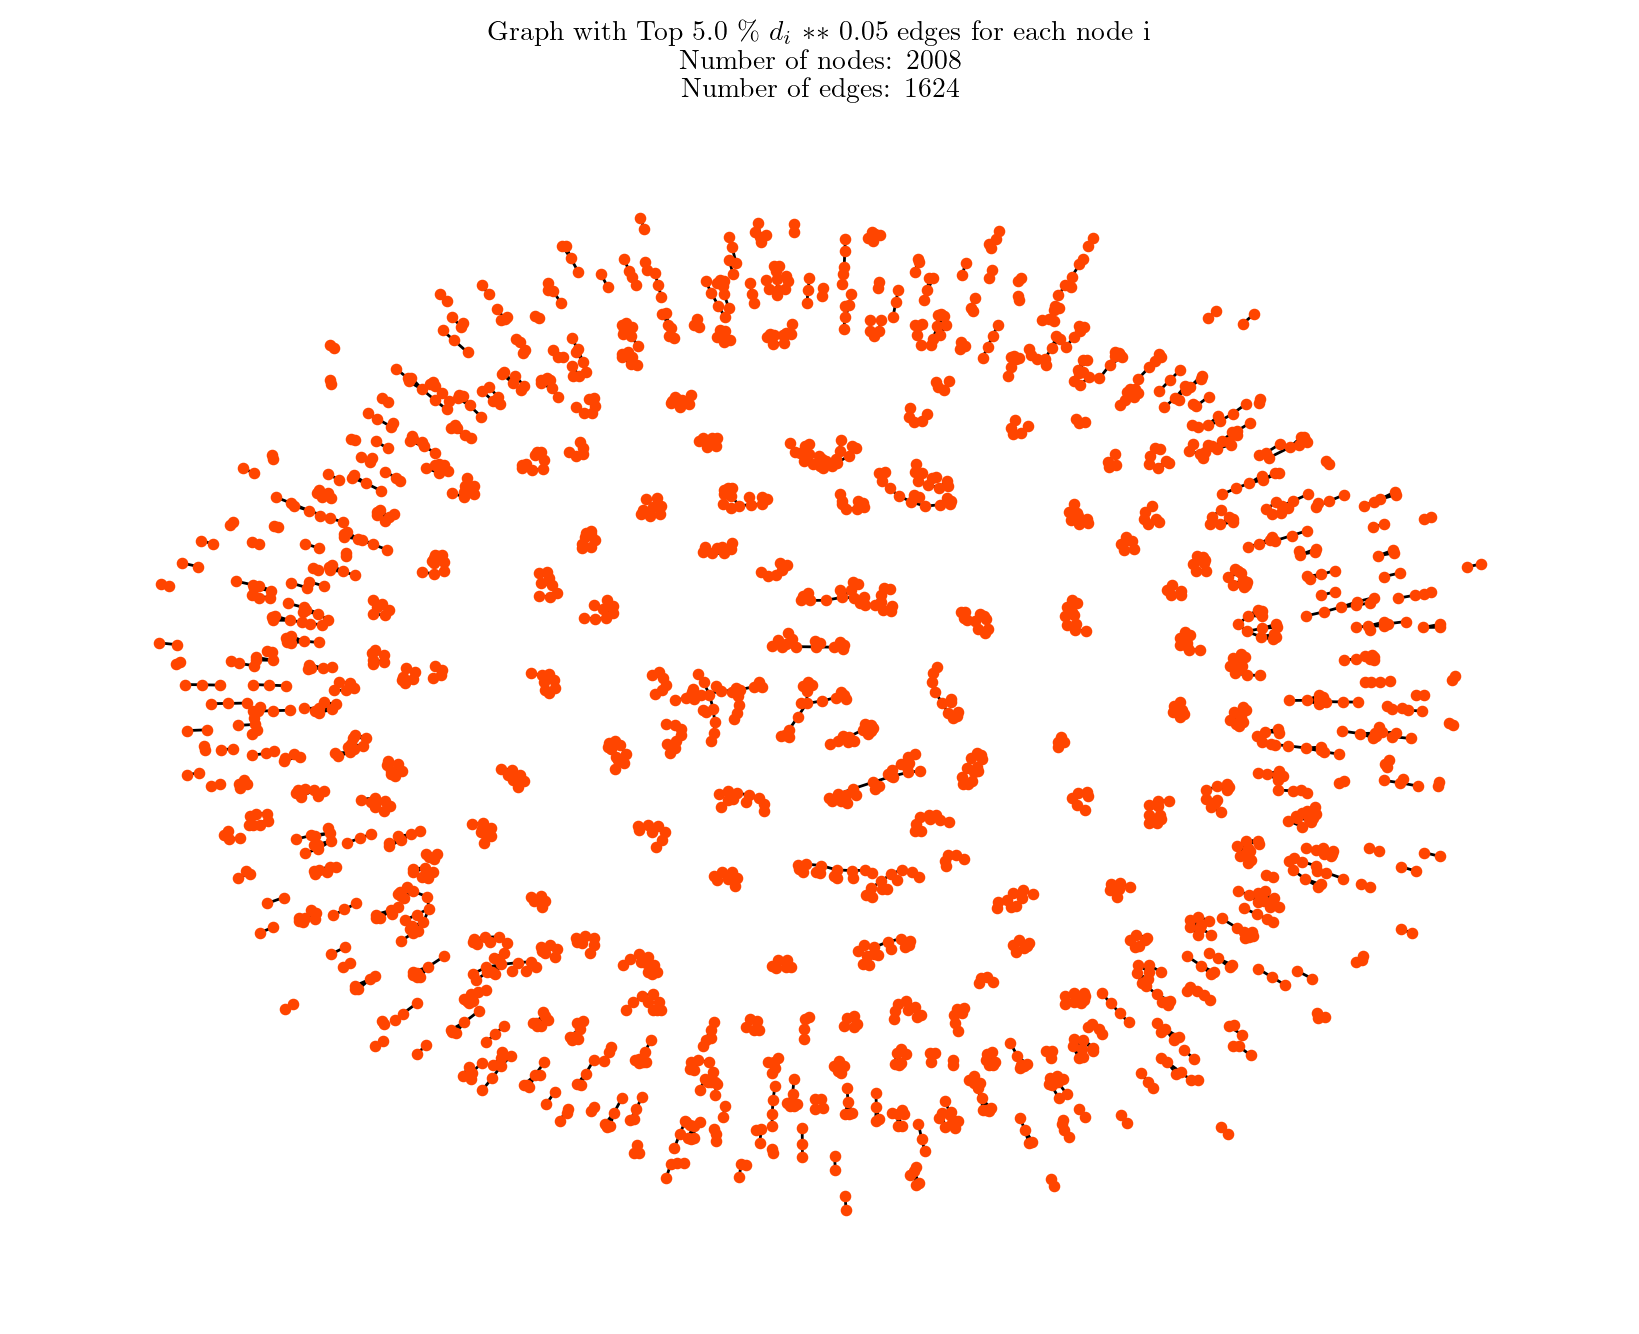

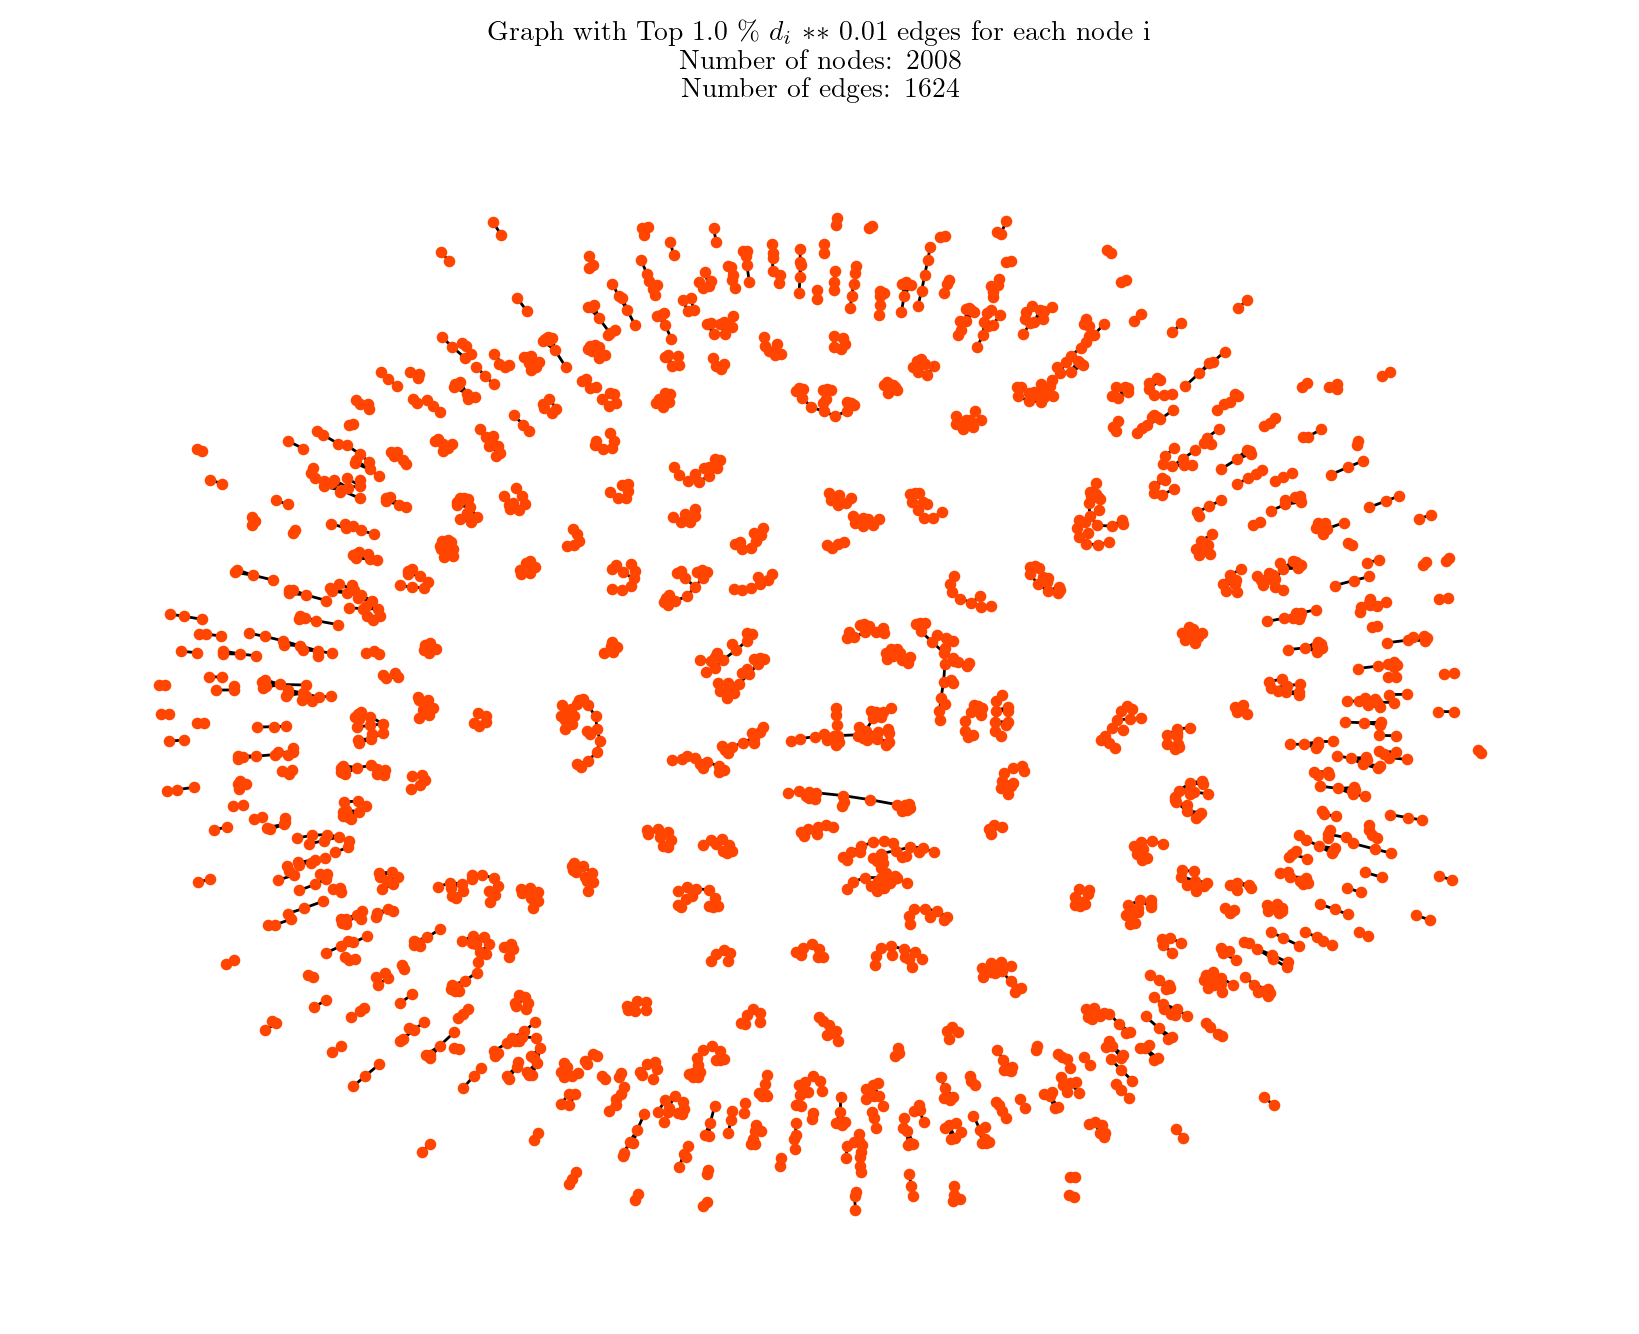

In [21]:
for idx, graph in enumerate(sparseAmzGraphs[2]):
    plt.figure(figsize = (8, 6))
    nx.draw(graph, with_labels = False, node_size = 10, node_color = "mediumpurple", edge_color = "black", pos = nx.spring_layout(graph, scale = 4))
    plt.title(fr"Graph with Top {100 * k_values[idx]} \%  Highest Jaccard Similarity" "\n" f"Number of nodes: {graph.number_of_nodes()}" "\n""Number of edges: " f"{graph.number_of_edges()}")
    plt.show()
    
for idx, graph in enumerate(sparseAmzGraphs[3]):
    plt.figure(figsize = (8, 6))
    nx.draw(graph, with_labels = False, node_size = 10, node_color = "orangered", edge_color = "black", pos = nx.spring_layout(graph, scale = 4))
    st = str(k_values[idx])
    plt.title(fr"Graph with Top {100 * k_values[idx]} \% $d_i$ $**$ {st} edges for each node i" "\n" f"Number of nodes: {graph.number_of_nodes()}" "\n" "Number of edges: " f"{graph.number_of_edges()}")
    plt.show()

# **DBLP**

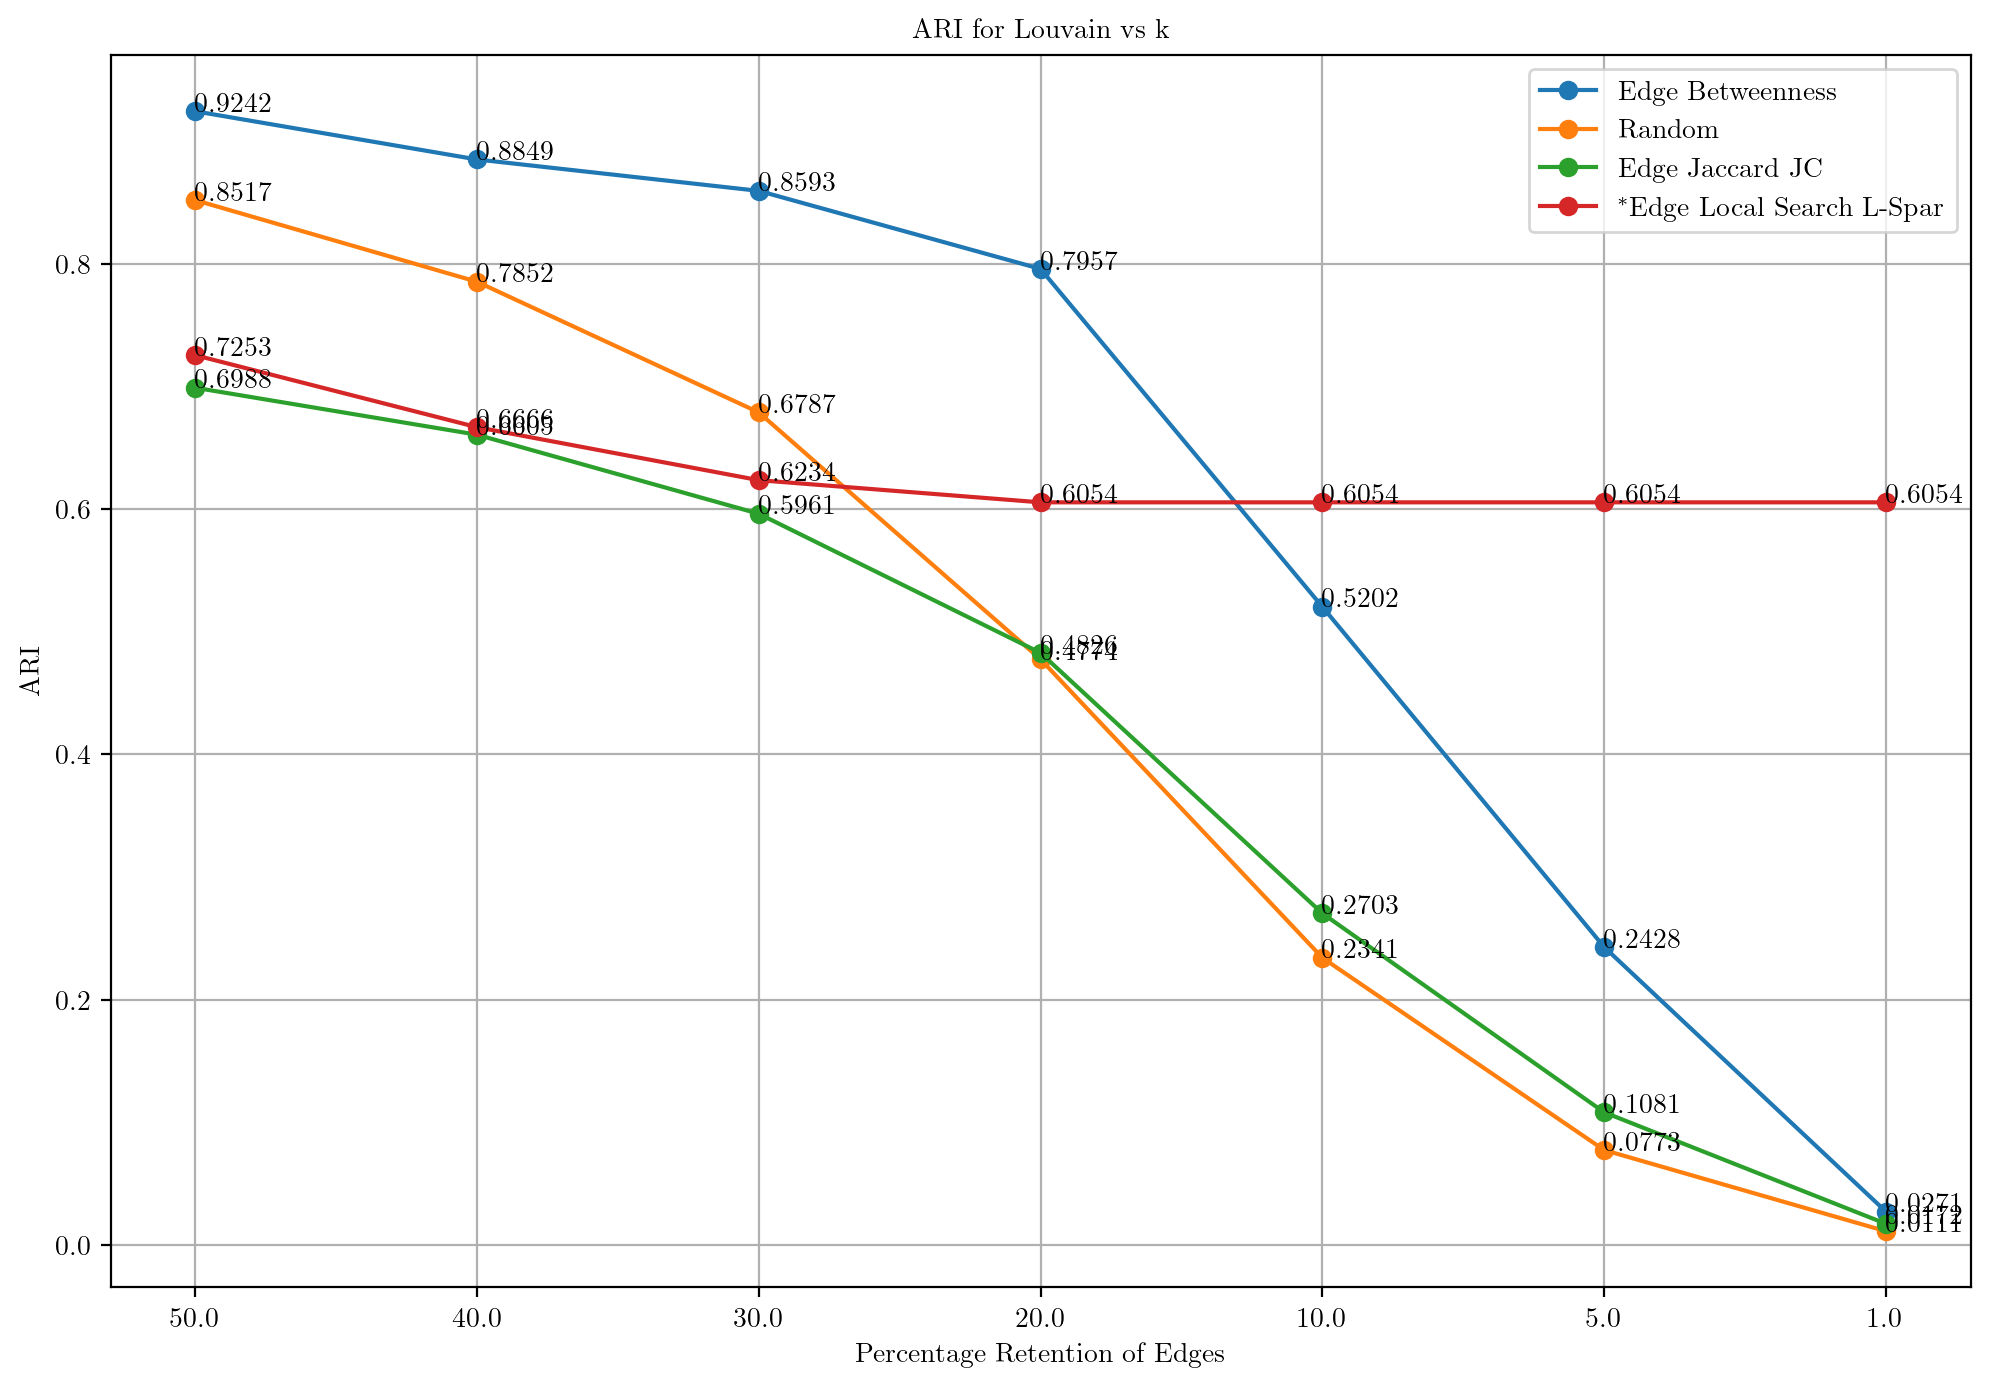

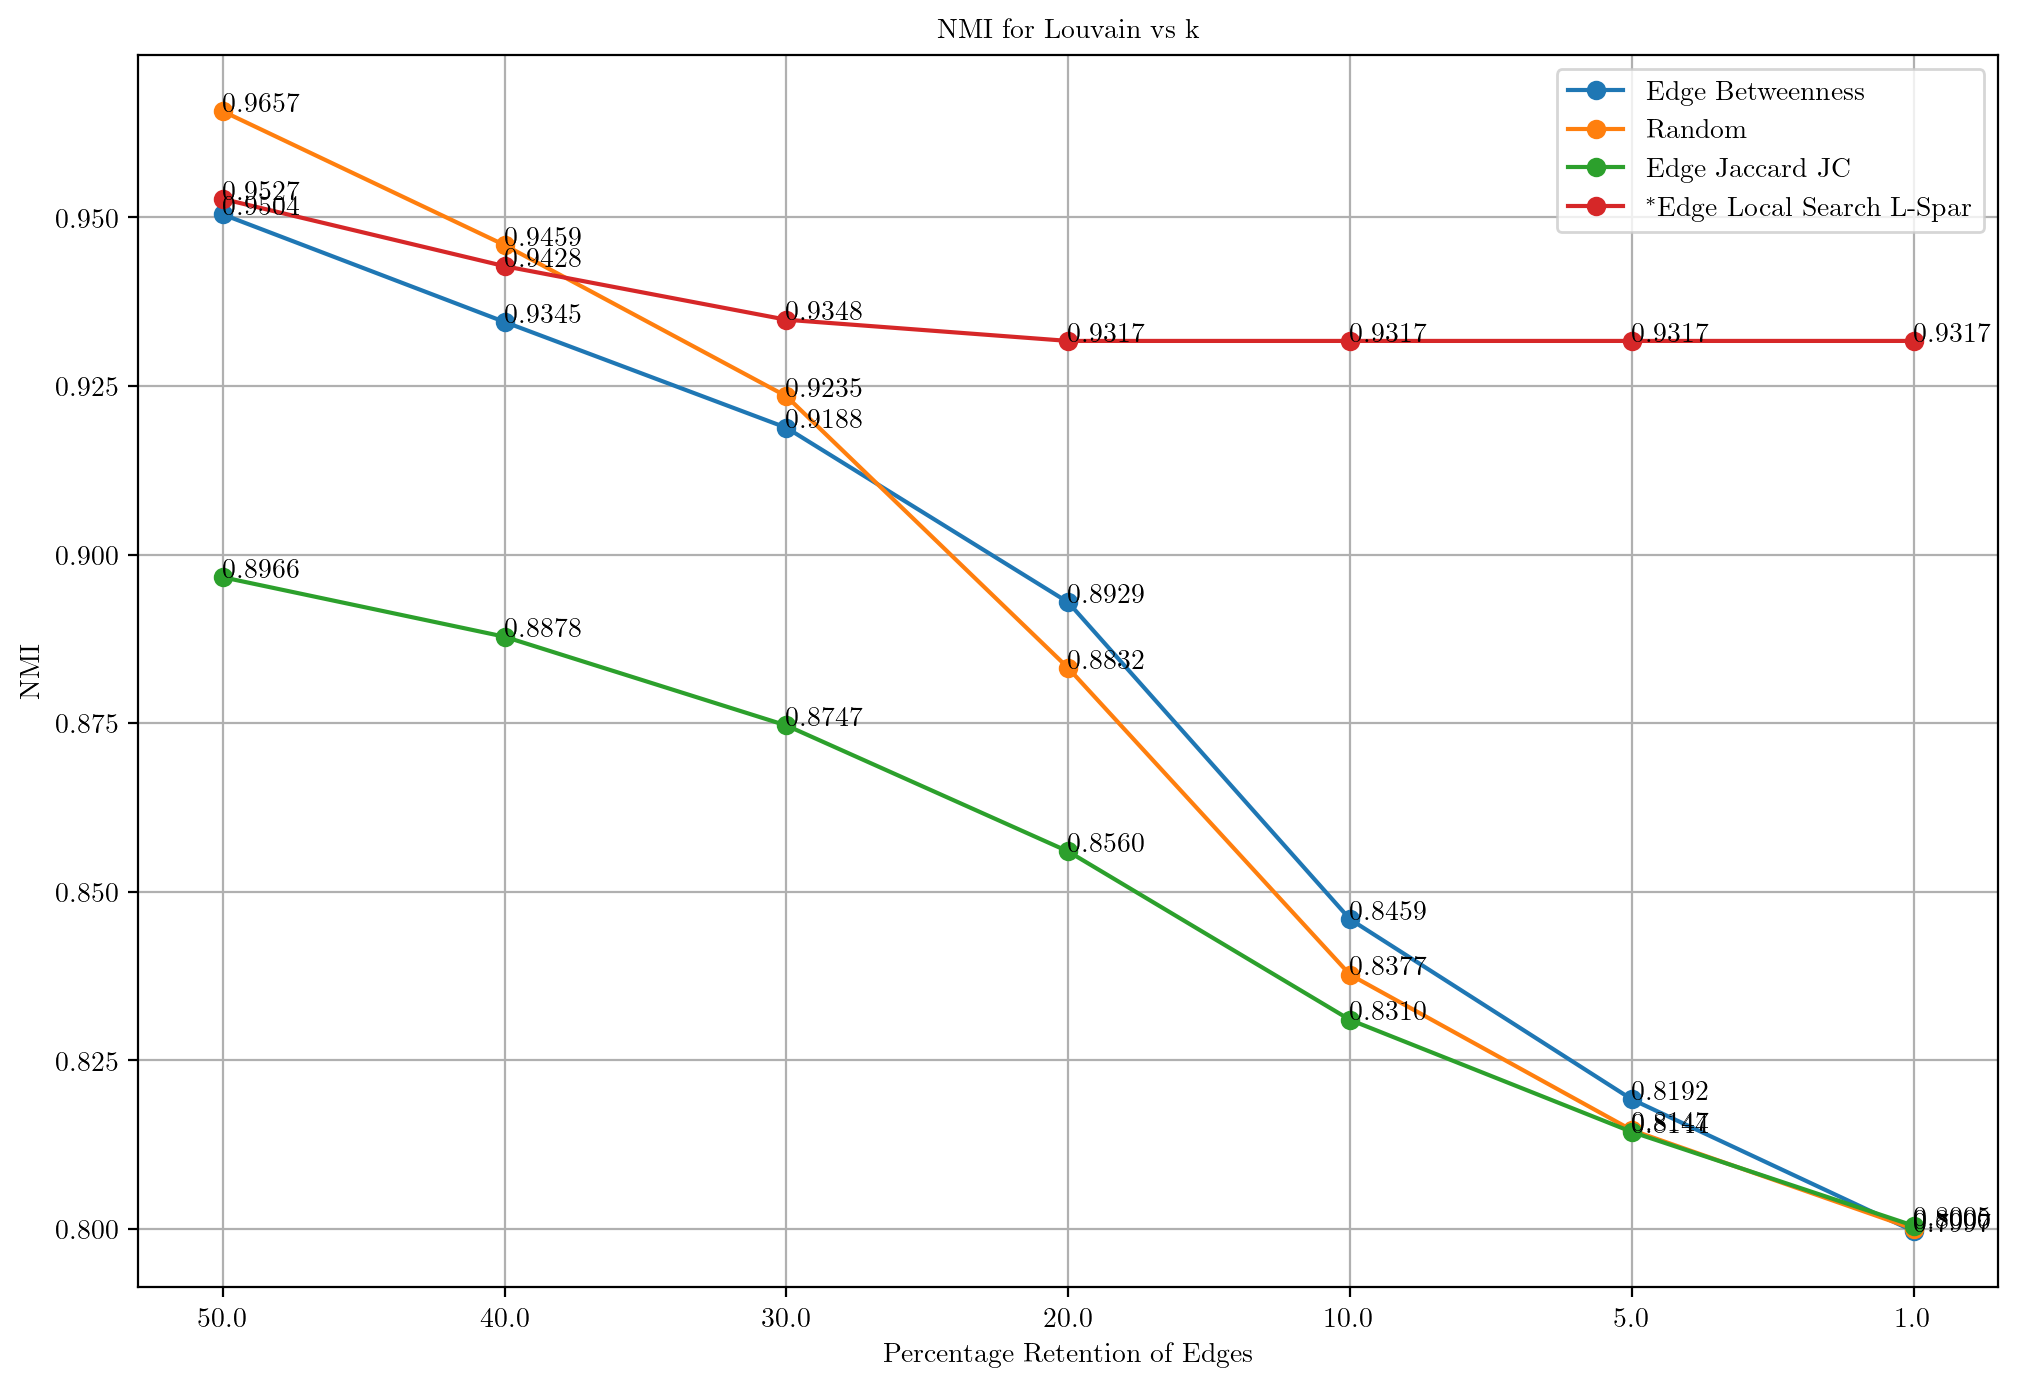

In [6]:
sparseDBLPGraphs = plot_metrics_sparse(G_ind_DBLP, run_louvain(G_ind_DBLP), sparseFunctions, k_values)